### Постановка задачи

Цель работы - протестировать применимость алгоритмов машинного обучения для прогноза добычных характеристик нефтяных скважин месторождения Турия, основываясь на сейсмических данных, данных МЭР, тех. режимов и РИГИС

### Расчет атрибутов

- Выполнен анализ качества корреляции и динамических параметров целевого сейсмокомплекса: корреляция носит субъективный характер так как горизонт характеризуется крайне высокой изменчивостью амплитудно-частотных характеристик, что является следствием активных эрозионных процессов в целевом интервале.
- Сейсмическая корреляция объединена в зонах отсутствия перекрытий между горизонтами.
- Первая итерация расчета атрибутов. Первоначально рассчитано 12 карт атрибутов по 4 кубам: sweetness, envelope, instance frequency и gradient magnitude. По каждому кубу рассчитаны параметры: rms, minimum и maximum. Атрибуты рассчитывались в окне +10 – 60 мс от целевого горизонта. Зоны с некондиционным качеством данных были обрезаны.
- Вторая итерация расчета атрибутов. Рассчитано 158 карт атрибутов. Использовались кубы: envelope, dom frequency, inst frequency, sweetness, inst quality, grad magnitude, chaos, variance, quadrature. По каждому кубу рассчитаны параметры в окне +10 – 60 мс: rms, min, max, median, нарезка через 6 мс (13 слайсов).


### Расчет таргетов

Таргеты расчитывались для каждой скважины. В работе использовались три источника:

- данные МЭР
- данные из тех. режима
- РИГИС

Для первых двух данные выгружались из NGTSmart. 

#### Из МЭРов были расчитаны следующие таргеты:

- `qoil_3 _6 _12` - средний дебит нефти скважины за первые 3, 6 и 12 месяцев
- `qliq_3 _6 _12` - средний дебит жидкости скважины за первые 3, 6 и 12 месяцев
- `Qoil_3 _6 _12` - накопленная добыча нефти за первые 3, 6 и 12 месяцев
- `Qliq_3 _6 _12` - накопленная добыча жидкости за первые 3, 6 и 12 месяцев

#### Из тех.режима были расчитаны следующие таргеты:

- средние дебита
- средний `Kh` за 3, 6, 12 месяцев
- средний `Kh` за все время и медиану за все время
- средний `коэф-т продуктивности` за 3, 6, 12 месяцев

### Расчет ФЕС из РИГИС 

Полученные данные РИГИС

- `Brittleness` - хрупкость
- `H_TVD_Capacity` – мощность коллектора в интервале
- `H_TVD_Fractures` - – мощность трещиноватого коллектора в интервале
- `Net_Capacity` – кривая коллектор/не коллектор
- `Net_Fractures` – кривая трещиноватый коллектор/не коллектор
- `PERM_Eff` – эффективная проницаемость 
- `PHIT` -  пористость
- `Rock_Type` – кривая типов пород


#### Важные особенности:

- Скважины вскрыли целевой интервал на разную глубину
- В части скважин, в палеозое частично или полностью отсутствует ГИС/РИГИС
- Мощность вскрытой толщи палеозоя в ряде скважин меньше разрешающей способности СРР

#### Метод расчета параметров:

- Средняя скорость в интервале палеозоя, согласно привязке 4300-5000 мс. Большинство скважин, вскрывших палеозой, охватили мощность в 150-200 метров. Сейсмический период в палеозое составляет от 40-60 мс.
- Сейсмические атрибуты рассчитаны в окне +10 – 60 мс
- ФЕС в интервале Pz+150 м
- Все скважины были в ручную профильтрованы на предмет наличия РИГИС в интервале Pz+150 м


#### Были рассчитаны следующие параметры: 
- Средняя пористость
- Средняя арифметическая проницаемость
- Средняя геометрическая проницаемость
- Мощность коллектора
- Мощность трещиноватого коллектора
- Мощность коллектора + мощность трещиноватого коллектора


### Подбор гиперпараметров и обучение моделей

На данном этапе мы остановились на трех моделях:

- [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)
- [CatBoost](https://catboost.ai/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html)

Данные библиотеки основаны на градиентном бустинге и хорошо показали себя при решении задач на [kaggle](https://www.kaggle.com/)

Для подбора гиперпараметров будем использовать библиотеку [hyperopt](https://pypi.org/project/hyperopt/#files), а именно метод байесовской оптимизации [Tree of Parzen Estimators](https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf).

Для кросс-валидации использовалась стандартная библиотека `sklearn` и [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

## Оглавление <a name="content"></a>

1. [Работа с атрибутами и определение фичей](#step_1)  
1.1. [Чтение атрибутов в формате grid и преобразование их в dataframe](#step_1.1)  
1.2. [Предобработка данных](#step_1.2)  
1.3. [Генерация признаков](#step_1.3)
2. [Определение предиктов](#step_2)  
2.1. [Данные из МЭРов](#step_2.1)  
2.2. [Данные из тех. режима](#step_2.2)  
2.3. [Данные из РИГИС](#step_2.3)  
3. [Подбор гиперпараметров и обучение моделей](#step_3)  
4. [Кросс-валидация](#step_4)
5. [Вероятностные карты](#step_5)
6. [Общий вывод](#step_6)
7. [Чек-лист](#step_chek)

In [5]:
# Установка библиотек
#!pip install lightgbm
#!pip install xgboost
#!pip install catboost
#!pip install hyperopt
#!pip install zmapio

In [3]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time
from zmapio import ZMAPGrid
import os
import itertools
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

from hyperopt import hp

import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

import seaborn as sns
import matplotlib
import imageio
import random

## 1. Работа с атрибутами и определение фичей <a name="step_1"></a>

### 1.1 Чтение атрибутов в формате grid и преобразование их в dataframe <a name="step_1.1"></a>

Атрибуты были переданы нам в формате `grid`. Перевести их в привычный для нас `dataframe` поможет библиотека [zmapio](https://pypi.org/project/zmapio/). Для начала определим директорию `grids_path` со всеми гридами

In [10]:
grids_path = f'{os.getcwd()}\grids'

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Михаил\AppData\Local\Temp\ipykernel_3556\1144108648.py:1: SyntaxWarning: invalid escape sequence '\g'
  grids_path = f'{os.getcwd()}\grids'


Чтобы не прописывать вручную импорт (гридов может быть много), немного автоматизируем процесс

In [4]:
filename_list = [os.fsdecode(file) for file in os.listdir(os.fsencode(grids_path)) if os.fsdecode(file).endswith('')]
dataframe_name_list = ['{}'.format(filename.lower().replace(' ', '_')) for filename in filename_list]
downloand_list = ["df_{} = ZMAPGrid(os.path.join(grids_path, '{}')).to_pandas()".format(x, y) 
                  for x,y in zip(dataframe_name_list, filename_list)]
for i in downloand_list:
    print(i)

df_envelope_max = ZMAPGrid(os.path.join(grids_path, 'Envelope Max')).to_pandas()
df_envelope_min = ZMAPGrid(os.path.join(grids_path, 'Envelope Min')).to_pandas()
df_envelope_rms = ZMAPGrid(os.path.join(grids_path, 'Envelope RMS')).to_pandas()
df_grad_mag_max = ZMAPGrid(os.path.join(grids_path, 'Grad Mag Max')).to_pandas()
df_grad_mag_min = ZMAPGrid(os.path.join(grids_path, 'Grad Mag Min')).to_pandas()
df_grad_mag_rms = ZMAPGrid(os.path.join(grids_path, 'Grad Mag RMS')).to_pandas()
df_inst_freq_max = ZMAPGrid(os.path.join(grids_path, 'Inst Freq Max')).to_pandas()
df_inst_freq_min = ZMAPGrid(os.path.join(grids_path, 'Inst Freq Min')).to_pandas()
df_inst_freq_rms = ZMAPGrid(os.path.join(grids_path, 'Inst Freq RMS')).to_pandas()
df_sweetness_max = ZMAPGrid(os.path.join(grids_path, 'Sweetness Max')).to_pandas()
df_sweetness_min = ZMAPGrid(os.path.join(grids_path, 'Sweetness Min')).to_pandas()
df_sweetness_rms = ZMAPGrid(os.path.join(grids_path, 'Sweetness RMS')).to_pandas()


Скопируем получившийся принт для импорта гридов

In [5]:
df_envelope_max = ZMAPGrid(os.path.join(grids_path, 'Envelope Max')).to_pandas()
df_envelope_min = ZMAPGrid(os.path.join(grids_path, 'Envelope Min')).to_pandas()
df_envelope_rms = ZMAPGrid(os.path.join(grids_path, 'Envelope RMS')).to_pandas()
df_grad_mag_max = ZMAPGrid(os.path.join(grids_path, 'Grad Mag Max')).to_pandas()
df_grad_mag_min = ZMAPGrid(os.path.join(grids_path, 'Grad Mag Min')).to_pandas()
df_grad_mag_rms = ZMAPGrid(os.path.join(grids_path, 'Grad Mag RMS')).to_pandas()
df_inst_freq_max = ZMAPGrid(os.path.join(grids_path, 'Inst Freq Max')).to_pandas()
df_inst_freq_min = ZMAPGrid(os.path.join(grids_path, 'Inst Freq Min')).to_pandas()
df_inst_freq_rms = ZMAPGrid(os.path.join(grids_path, 'Inst Freq RMS')).to_pandas()
df_sweetness_max = ZMAPGrid(os.path.join(grids_path, 'Sweetness Max')).to_pandas()
df_sweetness_min = ZMAPGrid(os.path.join(grids_path, 'Sweetness Min')).to_pandas()
df_sweetness_rms = ZMAPGrid(os.path.join(grids_path, 'Sweetness RMS')).to_pandas()

Создадим новый датафрейм, в котором будут находиться все атрибуты. В случае большого кол-ва гридов целесообразно будет объединить получившиеся датафреймы, например методом [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [6]:
dataframe = pd.DataFrame({
    'x': df_envelope_max['X'],
    'y': df_envelope_max['Y'],
    'envelope_max': df_envelope_max['Z'],
    'envelope_min': df_envelope_min['Z'],
    'envelope_rms': df_envelope_rms['Z'],
    'grad_mag_max': df_grad_mag_max['Z'],
    'grad_mag_min': df_grad_mag_min['Z'],
    'grad_mag_rms': df_grad_mag_rms['Z'],
    'inst_freq_max': df_inst_freq_max['Z'],
    'inst_freq_min': df_inst_freq_min['Z'],
    'inst_freq_rms': df_inst_freq_rms['Z'],
    'sweetness_max': df_sweetness_max['Z'],
    'sweetness_min': df_sweetness_min['Z'],
    'sweetness_rms': df_sweetness_rms['Z']
})

Выведем некоторую информацию по датафрейму

In [7]:
dataframe.sample(5)

,x,y,envelope_max,envelope_min,envelope_rms,grad_mag_max,grad_mag_min,grad_mag_rms,inst_freq_max,inst_freq_min,inst_freq_rms,sweetness_max,sweetness_min,sweetness_rms
148503,7409676.413,5.046707e+06,62.5158,27.8059,47.3234,28.4512,2.8216,13.3778,24.7756,5.5760,14.3157,19.2013,9.1151,13.9943
96742,7403426.413,5.053507e+06,111.7460,33.5332,67.9589,38.6311,1.3233,16.1443,25.9554,2.6520,15.9634,22.6020,12.1769,17.3264
114287,7405526.413,5.043557e+06,93.1254,43.4097,70.2334,40.1947,6.9519,21.0616,39.1476,6.8972,18.3534,20.6046,9.7605,17.1731
32117,7395576.413,5.042707e+06,79.9467,30.0492,53.5334,31.7336,3.7971,17.2283,28.3099,13.3403,20.1544,16.3632,8.0626,12.0496
139315,7408576.413,5.051807e+06,42.7045,5.8111,21.9871,17.5246,1.4771,10.4051,40.2057,-1.0586,28.6794,7.7782,1.6497,4.4434


In [8]:
dataframe.describe()

,x,y,envelope_max,envelope_min,envelope_rms,grad_mag_max,grad_mag_min,grad_mag_rms,inst_freq_max,inst_freq_min,inst_freq_rms,sweetness_max,sweetness_min,sweetness_rms
count,2.242590e+05,2.242590e+05,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000
mean,7.405276e+06,5.048207e+06,90.250164,27.844348,62.878832,40.415472,3.260605,20.547610,31.667357,5.114558,19.520778,23.283924,7.784952,15.693827
std,7.837534e+03,5.961137e+03,35.460967,19.313027,24.045325,20.510535,2.232924,9.060192,13.043873,4.810955,5.837420,8.827579,5.314849,5.685294
min,7.391726e+06,5.037907e+06,6.021300,-0.532400,3.080200,3.778600,-1.105800,2.130700,11.440700,-7.344500,7.809600,1.113400,-0.404700,0.586400
25%,7.398476e+06,5.043057e+06,66.375975,11.205675,45.658400,27.526350,1.766300,14.596050,22.427975,0.145025,15.436700,17.412400,3.075800,11.598100
50%,7.405276e+06,5.048207e+06,85.402750,25.405750,60.755500,36.031500,2.755950,18.915350,27.134400,4.887100,18.019350,22.375550,7.473050,15.513000
75%,7.412076e+06,5.053357e+06,106.742825,40.217425,77.488025,47.479925,4.170000,24.437375,36.787675,8.613150,22.275500,27.779400,11.604550,19.478925
max,7.418826e+06,5.058507e+06,266.918300,117.698600,206.827700,268.247600,27.416200,101.579900,102.755600,47.403900,60.553400,99.328400,29.834500,45.426700


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224259 entries, 0 to 224258
Data columns (total 14 columns):
x                224259 non-null float64
y                224259 non-null float64
envelope_max     144072 non-null float64
envelope_min     144072 non-null float64
envelope_rms     144072 non-null float64
grad_mag_max     144072 non-null float64
grad_mag_min     144072 non-null float64
grad_mag_rms     144072 non-null float64
inst_freq_max    144072 non-null float64
inst_freq_min    144072 non-null float64
inst_freq_rms    144072 non-null float64
sweetness_max    144072 non-null float64
sweetness_min    144072 non-null float64
sweetness_rms    144072 non-null float64
dtypes: float64(14)
memory usage: 24.0 MB


В датафрейме имеются пропуски. Т.к данные из одного источника, они явно находятся в одних и тех же строках. Удалим их

In [10]:
dataframe = dataframe.dropna().reset_index(drop = True)

Сохраним получившийся результат в папку `datasets`

In [11]:
try:
    os.mkdir("datasets")
except:
    print('Папка datasets уже существует')

# dataframe.to_excel(os.path.join(f'{os.getcwd()}/datasets', 'grids_dataframe.xlsx'), index = False)

Папка datasets уже существует


### 1.2 Предобработка данных <a name="step_1.2"></a>

Построим гистограммы распределения и графики boxplot для каждого из атрибутов. Для этого создадим функцию

In [12]:
def fig_hist_boxplot(dataframe, column_name):
    red_square = dict(markerfacecolor='r', marker='s')
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 10))
    fig.suptitle(column_name, fontsize=16)

    ax1.hist(dataframe[column_name], bins = 50)
    ax1.set_title('Гистограмма распределения')

    ax2.boxplot(dataframe[column_name], vert=False, flierprops=red_square)
    ax2.set_title('Boxplot');

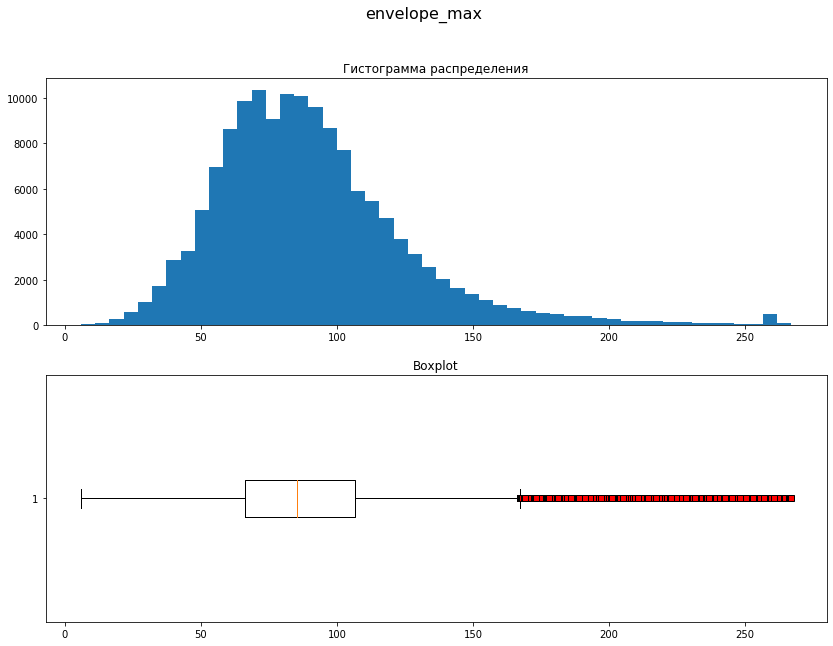

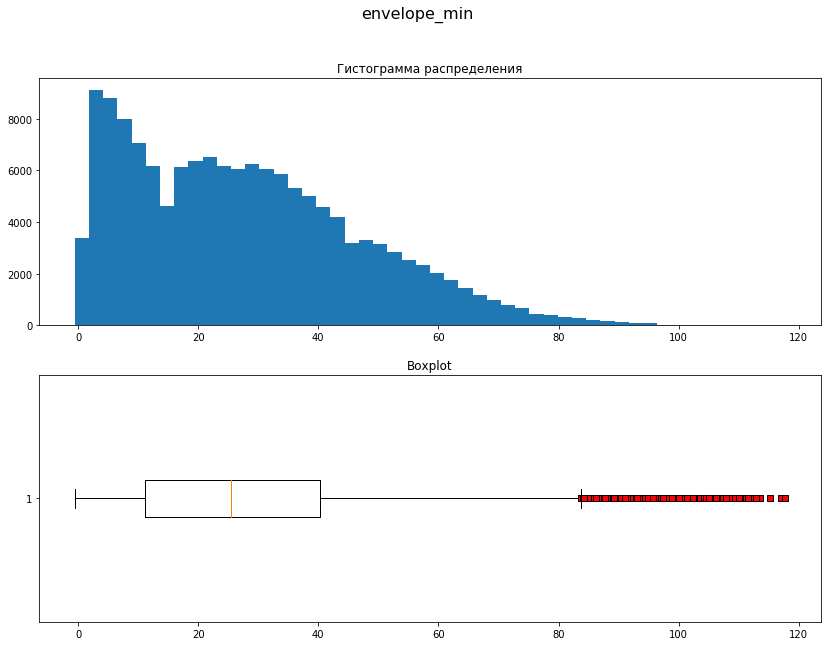

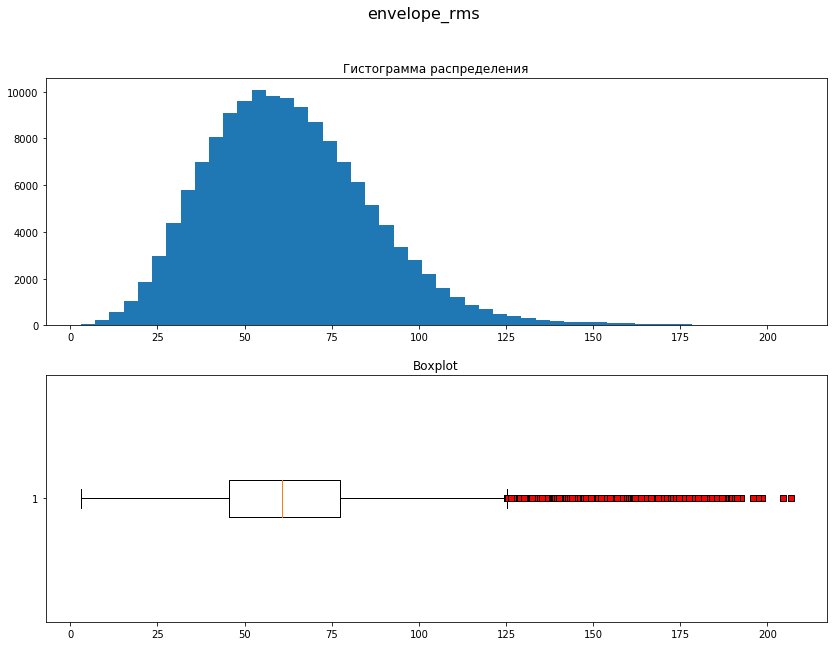

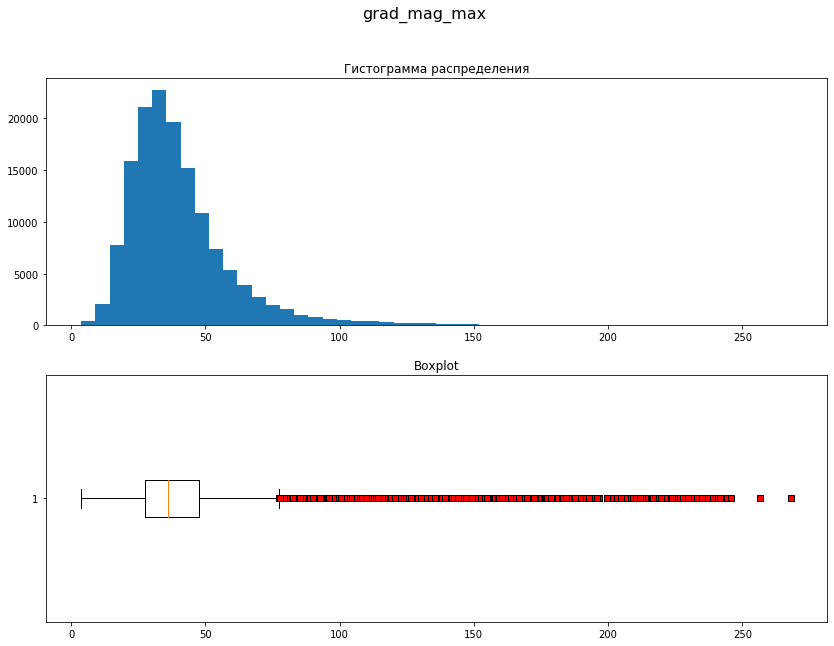

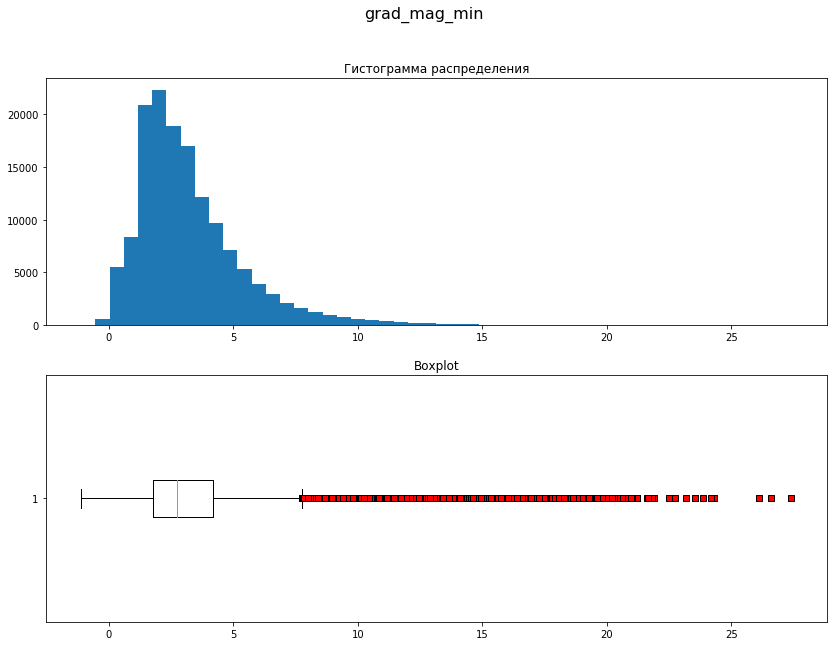

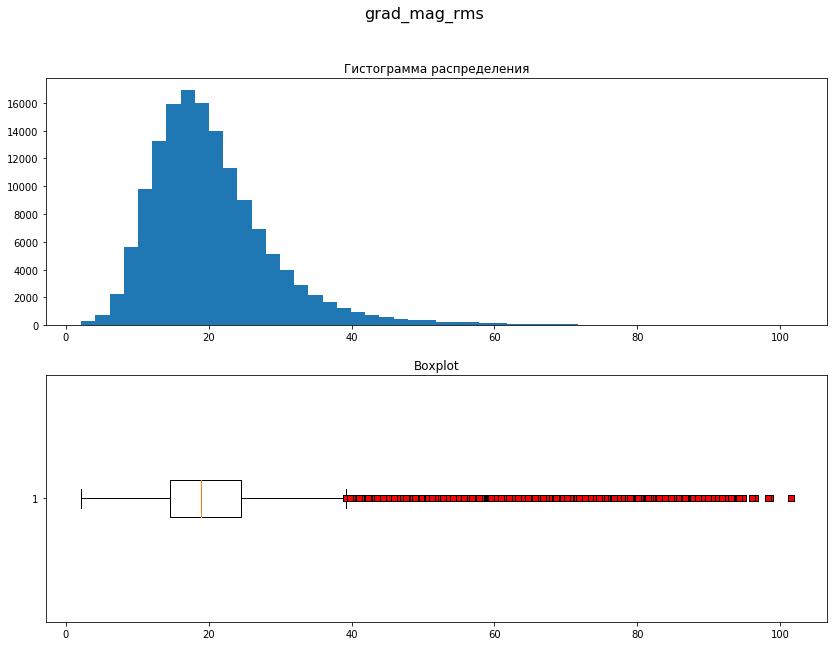

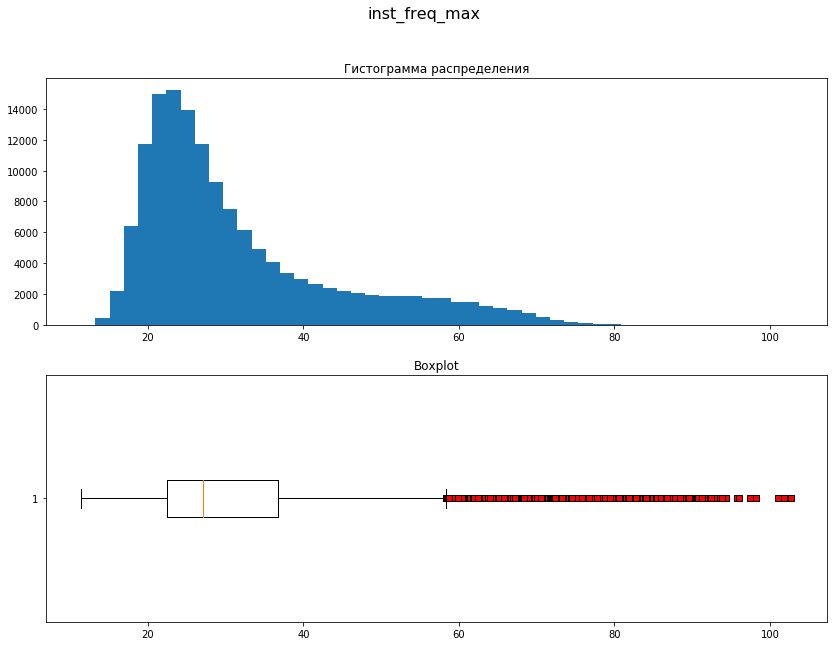

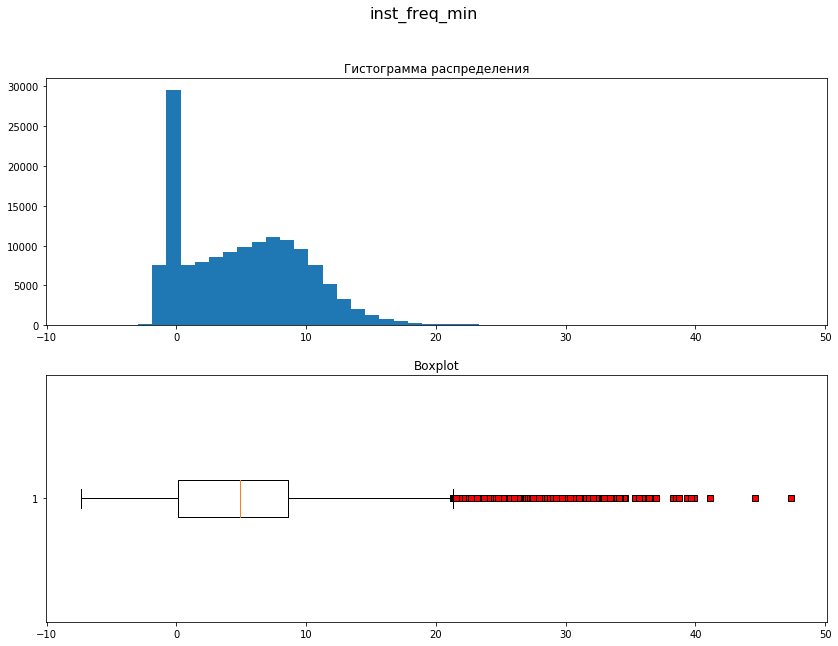

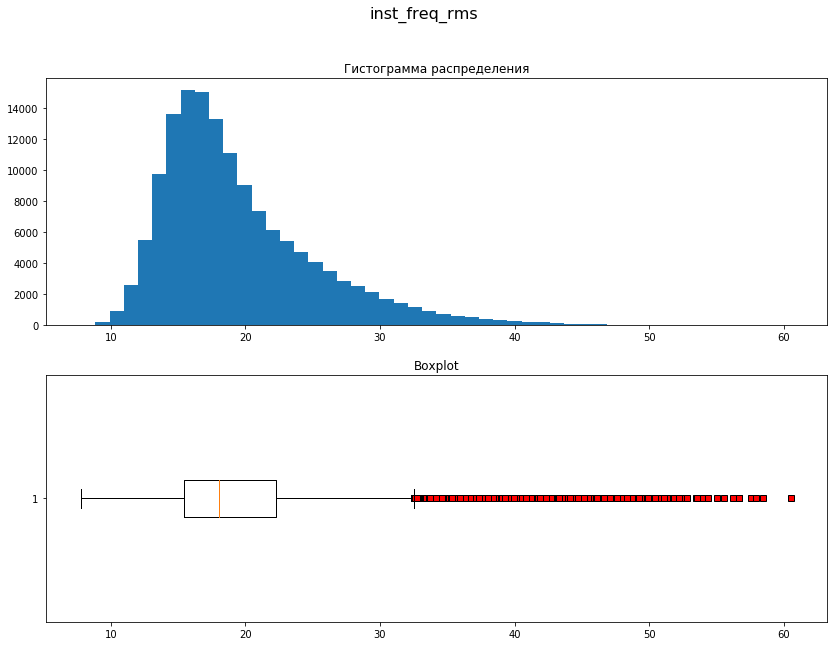

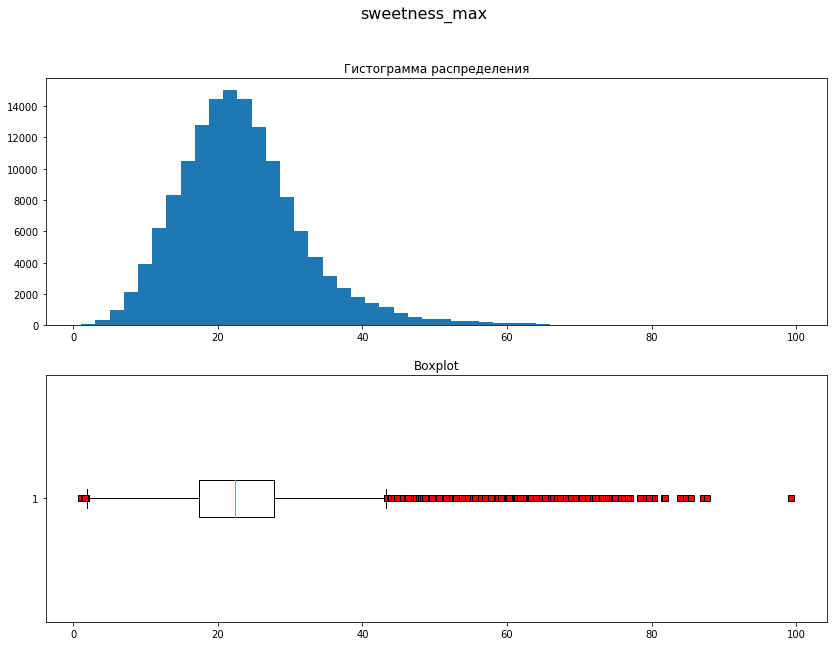

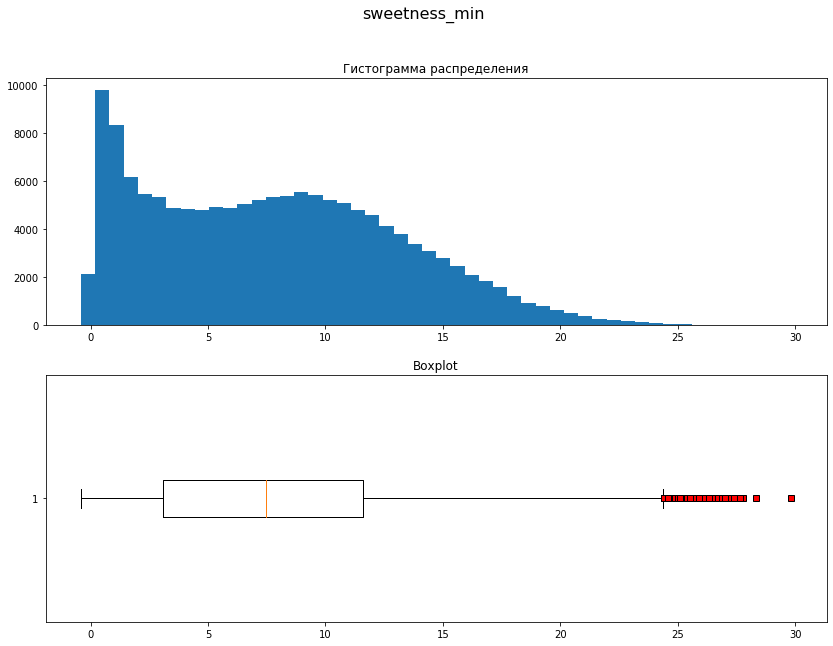

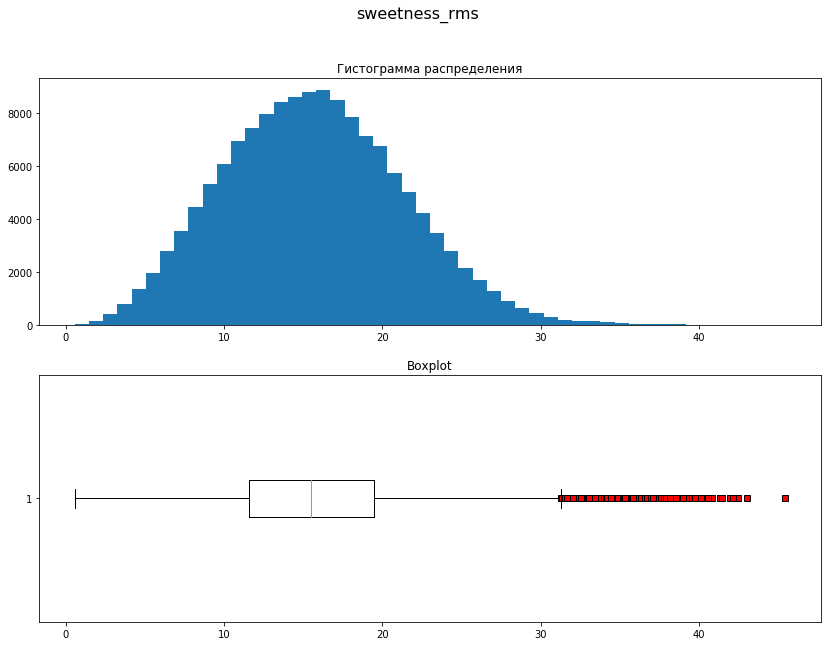

In [13]:
for column_name in dataframe.columns[2:]:
    fig_hist_boxplot(dataframe, column_name)

На атрибуте мгновенной частоты `inst_frq_min` наблюдается дополнительный пик связанный с нулевыми значениями частоты.

Данный эффект часто встречается на данном атрибуте и связан с алгоритмом расчета и высокой дискретностью данного атрибута.

Дополнительный пик на атрибуте `sweetnes`s так же связан с около нулевыми частотами, так как является математически вычисленным из амплитуд и частот.

Можем заметить на всех графиках хвосты, от которых следует избавиться. Напишем функцию, которая будет вычислять значения усов графика `boxplot`. Если значение не будет входить в данный диапазон, будем заменять на `np.nan`

In [14]:
def calc_caps(some_series, count):
    
    v = some_series.quantile(q=.75) + count * (some_series.quantile(q=.75) - some_series.quantile(q=.25))
    n = some_series.quantile(q=.25) - count * (some_series.quantile(q=.75) - some_series.quantile(q=.25))
    if np.max(some_series) < v: v = np.max(some_series)
    if np.min(some_series) > n: n = np.min(some_series)
        
    return n, v

Посмотрим, насколько сократится выборка по каждому столбцу после фильтрации

In [15]:
for column_name in dataframe.columns[2:]:

    print(column_name)
    caps = calc_caps(dataframe[column_name], 1.5)
    print(len([x for x in dataframe[column_name] if (x > caps[0] and x < caps[1])]))
    print(len(dataframe[column_name]))

    print((len(dataframe[column_name]) - len([x for x in dataframe[column_name] if (x > caps[0] and x < caps[1])])) / 
           len(dataframe[column_name]) * 100)
    print('---')

envelope_max
139160
144072
3.4094064079071575
---
envelope_min
143191
144072
0.6114998056527291
---
envelope_rms
142007
144072
1.4333111222166695
---
grad_mag_max
136823
144072
5.031512021766894
---
grad_mag_min
137632
144072
4.469987228607918
---
grad_mag_rms
138538
144072
3.8411349880615244
---
inst_freq_max
134914
144072
6.356543950247098
---
inst_freq_min
143518
144072
0.38452995724360045
---
inst_freq_rms
138657
144072
3.7585373979676833
---
sweetness_max
140058
144072
2.7861069465267363
---
sweetness_min
143926
144072
0.1013382197789994
---
sweetness_rms
143176
144072
0.6219112665889277
---


Сокращение не превышает 7%, что простительно. При дальнейшей проработке можно увеличить диапазон межквартильного размаха, например до 2. Осуществим замену, для этого также создадим отдельную функцию

In [16]:
def replace_for_nan(dataframe, column_name):
    caps = calc_caps(dataframe[column_name], 1.5)
    a = np.where(dataframe[column_name] > caps[0], dataframe[column_name], np.nan)
    a = np.where(a < caps[1], a, np.nan)
    return a

In [17]:
for column_name in dataframe.columns[2:]:
    dataframe[column_name] = replace_for_nan(dataframe, column_name)

### 1.3 Генерация признаков <a name="step_1.3"></a>

У нас есть список скважин с координатами пересечения кровли палеозойского пласта. Загрузим его

In [18]:
well_coord = pd.read_excel(f'{os.getcwd()}/datasets/Координаты палеозой.xlsx')

display(well_coord.sample(5), well_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
Well identifier    157 non-null object
Surface            157 non-null object
X                  157 non-null float64
Y                  157 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


,Well identifier,Surface,X,Y
16,Kl-002,Pz,7392120.00,5054250.00
153,Tus-125,Pz,7408722.17,5045068.80
66,Tus-020,Pz,7408398.09,5045218.31
89,Tus-042,Pz,7410599.54,5044894.78
117,Tus-071,Pz,7410280.35,5044440.16


None

Теперь нам нужно связать координаты скважин и датафрейм с атрибутами `dataframe`. Создадим функцию, которая будет считать расстояния между точками скважин и точками атрибутов. В функцию также включим определение новых признаков. На рисунке я попытался изобразить логику расчета параметров

<img src="IMG_20201020_2250051.jpg">

In [19]:
def calc_atr_xy_distance(some_x, some_y, dataframe, radius):
    
    # отсекаем квадрат, чтобы не перебирать весь куб
    dataframe = dataframe.query(f'(x > {some_x} - 500) & (x < {some_x} + 500) & \
                                 (y > {some_y} - 500) & (y < {some_y} + 500)').reset_index(drop = True)
    
    # считаем для каждой точки расстояние до (some_x, some_y)
    dist = [math.sqrt((some_x - dataframe.loc[i, 'x']) ** 2 + 
                      (some_y - dataframe.loc[i, 'y']) ** 2) for i in range(dataframe.shape[0])]
    
    # средние параметры атрибутов по 3-м ближ-м точкам
    some_list = dataframe.loc[[dist.index(x) for x in sorted(dist)[:3]]][dataframe_name_list].mean().round(3).tolist()
    
    # индексы dataframe с точками внутри окружности с радиусом radius
    ind = [i for i in range(len(dist)) if dist[i] <= radius]
    
    # статистика по точкам внутри окружности с радиусом radius
    describe_df = dataframe.loc[ind][dataframe_name_list].describe().round(3)
    
    for column in describe_df.columns:
        some_list.extend(describe_df[column].tolist()[1:])
    
    return some_list

По NGTSmart для первой итерации был посчитан средний радиус дренирования, равный 150. Выполним расчет параметров

In [20]:
all_data_list = [calc_atr_xy_distance(x, y, dataframe, 150) for x, y in zip (well_coord['X'], well_coord['Y'])]

Для нового датафрейма нам нужны названия фичей, сгенерируем их

In [21]:
index_ = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
new_col_name = []
for col in dataframe_name_list:
    for ind in index_:
        new_col_name.append('{}_{}'.format(col, ind))
        
new_col_name = [*dataframe_name_list, *new_col_name]

Переведем параметры в датафрейм

In [22]:
dataframe_2 = pd.DataFrame(all_data_list, columns = new_col_name)
dataframe_2.insert(0, 'well', well_coord['Well identifier'])
dataframe_2.sample(15)

,well,envelope_max,envelope_min,envelope_rms,grad_mag_max,grad_mag_min,grad_mag_rms,inst_freq_max,inst_freq_min,inst_freq_rms,...,sweetness_min_50%,sweetness_min_75%,sweetness_min_max,sweetness_rms_mean,sweetness_rms_std,sweetness_rms_min,sweetness_rms_25%,sweetness_rms_50%,sweetness_rms_75%,sweetness_rms_max
154,Tus-137,90.497,17.282,65.146,35.916,3.116,18.186,31.465,3.564,21.510,...,7.176,9.767,12.440,12.235,4.165,3.062,9.584,11.612,15.759,18.294
97,Tus-049_1,99.053,50.948,76.916,30.687,3.029,13.364,21.823,6.726,13.609,...,13.993,15.149,16.830,20.819,2.126,16.083,19.412,21.224,22.032,24.978
102,Tus-053_1,116.521,24.288,74.035,50.346,6.700,28.908,48.803,3.711,28.491,...,3.535,8.502,20.699,17.401,4.408,8.994,14.499,17.034,19.192,27.694
100,Tus-052,124.273,54.020,81.125,44.815,1.841,19.933,23.481,8.988,15.148,...,14.730,15.694,17.970,20.366,1.696,17.045,19.200,20.018,21.534,23.904
67,Tus-021,92.180,4.616,56.264,36.303,3.791,18.345,50.117,10.888,29.551,...,1.360,4.202,7.717,12.072,3.280,6.790,9.511,11.795,14.424,18.001
105,Tus-056,82.586,20.574,53.983,31.096,2.501,14.732,40.073,6.644,22.198,...,3.026,5.848,11.826,15.197,3.286,11.218,12.412,14.352,17.545,22.362
43,Tus-002X/1,109.798,18.775,76.593,55.737,4.015,28.846,33.340,7.090,20.120,...,6.719,10.676,15.478,17.939,2.624,13.075,16.279,18.098,19.496,22.602
74,Tus-028,71.383,11.777,51.819,39.008,2.752,20.594,32.532,3.672,19.508,...,2.911,4.860,8.324,11.475,2.531,4.838,10.368,11.862,12.796,16.213
3,20,112.617,36.458,92.196,32.598,4.482,18.287,20.251,5.905,15.540,...,12.411,14.636,17.502,20.842,3.291,14.326,18.815,22.374,23.040,25.336
70,Tus-024,109.443,27.779,76.310,38.409,4.828,19.197,24.901,5.342,17.624,...,6.473,9.937,12.667,17.073,5.392,7.086,12.858,17.592,22.041,25.141


После первого этапа получили 96 признаков. Сохраним результаты.

In [23]:
# dataframe_2.to_excel(os.path.join(f'{os.getcwd()}/datasets', 'dataframe_2.xlsx'), index = False)

На втором этапе выполним некие вычисления над признаками. Признаки будем брать не все, а только:

- средние атрибуты по трем точкам
- медианные значения атрибутов в радиусе 150 м

Получается 24 признака. Для генерации создадим функцию `generate_new_feature`, логику функции расписывать не будем, вроде все понятно

In [24]:
def generate_new_feature(df, column):
    
    df_gen = pd.DataFrame()
    
    if column in df:
        df_gen[f'{column}_exp'] = df[column].apply(np.exp)
        df_gen[f'{column}_log'] = df[column].apply(np.log)
        df_gen[f'{column}_sin'] = df[column].apply(np.sin)
        df_gen[f'{column}_cos'] = df[column].apply(np.cos)
        df_gen[f'{column}_sqrt'] = df[column].apply(np.sqrt)
        df_gen[f'{column}_cbrt'] = df[column].apply(np.cbrt)
        df_gen[f'{column}_square'] = df[column].apply(np.square)
        df_gen[f'{column}_1/x'] = df[column].apply(lambda x: 1/x)
        df_gen[f'{column}_1/x^2'] = df[column].apply(lambda x: 1/(x ** 2))
    else:
        print(f'Функция generate_new_feature не выполнена, т.к столбец {column} не входит в {df}')
        
    return df_gen

In [25]:
dataframe_3 = dataframe_2.copy()
for column in [*dataframe_name_list, *[x for x in dataframe_2.columns if '50' in x]]:
    dataframe_3 = pd.concat([dataframe_3, generate_new_feature(dataframe_2, column)], axis = 1)

In [26]:
dataframe_3.sample(5)

,well,envelope_max,envelope_min,envelope_rms,grad_mag_max,grad_mag_min,grad_mag_rms,inst_freq_max,inst_freq_min,inst_freq_rms,...,sweetness_min_50%_1/x^2,sweetness_rms_50%_exp,sweetness_rms_50%_log,sweetness_rms_50%_sin,sweetness_rms_50%_cos,sweetness_rms_50%_sqrt,sweetness_rms_50%_cbrt,sweetness_rms_50%_square,sweetness_rms_50%_1/x,sweetness_rms_50%_1/x^2
19,Sr-001,79.426,15.152,55.292,27.728,1.997,15.023,29.358,6.049,20.664,...,0.108563,1.642262e+05,2.485656,-0.528957,0.848649,3.465400,2.290001,144.216081,0.083271,0.006934
121,Tus-077,86.612,16.816,57.536,38.679,3.405,23.339,25.582,6.900,17.138,...,0.013188,1.905805e+07,2.819174,-0.869918,-0.493196,4.094264,2.559277,280.998169,0.059655,0.003559
28,Sr-010,88.689,16.085,62.000,41.020,1.690,19.729,24.912,0.883,16.847,...,0.020572,3.492052e+06,2.712441,0.598769,-0.800922,3.881495,2.469824,226.984356,0.066375,0.004406
60,Tus-015_1,135.073,16.588,74.951,49.564,3.014,19.814,30.800,0.491,20.428,...,0.064385,3.250810e+07,2.850533,-0.999834,0.018239,4.158966,2.586169,299.186209,0.057813,0.003342
12,9,132.179,58.960,99.301,42.686,2.194,19.381,27.005,9.117,16.009,...,0.004805,1.286788e+10,3.147509,-0.959958,-0.280145,4.824728,2.855279,541.865284,0.042959,0.001845


Третим этапом перемножим уже определенные ранее 24 признака между собой. Чтобы найти всевозможные комбинации признаков воспользуемся библиотекой [itertools](https://docs.python.org/3.8/library/itertools.html)

In [27]:
for column_comb in list(itertools.combinations([*dataframe_name_list, 
                                                *[x for x in dataframe_2.columns if '50' in x]], 2)):
    dataframe_3[' * '.join(column_comb)] = dataframe_3[column_comb[0]] * dataframe_3[column_comb[1]]

In [28]:
dataframe_3.sample(3)

,well,envelope_max,envelope_min,envelope_rms,grad_mag_max,grad_mag_min,grad_mag_rms,inst_freq_max,inst_freq_min,inst_freq_rms,...,inst_freq_min_50% * inst_freq_rms_50%,inst_freq_min_50% * sweetness_max_50%,inst_freq_min_50% * sweetness_min_50%,inst_freq_min_50% * sweetness_rms_50%,inst_freq_rms_50% * sweetness_max_50%,inst_freq_rms_50% * sweetness_min_50%,inst_freq_rms_50% * sweetness_rms_50%,sweetness_max_50% * sweetness_min_50%,sweetness_max_50% * sweetness_rms_50%,sweetness_min_50% * sweetness_rms_50%
47,Tus-004D,49.707,13.401,30.578,20.721,1.244,9.870,38.559,8.685,23.016,...,139.374739,97.618770,13.802368,55.742284,338.164470,47.813248,193.098724,33.48864,135.247320,19.122688
104,Tus-055,139.537,7.724,77.193,47.741,4.698,26.530,40.413,2.280,20.638,...,103.442460,133.277172,15.029000,85.021200,747.705420,84.315000,476.982000,108.63300,614.552400,69.300000
148,Tus-116,59.103,3.806,33.085,28.326,2.911,11.896,32.215,6.225,22.538,...,78.479973,52.302047,5.775070,27.935556,319.017699,35.225190,170.393652,23.47541,113.556828,12.538680


In [29]:
dataframe_3['well'] = dataframe_3['well'].replace('Tus-051', 'Tus-051_R')
dataframe_3['well'] = dataframe_3['well'].replace('Tus-138', 'Tus-138_2')

После всех манипуляций над атрибутами получаем 588 признаков. Сохраним результат

In [30]:
# dataframe_3.to_excel(os.path.join(f'{os.getcwd()}/datasets', 'atribute_500.xlsx'), index= False)

#### [В начало](#content) 

## 2. Определение предиктов <a name="step_2"></a>

Для определения предиктов мы имеем три источника:

1. Данные МЭР. Здесь мы можем взять дебиты нефти и жидкости, а также накопленные показатели за первое время
2. Данные из тех. режима. Аналогично с МЭРами + можно попробовать спрогнозировать `kh` и `коэф-т продуктивности`. Но здесь большой вопрос к качеству данных
3. Данные РИГИС

### 2.1 Данные из МЭРов <a name="step_2.1"></a>

Прочитаем файл

In [31]:
mer = pd.read_excel(os.path.join(f'{os.getcwd()}/datasets', 'mer turija 2.xlsx'))
display(mer.sample(3), mer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24124 entries, 0 to 24123
Data columns (total 27 columns):
ГТМ                             0 non-null float64
Скважина                        24123 non-null object
Дата                            24124 non-null object
Метод                           20188 non-null object
Характер работы                 23615 non-null object
Состояние                       23615 non-null object
Время работы, ч                 24123 non-null float64
Время накопления                24123 non-null float64
Нефть, т                        24124 non-null object
Вода, т                         24124 non-null object
Жидкость, т                     24124 non-null object
Попутный газ, м3                24124 non-null object
Закачка, м3                     24124 non-null object
Конденсат сырой, т              24123 non-null float64
Конденсат, т                    24124 non-null object
Простой, ч                      24123 non-null float64
Причина простоя           

,ГТМ,Скважина,Дата,Метод,Характер работы,Состояние,"Время работы, ч",Время накопления,"Нефть, т","Вода, т",...,"Qн, т/сут","Qв, т/сут","Qж, т/сут","W, м3/сут","Сброс, м3","Водозабор, м3","Qв в/з, м3/сут",Объект,"Дебит попутного газа, м3/сут","Qг(из газ.шапки), м3/сут"
9216,NaN,Tus-025,2012-10-01 00:00:00,SRP,OIL,РАБ.,742.0,0.0,381.955,414.30,...,12.354327,13.400539,25.754866,0.00000,0,0,0.0,Pz-1a,485.336927,0.0
10453,NaN,Tus-011,2011-05-01 00:00:00,NaN,INJ,РАБ.,702.0,0.0,0,0.00,...,0.000000,0.000000,0.000000,20.34188,0,0,0.0,PZ-1F,0.000000,0.0
7229,NaN,Tus-076,2014-11-01 00:00:00,SRP,OIL,РАБ.,718.0,0.0,10,14.00,...,0.334262,0.467967,0.802228,0.00000,0,0,0.0,Pz-1a,12.902507,0.0


None

Исправим формат данных у `Дата` и отсортируем данные

In [32]:
mer['Дата'] = pd.to_datetime(mer['Дата'], errors = 'coerce')
mer = mer.sort_values('Дата')

Уберем из датафрейма данные по освоению. Удалим пропуски по состоянию и скорректируем названия скважин

In [33]:
mer = mer[mer['Состояние'].isin([x for x in mer['Состояние'].unique() if 'ОСВ' not in str(x)])].reset_index(drop = True)
mer.dropna(subset = ['Состояние'], inplace = True)
mer['Скважина'] = mer['Скважина'].apply(lambda x: x.replace('/', '_'))
mer.sample(5)

,ГТМ,Скважина,Дата,Метод,Характер работы,Состояние,"Время работы, ч",Время накопления,"Нефть, т","Вода, т",...,"Qн, т/сут","Qв, т/сут","Qж, т/сут","W, м3/сут","Сброс, м3","Водозабор, м3","Qв в/з, м3/сут",Объект,"Дебит попутного газа, м3/сут","Qг(из газ.шапки), м3/сут"
3158,NaN,Tus-034,1998-09-01,SRP,OIL,РАБ.,718.0,0.0,108.978,10.50,...,3.642719,0.350975,3.993694,0.0,0,0,0.0,Pz-1b,224.891365,0.0
20616,NaN,Tus-077_1,2017-09-01,SRP,OIL,Б/Д ПР Л,0.0,0.0,0,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0.0,Pz-1b,0.000000,0.0
16562,NaN,Tus-112,2014-07-01,ESP,OIL,ОСТ.,0.0,0.0,0,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0.0,Pz-1a,0.000000,0.0
1763,NaN,Tu-003,1996-08-01,FLOW,OIL,РАБ.,504.0,0.0,151.329,82.90,...,7.206133,3.947619,11.153752,0.0,0,0,0.0,Pz-1c,518.904762,0.0
11759,NaN,Tus-071,2009-03-01,FLOW,OIL,Б/Д ПР Л,0.0,0.0,0,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0.0,Pz-1b,0.000000,0.0


In [34]:
mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23520 entries, 0 to 24027
Data columns (total 27 columns):
ГТМ                             0 non-null float64
Скважина                        23520 non-null object
Дата                            23520 non-null datetime64[ns]
Метод                           20093 non-null object
Характер работы                 23520 non-null object
Состояние                       23520 non-null object
Время работы, ч                 23520 non-null float64
Время накопления                23520 non-null float64
Нефть, т                        23520 non-null object
Вода, т                         23520 non-null object
Жидкость, т                     23520 non-null object
Попутный газ, м3                23520 non-null object
Закачка, м3                     23520 non-null object
Конденсат сырой, т              23520 non-null float64
Конденсат, т                    23520 non-null object
Простой, ч                      23520 non-null float64
Причина простоя   

Теперь пройдемся по скважинам из `dataframe_3` и посчитаем для них следующие предикты:

- `qoil_3 _6 _12` - средний дебит нефти скважины за первые 3, 6 и 12 месяцев
- `qliq_3 _6 _12` - средний дебит жидкости скважины за первые 3, 6 и 12 месяцев
- `Qoil_3 _6 _12` - накопленная добыча нефти за первые 3, 6 и 12 месяцев
- `Qliq_3 _6 _12` - накопленная добыча жидкости за первые 3, 6 и 12 месяцев

При подсчете  мы убрали месяцы, в которых добыча жидкости была равна 0, а также убрали первый месяц после запуска. Т.е у скв на рисунке мы удалили первые три строчки

<img src="mer_101712.png">

Также есть скважины `Tus-002` и `Tus-013`, которые не отработали 12 месяцев в добыче. Список скважин и так маленький, поэтому скважину `Tus-013` было решено оставить (она была в добыче 10 месяцев), а `Tus-002` исключить, т.к она работала в добыче всего 2 месяца

In [35]:
all_data_list = []
all_data_list[:] = []

for well in dataframe_3['well'].tolist():
    
    
    unit_mer = mer[mer['Скважина'].isin([well])].reset_index(drop = True)

    if unit_mer.shape[0] == 0:
        print(f'Скважины {well} нет в МЭРах')

    else:
        unit_mer = unit_mer[unit_mer['Qж, т/сут'] != 0].reset_index(drop = True)

        unit_mer = unit_mer.loc[1:].reset_index(drop = True)
        unit_mer = unit_mer[['Скважина', 'Дата', 'Состояние', 'Время работы, ч', 'Нефть, т', 'Жидкость, т',
                  'Qн, т/сут', 'Qж, т/сут']]
        
        if unit_mer.shape[0] >= 9:

            data_list = [well,
                         round(unit_mer.loc[:2, 'Qн, т/сут'].mean(), 3), 
                         round(unit_mer.loc[:5, 'Qн, т/сут'].mean(), 3), 
                         round(unit_mer.loc[:11, 'Qн, т/сут'].mean(), 3),
                         round(unit_mer.loc[:2, 'Qж, т/сут'].mean(), 3),
                        round(unit_mer.loc[:5, 'Qж, т/сут'].mean(), 3),
                        round(unit_mer.loc[:11, 'Qж, т/сут'].mean(), 3),
                        round(unit_mer.loc[:2, 'Нефть, т'].sum()),
                        round(unit_mer.loc[:5, 'Нефть, т'].sum()),
                        round(unit_mer.loc[:11, 'Нефть, т'].sum()),
                        round(unit_mer.loc[:2, 'Жидкость, т'].sum()),
                        round(unit_mer.loc[:5, 'Жидкость, т'].sum()),
                        round(unit_mer.loc[:11, 'Жидкость, т'].sum()),]

            all_data_list.append(data_list)        

Скважины 1 нет в МЭРах
Скважины 19 нет в МЭРах
Скважины 2 нет в МЭРах
Скважины 20 нет в МЭРах
Скважины 21 нет в МЭРах
Скважины 25 нет в МЭРах
Скважины 3 нет в МЭРах
Скважины 4 нет в МЭРах
Скважины 5 нет в МЭРах
Скважины 6 нет в МЭРах
Скважины 7 нет в МЭРах
Скважины 8 нет в МЭРах
Скважины 9 нет в МЭРах
Скважины DP-001 нет в МЭРах
Скважины Fk-001 нет в МЭРах
Скважины Fk-002 нет в МЭРах
Скважины Kl-002 нет в МЭРах
Скважины Rd-001 нет в МЭРах
Скважины Si-001 нет в МЭРах
Скважины Sr-001 нет в МЭРах
Скважины Sr-002 нет в МЭРах
Скважины Sr-003 нет в МЭРах
Скважины Sr-004 нет в МЭРах
Скважины Sr-005 нет в МЭРах
Скважины Sr-006 нет в МЭРах
Скважины Sr-007 нет в МЭРах
Скважины Sr-008 нет в МЭРах
Скважины Sr-009 нет в МЭРах
Скважины Sr-010 нет в МЭРах
Скважины Sr-011 нет в МЭРах
Скважины Srd-001 нет в МЭРах
Скважины Sri-001 нет в МЭРах
Скважины Srs-001 нет в МЭРах
Скважины Srz-001 нет в МЭРах
Скважины Tu-001 нет в МЭРах
Скважины Tuj-001 нет в МЭРах
Скважины Tus-002X нет в МЭРах
Скважины Tus-002X/

In [36]:
col = ['well', 'qoil_3', 'qoil_6', 'qoil_12', 'qliq_3', 'qliq_6', 'qliq_12',
       'Qoil_3', 'Qoil_6', 'Qoil_12', 'Qliq_3', 'Qliq_6', 'Qliq_12']

parameters_df = pd.DataFrame(all_data_list, columns = col)
parameters_df.head(10)

,well,qoil_3,qoil_6,qoil_12,qliq_3,qliq_6,qliq_12,Qoil_3,Qoil_6,Qoil_12,Qliq_3,Qliq_6,Qliq_12
0,Tu-003,7.955,9.867,6.965,8.076,10.345,9.357,165,1038,1587,169,1108,2240
1,Tu-006,22.247,24.486,23.852,22.320,24.634,24.435,1822,4130,7546,1828,4156,7734
2,Tud-001,8.628,14.779,30.150,13.757,22.025,45.234,769,2520,10825,1226,3757,16246
3,Tus-001,14.553,15.445,17.086,15.054,15.930,17.604,618,1809,4819,640,1865,4959
4,Tus-003,6.809,6.503,7.690,6.848,6.524,7.731,608,1157,2476,611,1161,2490
5,Tus-003X,13.054,8.497,5.802,22.785,14.503,9.803,794,1078,1590,1364,1815,2653
6,Tus-004,21.236,20.799,23.436,21.378,20.889,23.488,1873,3670,8271,1885,3686,8289
7,Tus-004D,9.028,7.705,6.553,26.697,24.168,21.534,829,1411,2362,2448,4419,7743
8,Tus-004X,2.520,6.329,5.021,3.056,8.911,7.439,226,914,1401,274,1284,2074
9,Tus-006,23.151,23.556,26.406,23.346,23.765,26.593,2061,4241,9554,2079,4279,9621


Теперь проведем проверку, сколько скважин из `mer` удовлетворяют нашим условиям и сколько выделили мы

In [37]:
well_mer_list = []

for well in mer['Скважина'].unique():
    
    unit_mer = mer[mer['Скважина'].isin([well])].reset_index(drop = True)
    unit_mer = unit_mer[unit_mer['Qж, т/сут'] != 0].reset_index(drop = True)
    unit_mer = unit_mer.loc[1:].reset_index(drop = True)
    
    if unit_mer.shape[0] >= 9:
        well_mer_list.append(well)
        
print(f'В МЭРах {len(well_mer_list)} скважин, удовлетворяющие нашим условиям')
print(f'Мы выделили {parameters_df.shape[0]} скважин')

В МЭРах 105 скважин, удовлетворяющие нашим условиям
Мы выделили 98 скважин


Видим, что мы потеряли где-то 7 скважин, отобразим их

In [38]:
print(f"Список недостающих скважин: {[x for x in well_mer_list if x not in parameters_df['well'].tolist()]}") 

Список недостающих скважин: ['Tus-005', 'Tus-121', 'Tus-135H', 'Tus-136H', 'Tus-139', 'Tus-142', 'Tus-144_1']


Необходимо разобраться и выделить данные скважины

Сохраним результаты

In [39]:
# parameters_df.to_excel(os.path.join(f'{os.getcwd()}/datasets', 'parameters_mer.xlsx'), index= False)

### 2.2 Данные из тех. режима <a name="step_2.2"></a>

Загрузим данные

In [40]:
teh_rejim = pd.read_excel(os.path.join(f'{os.getcwd()}/datasets', 'teh rejim turija.xlsx'), header = 1)
teh_rejim.head()

,Unnamed: 0,Номер скважины,Куст,Дата,Состояние,СЭ,Рентабельность,Unnamed: 7,Пласт,Hвд,...,Дата.2,Пакер,Hпак,Рбуф,Р лин.,Р затр.,Рприем,Н стат,Рзатр при Нстат,Примечание
0,Добывающая,Tus-001,NaN,2017-03-01,STOP.,SRP,Да,NaN,Pn_Turija-sever,1825.0,...,NaN,NaN,NaN,0.1,0.1,0.1,0.0,0.0,0.0,NaN
1,Добывающая,Tus-138,NaN,NaT,OPER.,ESP,Да,NaN,Pz_Turija-sever,2390.0,...,NaN,NaN,NaN,0.1,0.1,0.1,0.0,0.0,0.0,NaN
2,Добывающая,Tus-137,NaN,NaT,OPER.,ESP,Да,NaN,Pz_Turija-sever,2425.0,...,NaN,NaN,NaN,0.1,0.1,0.1,0.0,775.0,0.0,NaN
3,Добывающая,Tus-136H,NaN,NaT,OPER.,ESP,Да,NaN,Pz_Turija-sever,2922.3,...,NaN,NaN,NaN,0.1,0.1,0.1,0.0,0.0,0.0,NaN
4,Добывающая,Tus-135H,NaN,NaT,PER. MODE,ESP,Да,NaN,Pz_Turija-sever,2929.5,...,NaN,NaN,NaN,0.1,0.1,0.1,0.0,0.0,0.0,NaN


Видим, что у нас есть пропуски в датах, из-за особенностей выгрузки данных, заполним их

In [41]:
for i in range(teh_rejim.shape[0]):
    if str(teh_rejim.loc[i, 'Дата']) == 'NaT': 
        teh_rejim.loc[i, 'Дата'] = teh_rejim.loc[i - 1, 'Дата']

Оставим только нужные столбцы, округлим значения и отсортируем датафрейм

In [42]:
teh_rejim = teh_rejim[['Номер скважины', 'Дата', 'H пер.', 'Н эфф.', 
              'Qн', 'Qж', '%', 'Р(заб)', 'Pпл', 'KH', 'Кпр', 'Kпрон',
              'H дин', 'Нефть', 'Жидкость']]

teh_rejim = teh_rejim.round(2)
teh_rejim = teh_rejim.sort_values('Дата')
teh_rejim = teh_rejim.reset_index(drop = True)
teh_rejim.head()

,Номер скважины,Дата,H пер.,Н эфф.,Qн,Qж,%,Р(заб),Pпл,KH,Кпр,Kпрон,H дин,Нефть,Жидкость
0,Tus-002,2012-04-01,26.0,NaN,0.00,0.0,0.0,NaN,132.65,NaN,NaN,NaN,NaN,NaN,NaN
1,Tus-035,2012-04-01,20.0,NaN,4.29,7.0,29.0,58.28,132.65,NaN,NaN,NaN,1459.0,NaN,NaN
2,Tus-036,2012-04-01,NaN,NaN,0.00,0.0,0.0,NaN,132.65,NaN,NaN,NaN,NaN,NaN,NaN
3,Tus-037,2012-04-01,41.0,NaN,0.00,0.0,0.0,NaN,132.65,NaN,NaN,NaN,NaN,NaN,NaN
4,Tus-038/1,2012-04-01,26.0,NaN,3.24,15.0,75.0,112.46,132.65,NaN,NaN,NaN,964.0,NaN,NaN


Выполним определение предиктов с аналогией с данными из МЭР. Здесь не будем считать накопленные показатели, вместо этого выделим:

- средний `Kh` за 3, 6, 12 месяцев
- средний `Kh` за все время и медиану за все время
- средний `коэф-т продуктивности` за 3, 6, 12 месяцев

In [43]:
all_data_list = []
all_data_list[:] = []

for well in dataframe_3['well'].tolist():
    
    unit_mer = teh_rejim[teh_rejim['Номер скважины'].isin([well])].reset_index(drop = True)
    unit_mer = unit_mer[unit_mer['Qж'] != 0].reset_index(drop = True)
    
    if unit_mer.shape[0] != 0:

        all_data_list.append([well,
                              np.nanmean(unit_mer.loc[:2, 'Qн'].tolist()),
                              np.nanmean(unit_mer.loc[:5, 'Qн'].tolist()),
                              np.nanmean(unit_mer.loc[:11, 'Qн'].tolist()),
                              np.nanmean(unit_mer.loc[:2, 'Qж'].tolist()),
                              np.nanmean(unit_mer.loc[:5, 'Qж'].tolist()),
                              np.nanmean(unit_mer.loc[:11, 'Qж'].tolist()),
                              np.nanmean(unit_mer.loc[:2, 'KH'].tolist()),
                              np.nanmean(unit_mer.loc[:5, 'KH'].tolist()),
                              np.nanmean(unit_mer.loc[:11, 'KH'].tolist()),
                              np.nanmean(unit_mer.loc[:, 'KH'].tolist()),
                              np.median(unit_mer.loc[:, 'KH'].tolist()),
                              np.nanmean(unit_mer.loc[:2, 'Кпр'].tolist()),
                              np.nanmean(unit_mer.loc[:5, 'Кпр'].tolist()),
                              np.nanmean(unit_mer.loc[:11, 'Кпр'].tolist()),
                             ])
        

In [44]:
parameters_df_2 = pd.DataFrame(all_data_list, columns = ['well', 'qoil_3', 'qoil_6', 'qoil_12', 'qliq_3', 'qliq_6', 
                                                         'qliq_12','kh_3', 'kh_6', 'kh_12', 'kh_mean', 'kh_median',
                                                         'Kprod_3', 'Kprod_6', 'Kprod_12'])
parameters_df_2 = parameters_df_2.round(2)
parameters_df_2.head()

,well,qoil_3,qoil_6,qoil_12,qliq_3,qliq_6,qliq_12,kh_3,kh_6,kh_12,kh_mean,kh_median,Kprod_3,Kprod_6,Kprod_12
0,Tu-003,4.41,2.89,1.81,17.93,11.60,8.88,178.13,96.53,59.81,59.81,15.67,0.89,0.48,0.30
1,Tu-006,5.50,5.70,6.33,20.57,19.95,19.48,68.91,67.45,68.34,78.25,NaN,0.36,0.35,0.35
2,Tud-001,9.66,14.37,35.21,16.78,25.66,54.83,-117.10,25.32,506.19,187.68,NaN,-0.49,0.15,0.35
3,Tus-001,8.29,7.87,6.64,13.25,12.53,10.56,49.20,46.78,39.34,27.50,NaN,0.20,0.20,0.16
4,Tus-002,10.53,10.53,10.53,12.20,12.20,12.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print(f'Мы выделили {parameters_df_2.shape[0]} скважин')

Мы выделили 94 скважин


Видим,ч то скважин здесь еще меньше, надо будет также разобраться. Также здесь наблюдаются отрицательные значения и много пропусков. Обрабатывать их не будем, т.к не понятно чем заменять. Как вариант можно подумать над более детальной предобработкой данных из тех. режима. На данном этапе решать проблему будем на этапе прогнозирования, просто убиирая некорректные данные

### 2.3 Данные из РИГИС <a name="step_2.3"></a>

Данный блок пока не проработан

#### [В начало](#content) 

### 3. Подбор гиперпараметров и обучение моделей <a name="step_3"></a>

На данном этапе мы остановились на трех моделях:

- [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)
- [CatBoost](https://catboost.ai/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html)

Данные библиотеки основаны на градиентном бустинге и хорошо показали себя при решении задач на [kaggle](https://www.kaggle.com/)

Для подбора гиперпараметров будем использовать библиотеку [hyperopt](https://pypi.org/project/hyperopt/#files), а именно метод байесовской оптимизации [Tree of Parzen Estimators](https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf). Здесь значения гиперпараметров в текущей итерации выбираются с учётом результатов на предыдущем шаге, что позволяет во многих случаях найти лучшие значения параметров модели за меньшее количество времени (по сравнению с [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и [Randomized Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) из sklearn)

Давайте сначала определим диапазоны изменения параметров для всех трех библиотек. Для этого создадим словарь со следующими ключами:

- `reg_params` - для настройки модели
- `fit_params` - для обучения модели
- `loss_func` - функция минимизации (для всех моделей RMSE)

In [46]:
# XGB parameters
xgb_reg_params = {
    'learning_rate':    hp.uniform('learning_rate', 0.05, 0.2),
    'max_depth':        hp.randint('max_depth', 4, 10),
    'min_child_weight': hp.randint('min_child_weight', 1, 8),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.8),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'reg_alpha':        hp.uniform('reg_alpha', 1, 5),
    'reg_lambda':       hp.uniform('reg_lambda', 0, 5),
    'gamma':            hp.uniform('gamma', 0, 0.05),
    'n_estimators':     hp.randint('n_estimators', 100, 250),
}

xgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}

xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))


# LightGBM parameters
lgb_reg_params = {
    'learning_rate':    hp.uniform('learning_rate', 0.05, 0.2),
    'max_depth':        hp.randint('max_depth', 4, 10),
    'min_child_weight': hp.randint('min_child_weight', 1, 8),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.8),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'num_leaves':       hp.randint('num_leaves', 10, 100),
    'reg_alpha':        hp.uniform('reg_alpha', 1, 5),
    'reg_lambda':       hp.uniform('reg_lambda', 0, 5),
    'n_estimators':     hp.randint('n_estimators', 100, 250),
}

lgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}

lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))


# CatBoost parameters
ctb_reg_params = {
    'learning_rate':     hp.uniform('learning_rate', 0.1, 0.2),
    'max_depth':         hp.randint('max_depth', 4, 10),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.3, 0.8),
    'n_estimators':      hp.randint('n_estimators', 50, 100),
    'reg_lambda':       hp.uniform('reg_lambda', 1, 5),
}

ctb_fit_params = {
    'early_stopping_rounds': 10,
    'verbose': False
}

ctb_para = dict()
ctb_para['reg_params'] = ctb_reg_params
ctb_para['fit_params'] = ctb_fit_params
ctb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

Напишем функцию (получился класс `HPOpt`), которая будет определять оптимальные значения гиперпараметров. На вход будем подавать название модели и кол-во итераций, на выходе будем получать словарь со значениями гиперпараметров. Т.к выборка небольшая, подборка будет проводиться на всей выборке, без деления на `train` и `test`

In [47]:
class HPOpt(object):

    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train, 
                eval_set = [(self.x_train, self.y_train)],
                **para['fit_params'])
        pred = reg.predict(self.x_train)
        loss = para['loss_func'](self.y_train, pred)
        return {'loss': loss, 'status': STATUS_OK}

Определим для примера `x_train` и `y_train`

In [48]:
param = 'kh_mean'

y_train = parameters_df_2[['well', param]]
y_train = y_train.dropna().query(f'{param} > 0')

x_train = dataframe_3.query(f"well in {y_train['well'].tolist()}")
x_train = x_train.dropna()

y_train = y_train.query(f"well in {x_train['well'].tolist()}")
y_train = y_train.drop('well', axis = 1)

x_train = x_train.drop('well', axis = 1)

x_train = x_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

По фичам остается работа с нормализацией. Пока оставим так, далее проверим и с нормализованными данными. По CatBoost подбор параметров выполняется медленнее чем у остальных методов, необходимо разобраться почему. На данном этапе ограничим для нее кол-во итераций. Найдем оптимальные гиперпараметры

In [49]:
obj = HPOpt(x_train, y_train)

xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)
lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)
ctb_opt = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=3)

100%|███████████████████████████████████████████████████| 3/3 [01:15<00:00, 25.05s/trial, best loss: 3.912369761518301]


Обучим модели

In [50]:
xgb_model = xgb.XGBRegressor(**xgb_opt)
xgb_model.fit(x_train, y_train)

lgb_model = lgb.LGBMRegressor(**lgb_opt)
lgb_model.fit(x_train, y_train)

ctb_model = ctb.CatBoostRegressor(**ctb_opt, verbose = False)
ctb_model.fit(x_train, y_train);

Усредним ответы и найдем R2

In [51]:
predict = [(x + y + z)/3 for x, y, z in zip(xgb_model.predict(x_train), 
                                            lgb_model.predict(x_train), 
                                            ctb_model.predict(x_train))]
print(f'Коэффициент детерминации для пар-ра {param} равен {round(r2_score(y_train, predict), 5)}')

Коэффициент детерминации для пар-ра kh_mean равен 0.99945


Мы явно получаем переобученную модель. Данное решение имеет место быть в случае, если мы делаем предположение о репрезентативности выборки, т.е говорим, что наша выборка полностью описывает поведение генеральной совокупности

Объединим все действия в одну функцию, чтобы было удобно строить прогнозы по другим предиктам

In [52]:
def predict_param(param, fit_df):
    
    y_train = fit_df[['well', param]]
    y_train = y_train.dropna().query(f'{param} > 0')

    x_train = dataframe_3.query(f"well in {y_train['well'].tolist()}")
    x_train = x_train.dropna()

    y_train = y_train.query(f"well in {x_train['well'].tolist()}")
    y_train = y_train.drop('well', axis = 1)

    x_train = x_train.drop('well', axis = 1)
    
    obj = HPOpt(x_train, y_train)
    xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)
    lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)
    ctb_opt = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=3)
    
    xgb_model = xgb.XGBRegressor(**xgb_opt)
    xgb_model.fit(x_train, y_train)

    lgb_model = lgb.LGBMRegressor(**lgb_opt)
    lgb_model.fit(x_train, y_train)

    ctb_model = ctb.CatBoostRegressor(**ctb_opt, verbose = False)
    ctb_model.fit(x_train, y_train);
    
    predict = [(x + y + z)/3 for x, y, z in zip(xgb_model.predict(x_train), 
                                            lgb_model.predict(x_train), 
                                            ctb_model.predict(x_train))]
    
    print(f'Коэффициент детерминации для пар-ра {param} равен {round(r2_score(y_train, predict), 5)}')

In [53]:
predict_param('qoil_6', parameters_df)

100%|█████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.51s/trial, best loss: 0.09005935243107117]
Коэффициент детерминации для пар-ра qoil_6 равен 0.9973


#### [В начало](#content) 

### 4. Кросс-валидация <a name="step_4"></a>

Теперь реализуем все то же самое, но уже с добавкой разделения на обучающую и тестовую выборки и использованием кросс-валидации. Тогда класс `HPOpt` будет выглядеть следующим образом

In [54]:
class HPOpt_1(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

Для красоты напишем функцию цветного принта)

In [55]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def my_print(some_text):
    print(color.BOLD + color.BLUE + some_text + color.END)

Далее мы для каждого таргета будем запускать свой расчет, т.е будем определять индивидуальные `x` и `y`. Выделим под это отдельную функцию

In [67]:
def calc_x_y(param, fit_df, param_df):
    
    y_train = fit_df[['well', param]]
    y_train = y_train.dropna().query(f'{param} > 0')

    x_train = param_df.query(f"well in {y_train['well'].tolist()}")
    x_train = x_train.dropna()

    y_train = y_train.query(f"well in {x_train['well'].tolist()}")
    y_train = y_train.drop('well', axis = 1)

    x_train = x_train.drop('well', axis = 1)
    
    x_train = x_train.reset_index(drop = True)
    y_train = y_train.reset_index(drop = True)
    
    y_train[param] = [np.log(x) for x in y_train[param]]
    y_train = np.array(y_train[param].tolist()) 
    x_train = scaler.fit_transform(x_train)
    
    return x_train, y_train

Функция визуализации

In [57]:
def plot_model(param, i, xtr, xvl, ytr, yvl, xgb_model, lgb_model, ctb_model):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5)) 
    fig.suptitle('{} of {} KFold'.format(param, i), fontsize=16)

    ax1.scatter(ytr, xgb_model.predict(xtr), label = 'train')
    ax1.scatter(yvl, xgb_model.predict(xvl), label = 'test')
    ax1.set_title('XGBoost')
    ax1.set_ylabel('predict')
    ax1.set_xlabel('real')
    ax1.legend();

    ax2.scatter(ytr, lgb_model.predict(xtr), label = 'train')
    ax2.scatter(yvl, lgb_model.predict(xvl), label = 'test')
    ax2.set_title('LightGBM')
    ax2.set_ylabel('predict')
    ax2.set_xlabel('real')
    ax2.legend();

    ax3.scatter(ytr, ctb_model.predict(xtr), label = 'train')
    ax3.scatter(yvl, ctb_model.predict(xvl), label = 'test')
    ax3.set_title('CatBoost')
    ax3.set_ylabel('predict')
    ax3.set_xlabel('real')
    ax3.legend();
    plt.show()

И сама функция расчета. Здесь мы остановились пока на разбиении выборки на три части. 

In [66]:
def calc_cv_pred(param, fit_df, param_df,  n_splits = 3, max_evals_xgb = 10, max_evals_lgbm = 10, max_evals_ctb = 3):
    
    my_print(param)
    
    x_train, y_train = calc_x_y(param, fit_df, param_df)
    
    i = 1

    r2_train_list_xgb = []
    r2_test_list_xgb = []

    r2_train_list_lgb = []
    r2_test_list_lgb = []

    r2_train_list_ctb = []
    r2_test_list_ctb = []
    
    all_pred = []
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state = 8)

    for train_index, test_index in kf.split(x_train):

        print('\n{} of KFold {}'.format(i, kf.n_splits))
        print('TRAIN: {}\nTEST: {}\n'.format(train_index.tolist(), test_index.tolist()))

        xtr, xvl = x_train[train_index], x_train[test_index]
        ytr, yvl = y_train[train_index], y_train[test_index]
        
#         xtr, xvl = x_train.loc[train_index], x_train.loc[test_index]
#         ytr, yvl = y_train.loc[train_index], y_train.loc[test_index]

        obj = HPOpt_1(xtr, xvl, ytr, yvl)

        xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals = max_evals_xgb)
        lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals = max_evals_lgbm)
        ctb_opt = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals = max_evals_ctb)

        print('\nXGB: {}\nLGBM: {}\nCatBoost: {}\n\n'.format(xgb_opt, lgb_opt, ctb_opt))

        xgb_model = xgb.XGBRegressor(**xgb_opt)
        xgb_model.fit(xtr, ytr)

        lgb_model = lgb.LGBMRegressor(**lgb_opt)
        lgb_model.fit(xtr, ytr)

        ctb_model = ctb.CatBoostRegressor(**ctb_opt, verbose = False)
        ctb_model.fit(xtr, ytr);
        
        plot_model(param, i, xtr, xvl, ytr, yvl, xgb_model, lgb_model, ctb_model)

        r2_train_list_xgb.append(round(r2_score(ytr, xgb_model.predict(xtr)), 3))
        r2_test_list_xgb.append(round(r2_score(yvl, xgb_model.predict(xvl)), 3))

        r2_train_list_lgb.append(round(r2_score(ytr, lgb_model.predict(xtr)), 3))
        r2_test_list_lgb.append(round(r2_score(yvl, lgb_model.predict(xvl)), 3))

        r2_train_list_ctb.append(round(r2_score(ytr, ctb_model.predict(xtr)), 3))
        r2_test_list_ctb.append(round(r2_score(yvl, ctb_model.predict(xvl)), 3))

        all_pred.append(xgb_model.predict(x_train))
        all_pred.append(lgb_model.predict(x_train))
        all_pred.append(ctb_model.predict(x_train))
        
        i += 1

    print('XGBRegressor')
    print('R2 TRAIN: {}'.format(r2_train_list_xgb))
    print('R2 TEST: {}'.format(r2_test_list_xgb))

    print('\nLGBMRegressor')
    print('R2 TRAIN: {}'.format(r2_train_list_lgb))
    print('R2 TEST: {}'.format(r2_test_list_lgb))

    print('\nCatBoostRegressor')
    print('R2 TRAIN: {}'.format(r2_train_list_ctb))
    print('R2 TEST: {}'.format(r2_test_list_ctb))
    
    fig = plt.figure(figsize = (7, 7))
    plt.scatter(pd.DataFrame(all_pred).mean(), y_train)
    
#     max_x_y = math.ceil(np.max([*pd.DataFrame(all_pred).mean().tolist(), *y_train[param].tolist()]))
#     min_x_y = math.floor(np.min([*pd.DataFrame(all_pred).mean().tolist(), *y_train[param].tolist()]))
    
    max_x_y = math.ceil(np.max([*pd.DataFrame(all_pred).mean().tolist(), *y_train.tolist()]))
    min_x_y = math.floor(np.min([*pd.DataFrame(all_pred).mean().tolist(), *y_train.tolist()]))
    
    plt.plot([min_x_y, max_x_y], [min_x_y, max_x_y], color = 'red')
    plt.grid(which = 'major')
    plt.ylabel('real')
    plt.xlabel('model');
    plt.show()
#     return all_pred

qoil_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 31, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 77, 78]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 29, 30, 32, 33, 35, 36, 40, 44, 50, 54, 57, 58, 65, 66, 72, 75, 76, 79, 80]

100%|███████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.01s/trial, best loss: 1.224391755099552]

XGB: {'colsample_bytree': 0.5220952456858008, 'gamma': 0.014009060066583352, 'learning_rate': 0.10143190175702158, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 124, 'reg_alpha': 4.633843856587747, 'reg_lambda': 0.8915437035240598, 'subsample': 0.9271976026849755}
LGBM: {'colsample_bytree': 0.3299143335314448, 'learning_rate': 0.17985423220813046, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 212, 'num_leaves': 97, 'reg_alpha': 4.078886179114715, 'reg_lambda': 0.3002777913833793, 'subsample': 0.9878315120

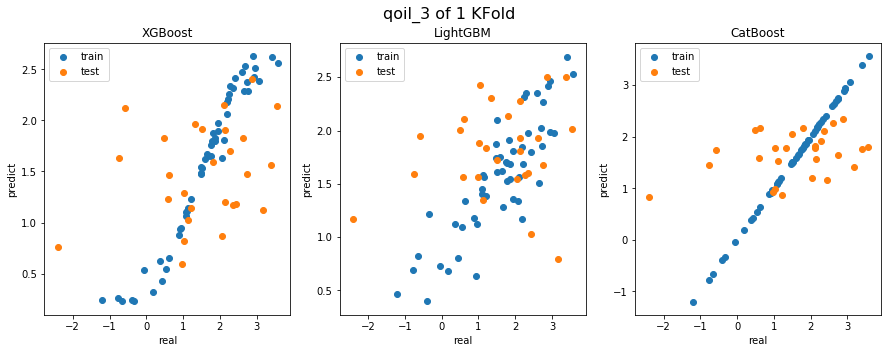


2 of KFold 3
TRAIN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 26, 27, 29, 30, 32, 33, 35, 36, 38, 40, 41, 42, 44, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 71, 72, 75, 76, 79, 80]
TEST: [0, 10, 17, 20, 21, 22, 24, 25, 28, 31, 34, 37, 39, 43, 45, 46, 47, 52, 55, 62, 64, 68, 69, 73, 74, 77, 78]

100%|███████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.07s/trial, best loss: 0.898708383379539]

XGB: {'colsample_bytree': 0.4487768561004696, 'gamma': 0.046157724772757355, 'learning_rate': 0.18605297422777722, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 226, 'reg_alpha': 2.066053747570031, 'reg_lambda': 2.2219216816224026, 'subsample': 0.9946425730882403}
LGBM: {'colsample_bytree': 0.3534277284213352, 'learning_rate': 0.12095473249744573, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 243, 'num_leaves': 19, 'reg_alpha': 1.540315987541192, 'reg_lambda': 0.8465439284970605, 'subsample': 0.9807156978636639}

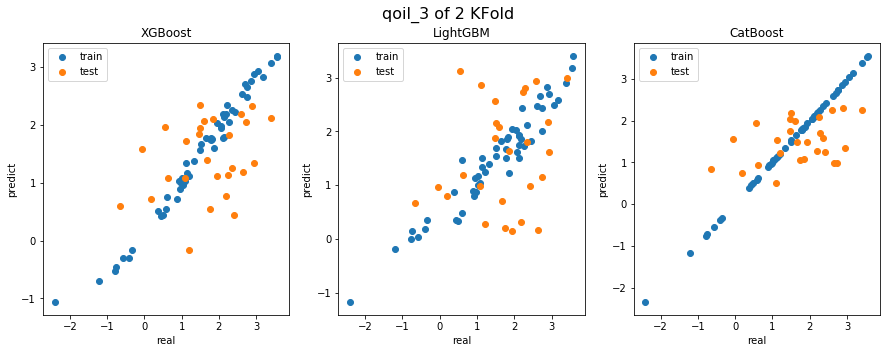


3 of KFold 3
TRAIN: [0, 1, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 65, 66, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80]
TEST: [2, 4, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 38, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 67, 70, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:23<00:00,  7.80s/trial, best loss: 1.1253045053672401]

XGB: {'colsample_bytree': 0.3436699214998726, 'gamma': 0.03426618820769283, 'learning_rate': 0.1450664938548893, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 226, 'reg_alpha': 4.792705839436716, 'reg_lambda': 3.481531344579995, 'subsample': 0.9622551259080826}
LGBM: {'colsample_bytree': 0.47062526738218047, 'learning_rate': 0.1449757466056052, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 191, 'num_leaves': 40, 'reg_alpha': 1.5971586923542036, 'reg_lambda': 3.8499454405011373, 'subsample': 0.8319955016090388}
C

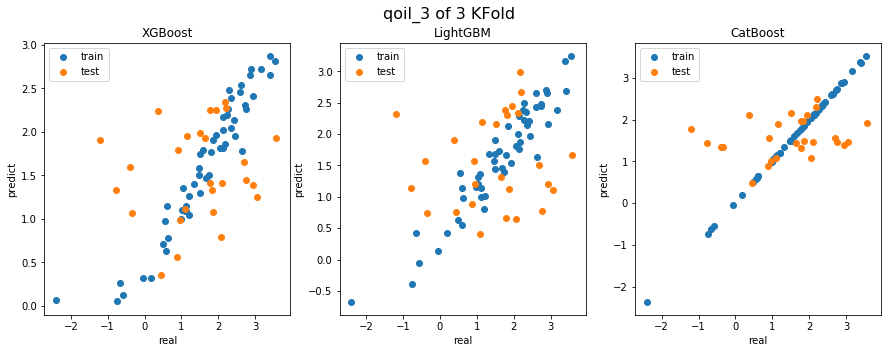

XGBRegressor
R2 TRAIN: [0.864, 0.957, 0.82]
R2 TEST: [0.06, -0.13, -0.076]

LGBMRegressor
R2 TRAIN: [0.612, 0.875, 0.849]
R2 TEST: [-0.033, -0.605, -0.28]

CatBoostRegressor
R2 TRAIN: [1.0, 1.0, 1.0]
R2 TEST: [0.113, 0.071, 0.01]


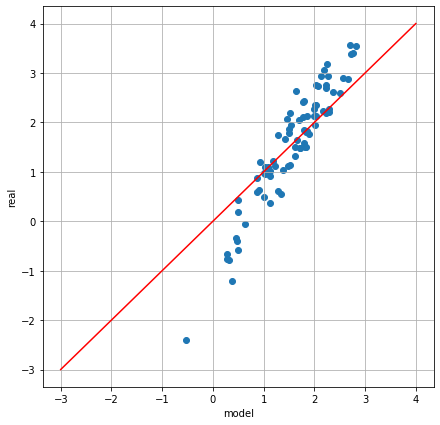

qoil_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 31, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 77, 78]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 29, 30, 32, 33, 35, 36, 40, 44, 50, 54, 57, 58, 65, 66, 72, 75, 76, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.34s/trial, best loss: 1.2690473026718923]

XGB: {'colsample_bytree': 0.4716529087474839, 'gamma': 0.04805404493026294, 'learning_rate': 0.18520283120032371, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 169, 'reg_alpha': 1.5754220379748363, 'reg_lambda': 3.65286986984184, 'subsample': 0.8254006979182599}
LGBM: {'colsample_bytree': 0.34255243849781425, 'learning_rate': 0.19634375554663658, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 131, 'num_leaves': 86, 'reg_alpha': 3.53426916711531, 'reg_lambda': 3.3561905448952807, 'subsample': 0.835156419350

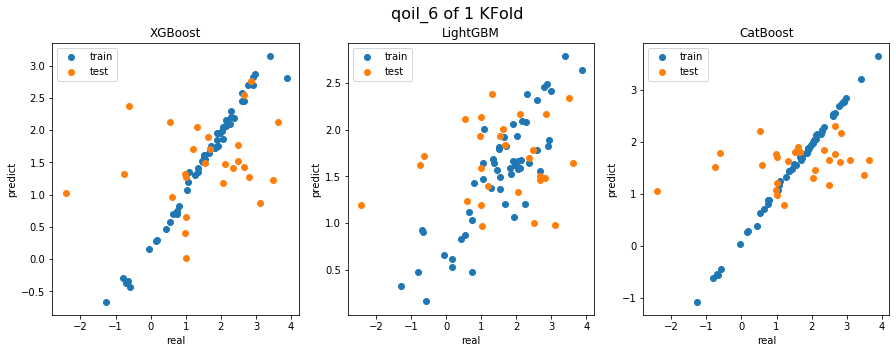


2 of KFold 3
TRAIN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 26, 27, 29, 30, 32, 33, 35, 36, 38, 40, 41, 42, 44, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 71, 72, 75, 76, 79, 80]
TEST: [0, 10, 17, 20, 21, 22, 24, 25, 28, 31, 34, 37, 39, 43, 45, 46, 47, 52, 55, 62, 64, 68, 69, 73, 74, 77, 78]

100%|██████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.05s/trial, best loss: 0.9210204250745826]

XGB: {'colsample_bytree': 0.7569711728200395, 'gamma': 0.01646021871657193, 'learning_rate': 0.1891876079477013, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 234, 'reg_alpha': 4.337714689604267, 'reg_lambda': 2.978694715042416, 'subsample': 0.8406984090306877}
LGBM: {'colsample_bytree': 0.451951888772456, 'learning_rate': 0.06823524913087933, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 117, 'num_leaves': 62, 'reg_alpha': 3.2491383600919077, 'reg_lambda': 4.193702395863427, 'subsample': 0.8718280981977028}
Cat

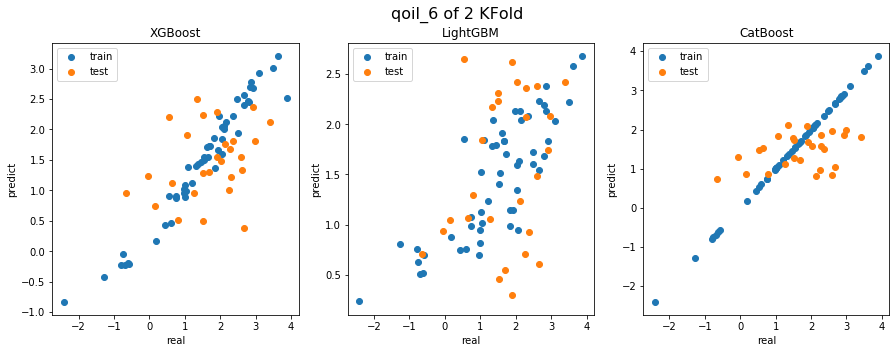


3 of KFold 3
TRAIN: [0, 1, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 65, 66, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80]
TEST: [2, 4, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 38, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 67, 70, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.42s/trial, best loss: 1.1615010676967974]

XGB: {'colsample_bytree': 0.4064469403262595, 'gamma': 0.010405415621118809, 'learning_rate': 0.19176131307393507, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 205, 'reg_alpha': 3.540599175798962, 'reg_lambda': 1.7297247404277898, 'subsample': 0.9043046295583218}
LGBM: {'colsample_bytree': 0.5868344785997475, 'learning_rate': 0.18988943652963913, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 229, 'num_leaves': 12, 'reg_alpha': 1.389151465393986, 'reg_lambda': 3.009537081097629, 'subsample': 0.9947888406162236}


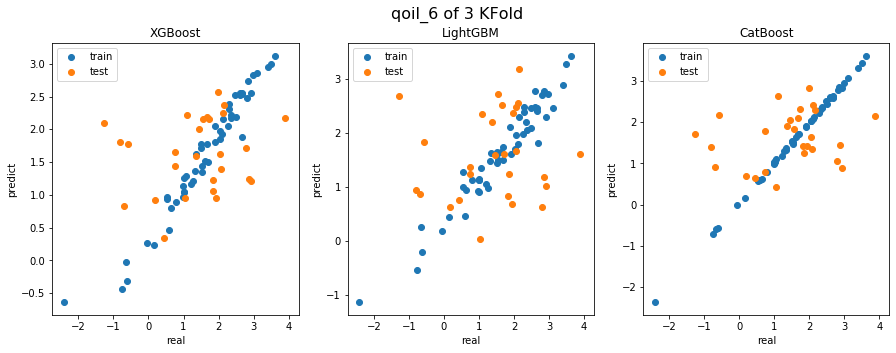

XGBRegressor
R2 TRAIN: [0.961, 0.903, 0.91]
R2 TEST: [-0.032, -0.056, -0.09]

LGBMRegressor
R2 TRAIN: [0.636, 0.546, 0.905]
R2 TEST: [-0.02, -0.206, -0.373]

CatBoostRegressor
R2 TRAIN: [0.992, 1.0, 0.999]
R2 TEST: [0.07, 0.077, -0.109]


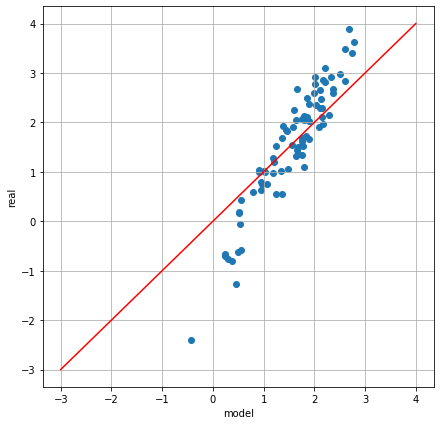

qoil_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 31, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 77, 78]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 29, 30, 32, 33, 35, 36, 40, 44, 50, 54, 57, 58, 65, 66, 72, 75, 76, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.50s/trial, best loss: 1.2342553448539066]

XGB: {'colsample_bytree': 0.3923779799339805, 'gamma': 0.006353036250553507, 'learning_rate': 0.06451465155650184, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 168, 'reg_alpha': 1.7308197456282843, 'reg_lambda': 1.2929562230083018, 'subsample': 0.8599914071921207}
LGBM: {'colsample_bytree': 0.4204807548711194, 'learning_rate': 0.13795621312835588, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 101, 'num_leaves': 46, 'reg_alpha': 3.4715695337538497, 'reg_lambda': 1.3023041519602114, 'subsample': 0.9615756

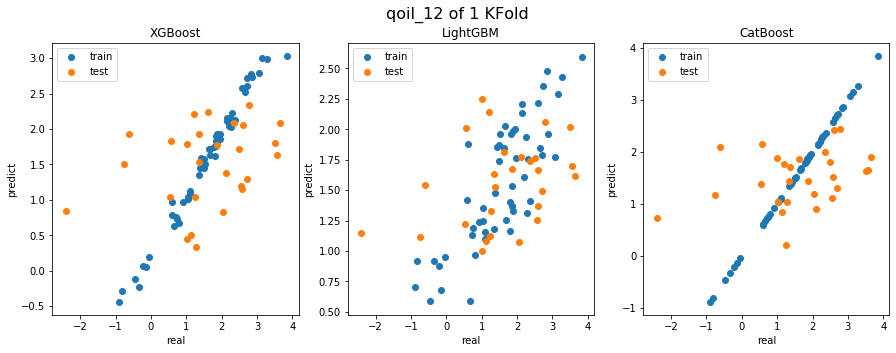


2 of KFold 3
TRAIN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 26, 27, 29, 30, 32, 33, 35, 36, 38, 40, 41, 42, 44, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 71, 72, 75, 76, 79, 80]
TEST: [0, 10, 17, 20, 21, 22, 24, 25, 28, 31, 34, 37, 39, 43, 45, 46, 47, 52, 55, 62, 64, 68, 69, 73, 74, 77, 78]

100%|███████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.63s/trial, best loss: 0.922134462344946]

XGB: {'colsample_bytree': 0.3047875823452989, 'gamma': 0.03427530514513535, 'learning_rate': 0.13320305771451607, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 228, 'reg_alpha': 4.554970239918195, 'reg_lambda': 0.5986610451819957, 'subsample': 0.9351010719431762}
LGBM: {'colsample_bytree': 0.7916043452518287, 'learning_rate': 0.14602440166579242, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 100, 'num_leaves': 53, 'reg_alpha': 3.0968738854440967, 'reg_lambda': 4.265147373000746, 'subsample': 0.8168154306655698}


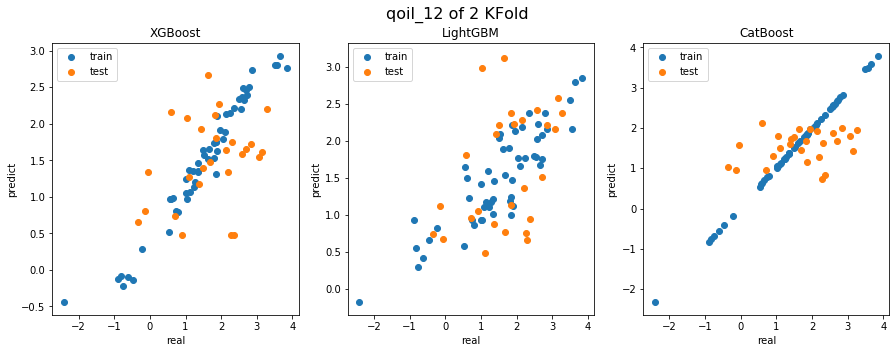


3 of KFold 3
TRAIN: [0, 1, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 65, 66, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80]
TEST: [2, 4, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 38, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 67, 70, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.92s/trial, best loss: 1.0846405775401513]

XGB: {'colsample_bytree': 0.5425941173040374, 'gamma': 0.04761830975759129, 'learning_rate': 0.15592418272278386, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 108, 'reg_alpha': 3.4768589165573514, 'reg_lambda': 3.6459731325185993, 'subsample': 0.839780674763911}
LGBM: {'colsample_bytree': 0.4119093351736811, 'learning_rate': 0.15021417269974202, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 186, 'num_leaves': 40, 'reg_alpha': 1.3890030071510773, 'reg_lambda': 3.060750406953205, 'subsample': 0.8373088119063802}


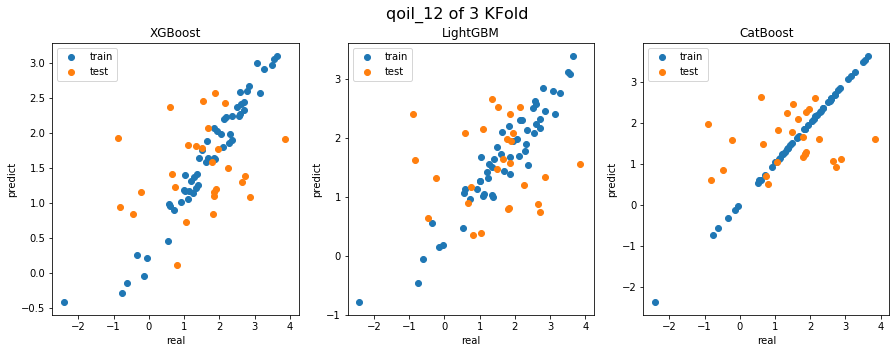

XGBRegressor
R2 TRAIN: [0.963, 0.872, 0.89]
R2 TEST: [0.064, -0.029, -0.074]

LGBMRegressor
R2 TRAIN: [0.554, 0.633, 0.866]
R2 TEST: [0.111, -0.0, -0.393]

CatBoostRegressor
R2 TRAIN: [1.0, 0.999, 1.0]
R2 TEST: [0.083, 0.043, -0.186]


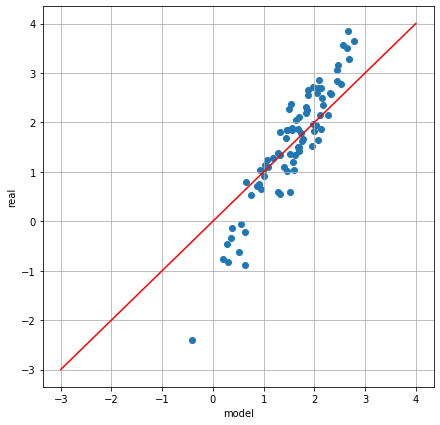

qliq_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 31, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 77, 78]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 29, 30, 32, 33, 35, 36, 40, 44, 50, 54, 57, 58, 65, 66, 72, 75, 76, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.75s/trial, best loss: 1.0733213756625095]

XGB: {'colsample_bytree': 0.7286666388188618, 'gamma': 0.021142151074184903, 'learning_rate': 0.05299258849088824, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 112, 'reg_alpha': 2.906785804143366, 'reg_lambda': 4.649619784831846, 'subsample': 0.8065915972255652}
LGBM: {'colsample_bytree': 0.7680007642149782, 'learning_rate': 0.18093269888145314, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 178, 'num_leaves': 59, 'reg_alpha': 1.3452150019534277, 'reg_lambda': 4.394454978217889, 'subsample': 0.83806376290

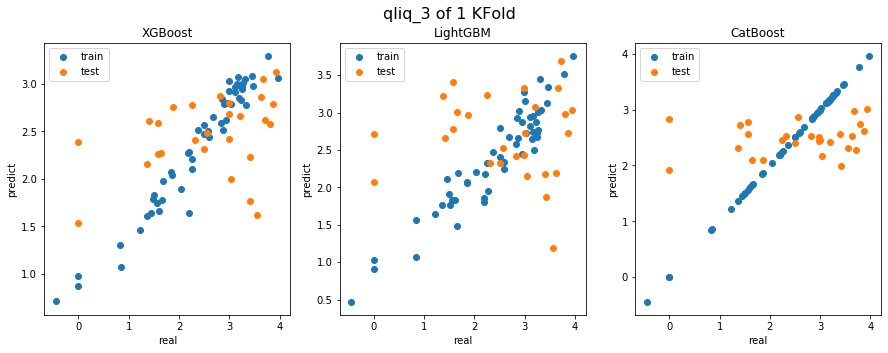


2 of KFold 3
TRAIN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 26, 27, 29, 30, 32, 33, 35, 36, 38, 40, 41, 42, 44, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 71, 72, 75, 76, 79, 80]
TEST: [0, 10, 17, 20, 21, 22, 24, 25, 28, 31, 34, 37, 39, 43, 45, 46, 47, 52, 55, 62, 64, 68, 69, 73, 74, 77, 78]

100%|██████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.24s/trial, best loss: 0.8155927297348526]

XGB: {'colsample_bytree': 0.4282051008997137, 'gamma': 0.03741488552658922, 'learning_rate': 0.18925710190148393, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 120, 'reg_alpha': 1.4888442160581814, 'reg_lambda': 2.3302488513223105, 'subsample': 0.9207741098708571}
LGBM: {'colsample_bytree': 0.7621922773910339, 'learning_rate': 0.14046749165333278, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 171, 'num_leaves': 55, 'reg_alpha': 1.4543702732136339, 'reg_lambda': 3.3489148652352627, 'subsample': 0.8324271920852692

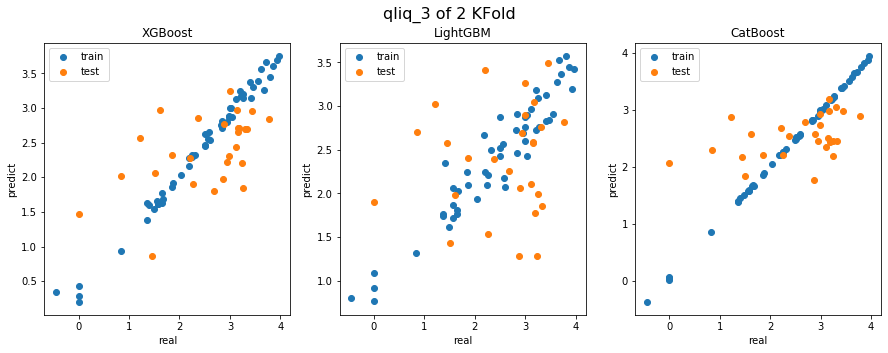


3 of KFold 3
TRAIN: [0, 1, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 65, 66, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80]
TEST: [2, 4, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 38, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 67, 70, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.80s/trial, best loss: 1.0094427620590427]

XGB: {'colsample_bytree': 0.33455281585541935, 'gamma': 0.027164562310190217, 'learning_rate': 0.10602858489803872, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 241, 'reg_alpha': 2.0978740380398757, 'reg_lambda': 3.230782779357804, 'subsample': 0.8951365412895721}
LGBM: {'colsample_bytree': 0.5707259178932571, 'learning_rate': 0.17411844147014247, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 188, 'num_leaves': 32, 'reg_alpha': 1.6620027146772887, 'reg_lambda': 0.9979764031811683, 'subsample': 0.874695716856483

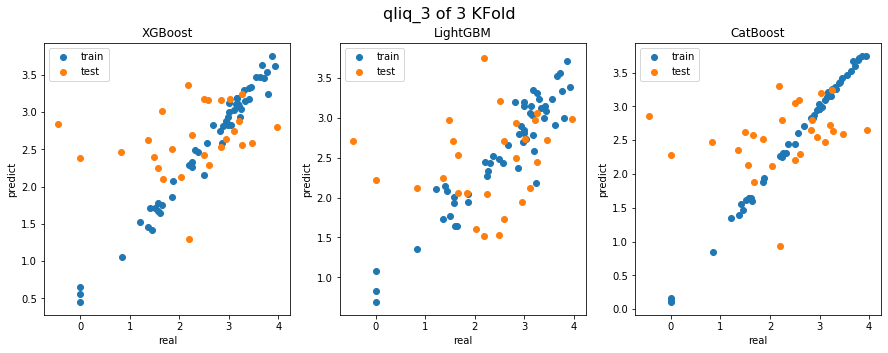

XGBRegressor
R2 TRAIN: [0.859, 0.97, 0.952]
R2 TEST: [0.11, 0.223, -0.133]

LGBMRegressor
R2 TRAIN: [0.832, 0.817, 0.82]
R2 TEST: [-0.306, -0.354, -0.155]

CatBoostRegressor
R2 TRAIN: [1.0, 0.999, 0.995]
R2 TEST: [0.022, 0.198, -0.114]


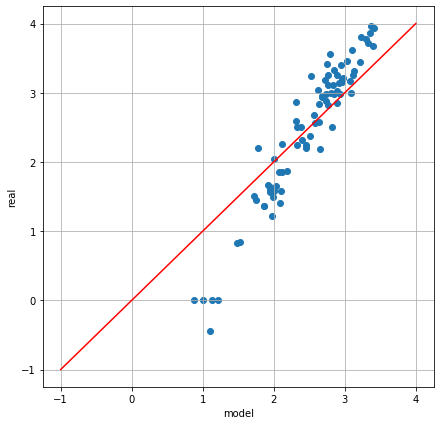

qliq_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 31, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 77, 78]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 29, 30, 32, 33, 35, 36, 40, 44, 50, 54, 57, 58, 65, 66, 72, 75, 76, 79, 80]

100%|████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.56trial/s, best loss: 1.0219972084704843]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.32s/trial, best loss: 1.0460648604282474]

XGB: {'colsample_bytree': 0.32826100584797957, 'gamma': 0.027269135810153257, 'learning_rate': 0.08432473146538311, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators

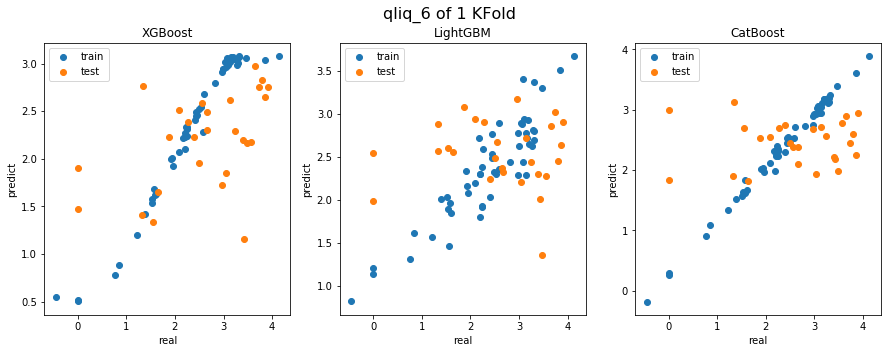


2 of KFold 3
TRAIN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 26, 27, 29, 30, 32, 33, 35, 36, 38, 40, 41, 42, 44, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 71, 72, 75, 76, 79, 80]
TEST: [0, 10, 17, 20, 21, 22, 24, 25, 28, 31, 34, 37, 39, 43, 45, 46, 47, 52, 55, 62, 64, 68, 69, 73, 74, 77, 78]

100%|███████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.21s/trial, best loss: 0.804272821012783]

XGB: {'colsample_bytree': 0.45819505578102415, 'gamma': 0.011470888482391712, 'learning_rate': 0.10224085431998774, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 112, 'reg_alpha': 3.7012578213813616, 'reg_lambda': 2.9837936925563184, 'subsample': 0.817691418988234}
LGBM: {'colsample_bytree': 0.44084857481405965, 'learning_rate': 0.15115887833297553, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 195, 'num_leaves': 46, 'reg_alpha': 1.976899160922069, 'reg_lambda': 0.2979407906276321, 'subsample': 0.807577603010160

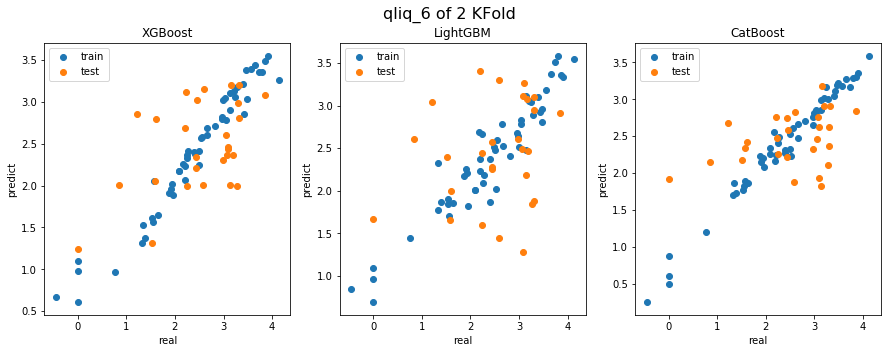


3 of KFold 3
TRAIN: [0, 1, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 65, 66, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80]
TEST: [2, 4, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 38, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 67, 70, 71]

100%|███████████████████████████████████████████████████| 3/3 [00:17<00:00,  5.82s/trial, best loss: 1.024007194692895]

XGB: {'colsample_bytree': 0.7388951891927871, 'gamma': 0.010201113983349204, 'learning_rate': 0.12857081061830367, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 130, 'reg_alpha': 2.7244877322747936, 'reg_lambda': 1.7356923586328865, 'subsample': 0.8669109053702181}
LGBM: {'colsample_bytree': 0.4265437720530978, 'learning_rate': 0.08347360479363278, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 113, 'num_leaves': 81, 'reg_alpha': 1.0361909321883638, 'reg_lambda': 3.383375958347998, 'subsample': 0.9504618950746666

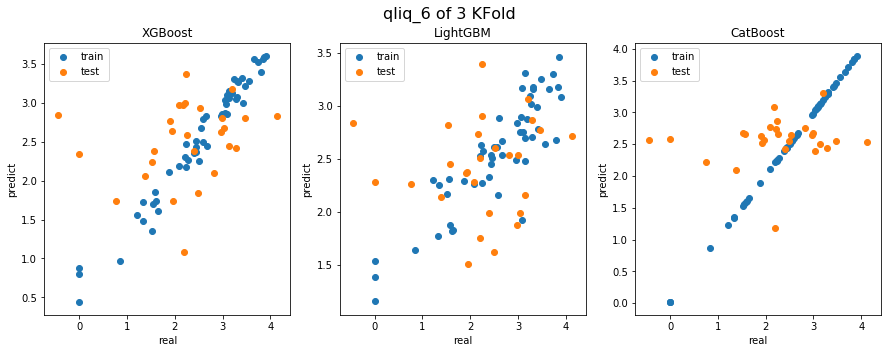

XGBRegressor
R2 TRAIN: [0.915, 0.89, 0.933]
R2 TEST: [0.087, 0.23, -0.114]

LGBMRegressor
R2 TRAIN: [0.744, 0.806, 0.652]
R2 TEST: [-0.148, -0.168, -0.184]

CatBoostRegressor
R2 TRAIN: [0.98, 0.893, 1.0]
R2 TEST: [-0.087, 0.112, -0.145]


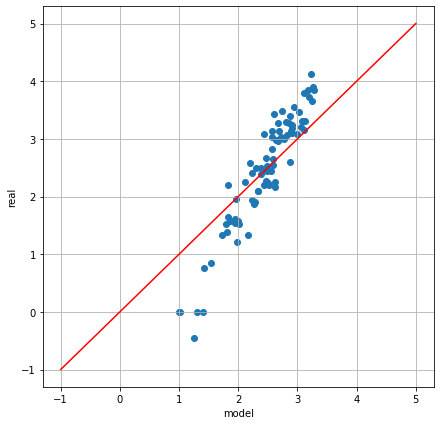

qliq_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 31, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 77, 78]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 29, 30, 32, 33, 35, 36, 40, 44, 50, 54, 57, 58, 65, 66, 72, 75, 76, 79, 80]

100%|███████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.11s/trial, best loss: 1.019973118251966]

XGB: {'colsample_bytree': 0.35936667360977415, 'gamma': 0.0009444912245051619, 'learning_rate': 0.0948119702067941, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 112, 'reg_alpha': 1.2733576039633516, 'reg_lambda': 3.2180929133334986, 'subsample': 0.9396408579776347}
LGBM: {'colsample_bytree': 0.7901890483442404, 'learning_rate': 0.15032749117210636, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 244, 'num_leaves': 63, 'reg_alpha': 1.842039397031391, 'reg_lambda': 0.31706021166802434, 'subsample': 0.805146

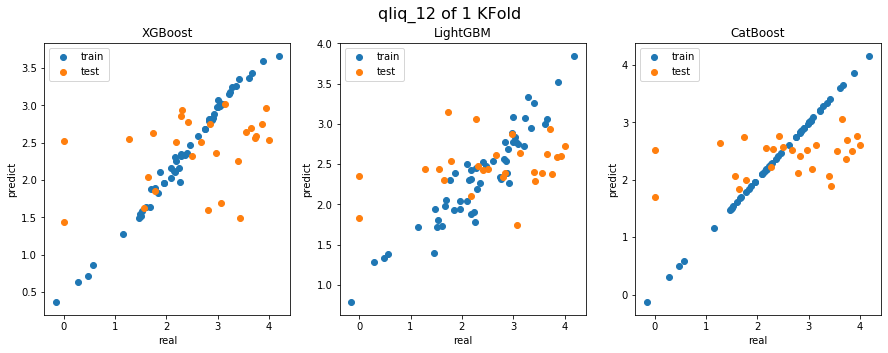


2 of KFold 3
TRAIN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 26, 27, 29, 30, 32, 33, 35, 36, 38, 40, 41, 42, 44, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 71, 72, 75, 76, 79, 80]
TEST: [0, 10, 17, 20, 21, 22, 24, 25, 28, 31, 34, 37, 39, 43, 45, 46, 47, 52, 55, 62, 64, 68, 69, 73, 74, 77, 78]

100%|██████████████████████████████████████████████████| 3/3 [00:38<00:00, 12.67s/trial, best loss: 0.7296990212713681]

XGB: {'colsample_bytree': 0.555335777145082, 'gamma': 0.04220267423976566, 'learning_rate': 0.1623721477651157, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 225, 'reg_alpha': 3.8543778128630275, 'reg_lambda': 1.7269298331324552, 'subsample': 0.8007950529334708}
LGBM: {'colsample_bytree': 0.36065620704130563, 'learning_rate': 0.16850044750791504, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 138, 'num_leaves': 85, 'reg_alpha': 2.605285557762597, 'reg_lambda': 1.6745527486537108, 'subsample': 0.9408116963750479}


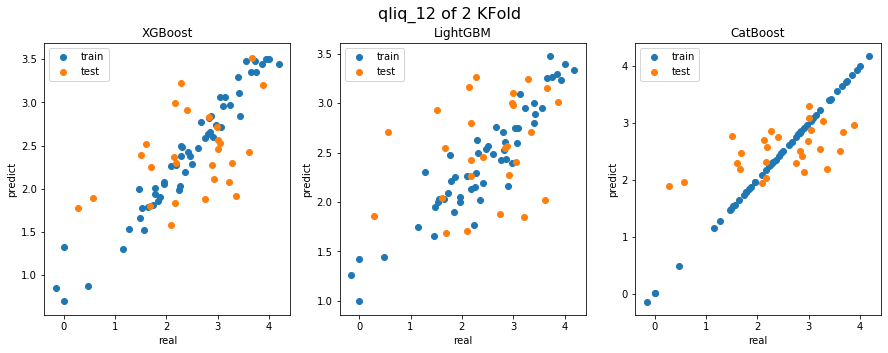


3 of KFold 3
TRAIN: [0, 1, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 65, 66, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80]
TEST: [2, 4, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 38, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 67, 70, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.22s/trial, best loss: 0.8795158261128578]

XGB: {'colsample_bytree': 0.34282498797243544, 'gamma': 0.04034359041091583, 'learning_rate': 0.18125866131206314, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 145, 'reg_alpha': 2.7611282228753002, 'reg_lambda': 4.867248882552163, 'subsample': 0.8790925681714012}
LGBM: {'colsample_bytree': 0.6957976988554786, 'learning_rate': 0.12889550184389892, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 122, 'num_leaves': 81, 'reg_alpha': 1.2449062621768214, 'reg_lambda': 0.5561266227546607, 'subsample': 0.9179402830337878

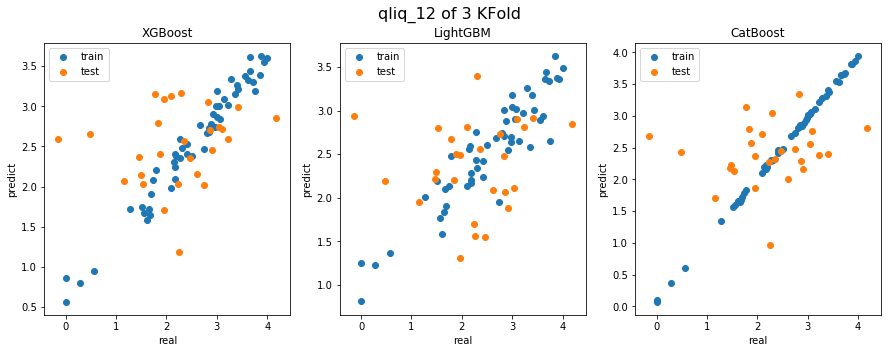

XGBRegressor
R2 TRAIN: [0.969, 0.877, 0.921]
R2 TEST: [0.049, 0.162, -0.195]

LGBMRegressor
R2 TRAIN: [0.801, 0.723, 0.771]
R2 TEST: [0.058, 0.002, -0.24]

CatBoostRegressor
R2 TRAIN: [1.0, 1.0, 0.998]
R2 TEST: [0.086, 0.288, -0.172]


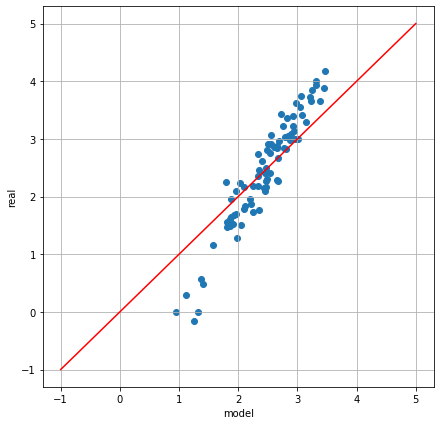

kh_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 35, 37, 38, 39, 41, 42, 43, 44, 48, 49, 50, 51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 36, 40, 45, 46, 47, 53, 54, 55, 64, 69, 70]

100%|████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.45trial/s, best loss: 1.2752183964790689]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.43s/trial, best loss: 1.1426417309034949]

XGB: {'colsample_bytree': 0.6440190577078906, 'gamma': 0.03825506692639849, 'learning_rate': 0.08863588716474669, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 243, 'reg_alpha': 2.3346928428514833, 're

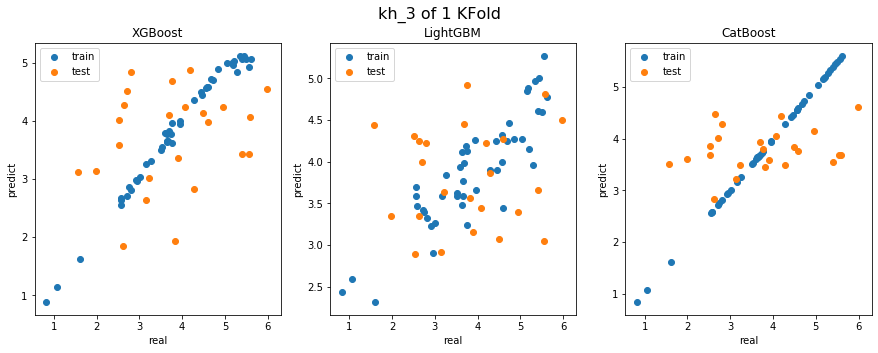


2 of KFold 3
TRAIN: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 36, 38, 40, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 58, 60, 63, 64, 67, 69, 70]
TEST: [0, 2, 17, 20, 21, 22, 26, 28, 31, 35, 37, 39, 41, 42, 43, 50, 52, 57, 59, 61, 62, 65, 66, 68]

100%|███████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.24s/trial, best loss: 1.196205505230193]

XGB: {'colsample_bytree': 0.7199549787593795, 'gamma': 0.003533672805238214, 'learning_rate': 0.145650189195821, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 209, 'reg_alpha': 4.219260189670081, 'reg_lambda': 1.9879375098900605, 'subsample': 0.859674187425187}
LGBM: {'colsample_bytree': 0.35558501228133, 'learning_rate': 0.060153485023093395, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 197, 'num_leaves': 81, 'reg_alpha': 4.73866029069951, 'reg_lambda': 2.4891995057628886, 'subsample': 0.8175504858044877}
CatBoost: {'colsample_bylevel': 0.4380968408

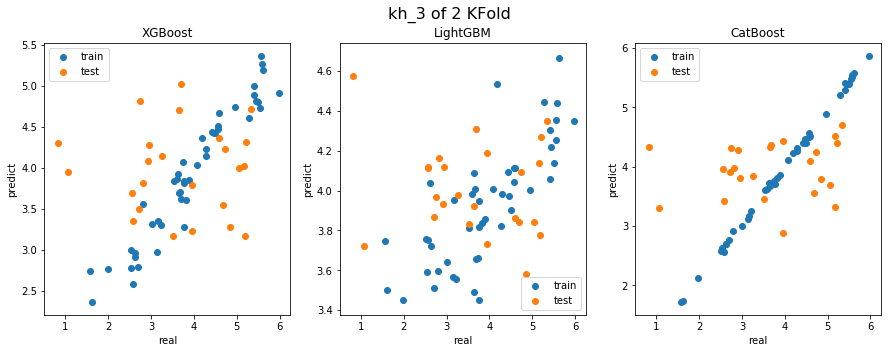


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 50, 52, 53, 54, 55, 57, 59, 61, 62, 64, 65, 66, 68, 69, 70]
TEST: [4, 5, 7, 8, 9, 10, 13, 14, 15, 18, 27, 29, 34, 38, 44, 48, 49, 51, 56, 58, 60, 63, 67]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.34s/trial, best loss: 1.0489749818989975]

XGB: {'colsample_bytree': 0.6241864445881478, 'gamma': 0.02478816173016525, 'learning_rate': 0.15221136266062407, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 1.686119383316833, 'reg_lambda': 1.9483851668450602, 'subsample': 0.8592008071432577}
LGBM: {'colsample_bytree': 0.31502398002922943, 'learning_rate': 0.19562349526970102, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 243, 'num_leaves': 69, 'reg_alpha': 2.6214371497636675, 'reg_lambda': 1.3448782653258569, 'subsample': 0.9232633746917344}
CatBoost: {'colsample_bylevel': 0.4300

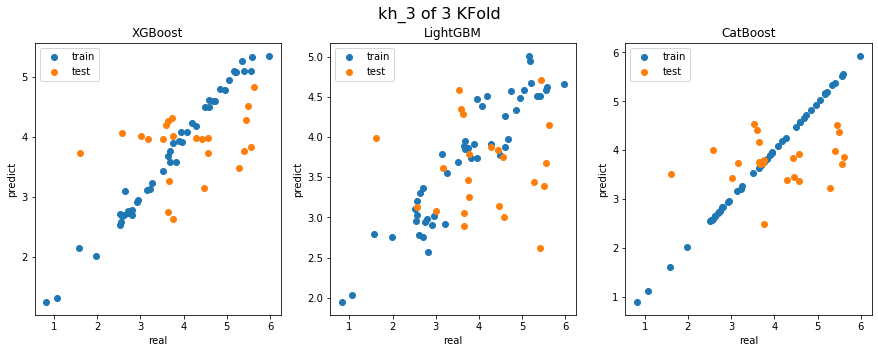

XGBRegressor
R2 TRAIN: [0.973, 0.858, 0.974]
R2 TEST: [-0.169, -0.276, -0.112]

LGBMRegressor
R2 TRAIN: [0.674, 0.346, 0.777]
R2 TEST: [-0.197, -0.175, -0.523]

CatBoostRegressor
R2 TRAIN: [1.0, 0.997, 1.0]
R2 TEST: [0.047, -0.076, -0.187]


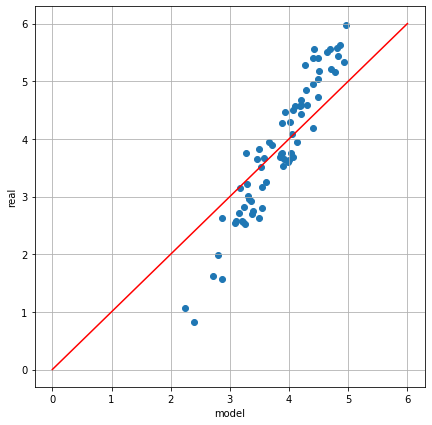

kh_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 37, 38, 41, 42, 46, 47, 48, 49, 50, 51, 53, 54, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72]
TEST: [1, 3, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 35, 36, 39, 40, 43, 44, 45, 52, 55, 57, 58, 68, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.61s/trial, best loss: 1.2386522333496008]

XGB: {'colsample_bytree': 0.3586751885942307, 'gamma': 0.012116042895711067, 'learning_rate': 0.10483076588766874, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 128, 'reg_alpha': 3.503085423208082, 'reg_lambda': 1.8095354762034903, 'subsample': 0.8329832719672481}
LGBM: {'colsample_bytree': 0.388443242579975, 'learning_rate': 0.18997909286225884, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 125, 'num_leaves': 25, 'reg_alpha': 2.05083342871844, 'reg_lambda': 0.9936619282327919, 'subsample': 0.8491645619400877}
CatBoost: {'colsample_byleve

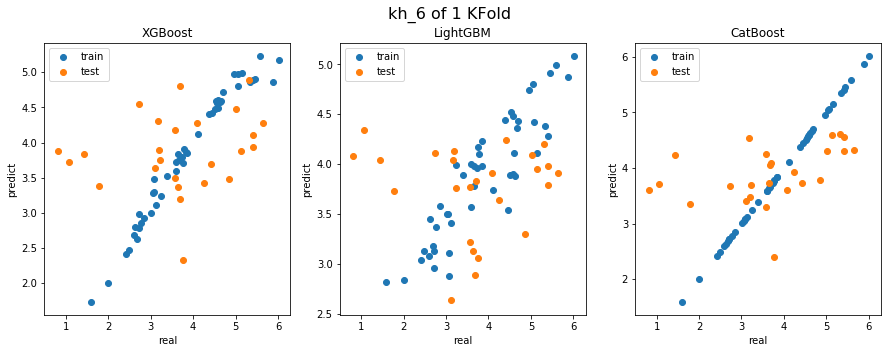


2 of KFold 3
TRAIN: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 51, 52, 55, 57, 58, 60, 61, 63, 67, 68, 69, 71, 72]
TEST: [0, 2, 6, 10, 17, 20, 21, 22, 26, 28, 31, 37, 46, 47, 50, 53, 54, 56, 59, 62, 64, 65, 66, 70]

100%|██████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.29s/trial, best loss: 0.9768888895788557]

XGB: {'colsample_bytree': 0.39345480736805877, 'gamma': 0.04706652116523407, 'learning_rate': 0.13296511216183982, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 234, 'reg_alpha': 4.196591133287294, 'reg_lambda': 3.7014144625073526, 'subsample': 0.9775216521571806}
LGBM: {'colsample_bytree': 0.6030579590316278, 'learning_rate': 0.06371469758930554, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 164, 'num_leaves': 32, 'reg_alpha': 3.589200904767417, 'reg_lambda': 1.4447634978762154, 'subsample': 0.8934148374333714}
CatBoost: {'colsample_bylevel':

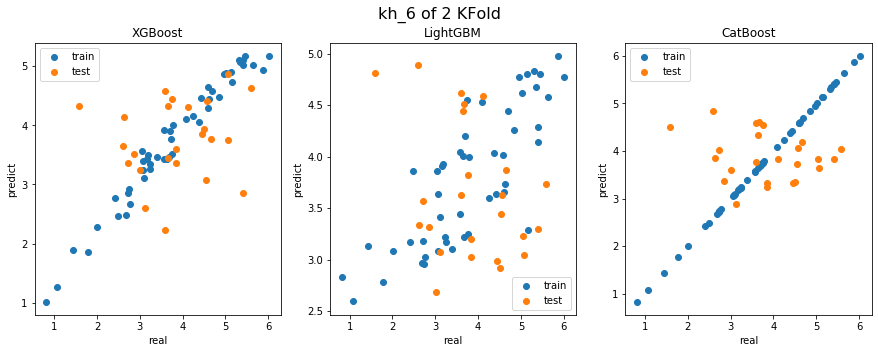


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 62, 64, 65, 66, 68, 70, 71]
TEST: [4, 5, 7, 8, 9, 13, 14, 15, 18, 27, 29, 34, 38, 41, 42, 48, 49, 51, 60, 61, 63, 67, 69, 72]

100%|██████████████████████████████████████████████████| 3/3 [00:25<00:00,  8.56s/trial, best loss: 1.1546583855517751]

XGB: {'colsample_bytree': 0.7067291659037063, 'gamma': 0.033795333716028664, 'learning_rate': 0.07176639132046768, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 185, 'reg_alpha': 4.79268453271576, 'reg_lambda': 1.0871713525644706, 'subsample': 0.8487684284192157}
LGBM: {'colsample_bytree': 0.3437137476280227, 'learning_rate': 0.17935817476065535, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 197, 'num_leaves': 61, 'reg_alpha': 1.6925304778857888, 'reg_lambda': 3.9640982158737597, 'subsample': 0.8461084639567423}
CatBoost: {'colsample_bylevel':

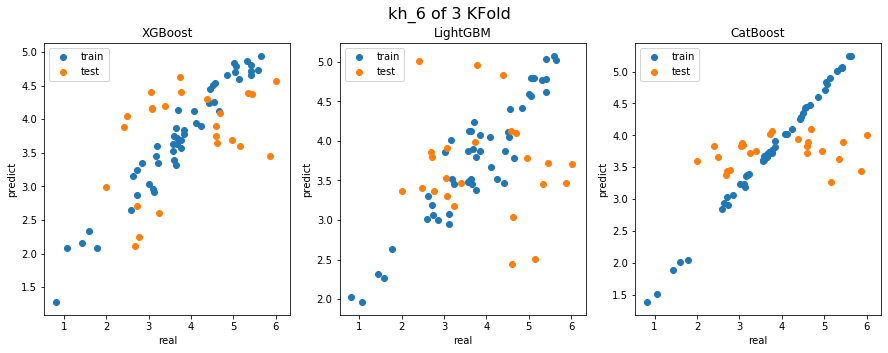

XGBRegressor
R2 TRAIN: [0.94, 0.94, 0.882]
R2 TEST: [-0.02, -0.276, 0.108]

LGBMRegressor
R2 TRAIN: [0.702, 0.572, 0.791]
R2 TEST: [-0.158, -0.913, -0.496]

CatBoostRegressor
R2 TRAIN: [1.0, 1.0, 0.959]
R2 TEST: [0.148, -0.463, 0.005]


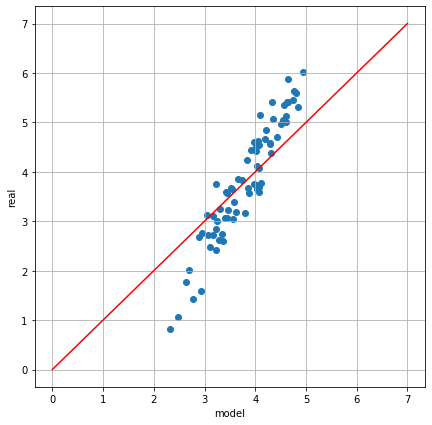

kh_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 37, 38, 41, 42, 43, 47, 48, 49, 50, 51, 52, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 70, 71, 72, 74]
TEST: [1, 3, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 35, 36, 39, 40, 44, 45, 46, 53, 56, 58, 68, 69, 73]

100%|██████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.17s/trial, best loss: 1.5758995647341933]

XGB: {'colsample_bytree': 0.35948623816592956, 'gamma': 0.012687223633015582, 'learning_rate': 0.07770033709578537, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 212, 'reg_alpha': 1.391121311172728, 'reg_lambda': 0.5476679349936786, 'subsample': 0.9258621097326846}
LGBM: {'colsample_bytree': 0.42279931436035934, 'learning_rate': 0.16144540465864304, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 102, 'num_leaves': 94, 'reg_alpha': 1.9610125527782527, 'reg_lambda': 1.0923030562502312, 'subsample': 0.9321721687463511}
CatBoost: {'co

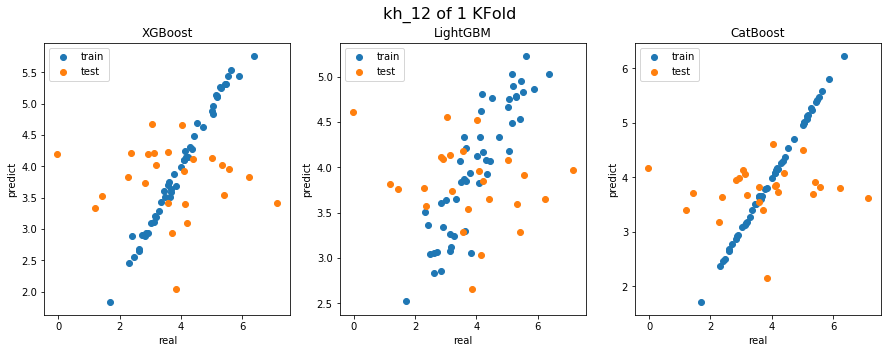


2 of KFold 3
TRAIN: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 51, 53, 56, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 73]
TEST: [0, 2, 6, 10, 17, 20, 21, 22, 26, 28, 31, 37, 43, 47, 50, 52, 54, 55, 57, 64, 66, 70, 71, 72, 74]

100%|██████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.74s/trial, best loss: 0.9861938973235926]

XGB: {'colsample_bytree': 0.7192261962767036, 'gamma': 0.024850735102375173, 'learning_rate': 0.11600662050666423, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 201, 'reg_alpha': 1.5730625659017154, 'reg_lambda': 0.8156824531816925, 'subsample': 0.9217320332328937}
LGBM: {'colsample_bytree': 0.7612586879928254, 'learning_rate': 0.17241005144553567, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 194, 'num_leaves': 52, 'reg_alpha': 3.600535075685069, 'reg_lambda': 0.47515365294015843, 'subsample': 0.9093135702858228}
CatBoost: {'colsample

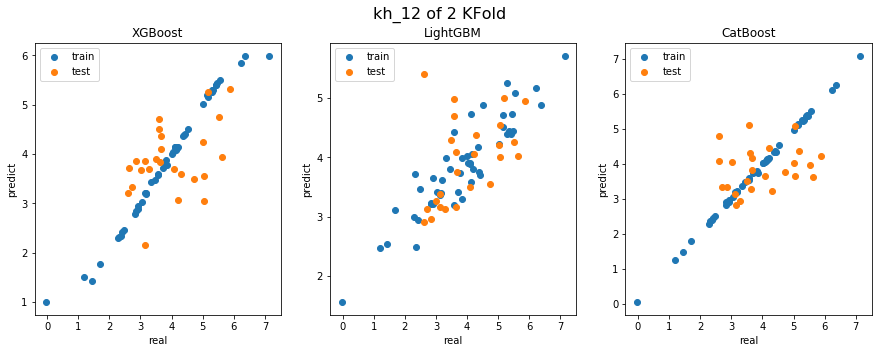


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 64, 66, 68, 69, 70, 71, 72, 73, 74]
TEST: [4, 5, 7, 8, 9, 13, 14, 15, 18, 27, 29, 34, 38, 41, 42, 48, 49, 51, 59, 60, 61, 62, 63, 65, 67]

100%|███████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.24s/trial, best loss: 1.124520138472322]

XGB: {'colsample_bytree': 0.5544931673405697, 'gamma': 0.01804326164704767, 'learning_rate': 0.1630240215456416, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 220, 'reg_alpha': 3.9926924111425413, 'reg_lambda': 1.6394940222496772, 'subsample': 0.916629343611605}
LGBM: {'colsample_bytree': 0.3426248498030606, 'learning_rate': 0.06510669781682521, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 220, 'num_leaves': 43, 'reg_alpha': 1.250984648261901, 'reg_lambda': 0.398452038849767, 'subsample': 0.837293764013682}
CatBoost: {'colsample_bylev

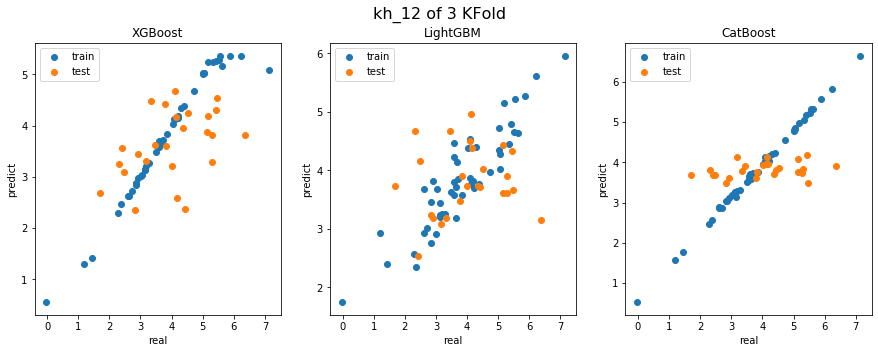

XGBRegressor
R2 TRAIN: [0.979, 0.971, 0.932]
R2 TEST: [-0.201, 0.097, 0.068]

LGBMRegressor
R2 TRAIN: [0.739, 0.716, 0.756]
R2 TEST: [-0.228, 0.13, -0.166]

CatBoostRegressor
R2 TRAIN: [0.998, 0.999, 0.974]
R2 TEST: [-0.055, -0.109, 0.046]


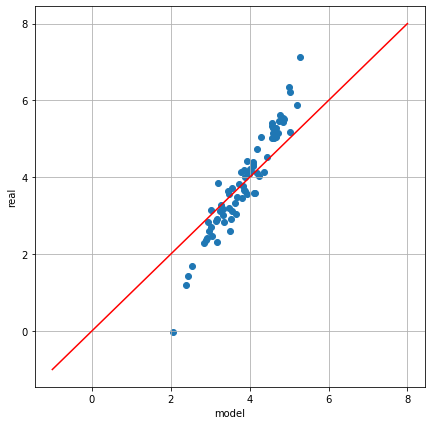

kh_mean

1 of KFold 3
TRAIN: [0, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 37, 38, 41, 42, 46, 47, 48, 49, 50, 51, 53, 54, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73]
TEST: [1, 3, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 35, 36, 39, 40, 43, 44, 45, 52, 55, 57, 58, 69, 72]

100%|██████████████████████████████████████████████████| 3/3 [00:37<00:00, 12.53s/trial, best loss: 0.9450436346901474]

XGB: {'colsample_bytree': 0.7190077075284187, 'gamma': 0.04546957447594166, 'learning_rate': 0.1552191427081947, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 202, 'reg_alpha': 1.187780757826257, 'reg_lambda': 2.3092789004355705, 'subsample': 0.8011846742543394}
LGBM: {'colsample_bytree': 0.3418978857328307, 'learning_rate': 0.14108603057239155, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 238, 'num_leaves': 49, 'reg_alpha': 2.3667590618337013, 'reg_lambda': 3.778178382490034, 'subsample': 0.8188142958144181}
CatBoost: {'colsample

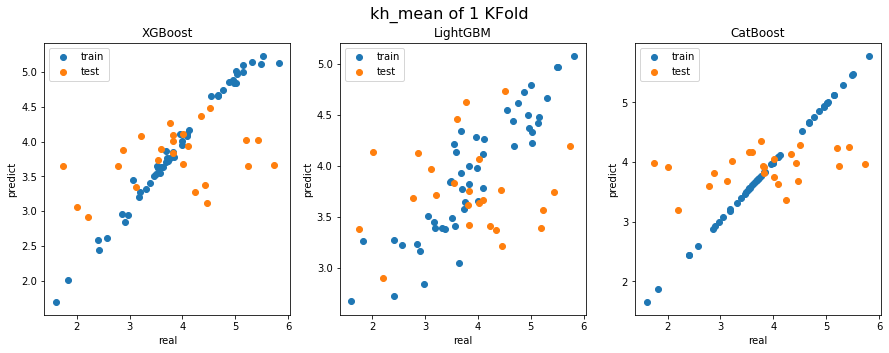


2 of KFold 3
TRAIN: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 48, 49, 51, 52, 55, 57, 58, 59, 60, 61, 63, 64, 67, 69, 70, 72]
TEST: [0, 2, 6, 10, 17, 20, 21, 22, 26, 28, 31, 37, 41, 46, 47, 50, 53, 54, 56, 62, 65, 66, 68, 71, 73]

100%|████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.67trial/s, best loss: 1.0601413704398706]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.99s/trial, best loss: 1.0711374506935962]

XGB: {'colsample_bytree': 0.7639991379660676, 'gamma': 0.005759609602549121, 'learning_rate': 0.14450992872150253, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 196, 'reg_alpha': 3.0299782793843

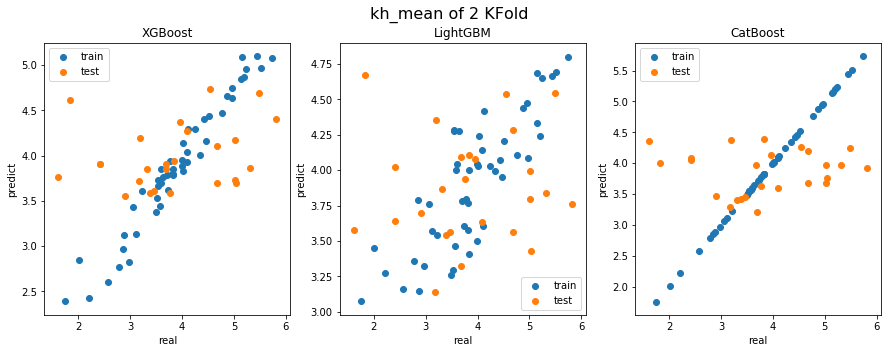


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 62, 65, 66, 68, 69, 71, 72, 73]
TEST: [4, 5, 7, 8, 9, 13, 14, 15, 18, 27, 29, 34, 38, 42, 48, 49, 51, 59, 60, 61, 63, 64, 67, 70]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.92s/trial, best loss: 0.7166442077490344]

XGB: {'colsample_bytree': 0.3461467048262276, 'gamma': 0.0070115956200357266, 'learning_rate': 0.19018182405814338, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 124, 'reg_alpha': 4.46977535442397, 'reg_lambda': 2.368823865144121, 'subsample': 0.8474670836721038}
LGBM: {'colsample_bytree': 0.7637040222809188, 'learning_rate': 0.18915473221152174, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 120, 'num_leaves': 12, 'reg_alpha': 2.545731844352127, 'reg_lambda': 2.2078203304925696, 'subsample': 0.8345713116574404}
CatBoost: {'colsample_byleve

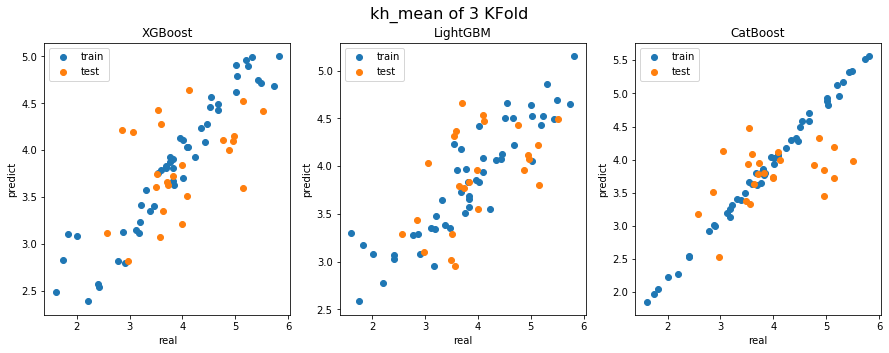

XGBRegressor
R2 TRAIN: [0.975, 0.913, 0.836]
R2 TEST: [0.108, 0.033, 0.126]

LGBMRegressor
R2 TRAIN: [0.739, 0.577, 0.703]
R2 TEST: [-0.115, -0.077, 0.237]

CatBoostRegressor
R2 TRAIN: [1.0, 1.0, 0.986]
R2 TEST: [0.113, -0.087, 0.083]


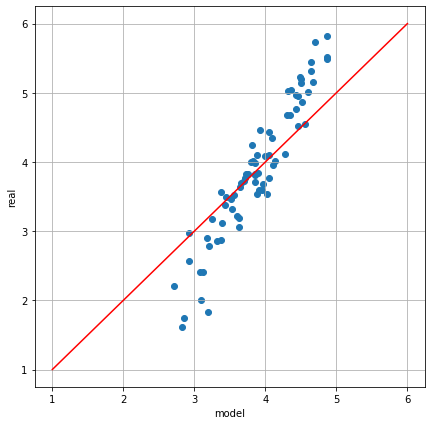

kh_median

1 of KFold 3
TRAIN: [2, 3, 5, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 22, 23, 25, 26, 27]
TEST: [0, 1, 4, 6, 7, 14, 18, 21, 24, 28]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.35s/trial, best loss: 1.0288225548588652]

XGB: {'colsample_bytree': 0.3517432963689636, 'gamma': 0.04095444735460215, 'learning_rate': 0.1753062770975753, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 135, 'reg_alpha': 4.324534507489476, 'reg_lambda': 3.4638967487048116, 'subsample': 0.8742728124573858}
LGBM: {'colsample_bytree': 0.4657157225683928, 'learning_rate': 0.12335368217114001, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 244, 'num_leaves': 61, 'reg_alpha': 1.2463348039135473, 'reg_lambda': 2.058231409109586, 'subsample': 0.9621881831764889}
CatBoost: {'colsample_bylevel': 0.3953233407218941, 'learning_rate': 0.14638190301338705, 'max_depth': 7, 'n_estimators': 94, 'reg_lambda': 4.932076154487662}




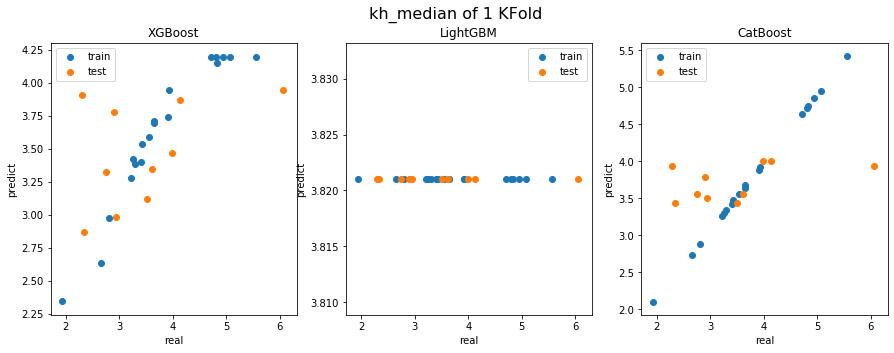


2 of KFold 3
TRAIN: [0, 1, 3, 4, 5, 6, 7, 8, 9, 14, 16, 17, 18, 19, 20, 21, 23, 24, 28]
TEST: [2, 10, 11, 12, 13, 15, 22, 25, 26, 27]

100%|██████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.17s/trial, best loss: 0.7265842463825795]

XGB: {'colsample_bytree': 0.7412028946903306, 'gamma': 0.0012780899211581988, 'learning_rate': 0.13604871342415897, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 100, 'reg_alpha': 3.003091910458126, 'reg_lambda': 3.4842234970364605, 'subsample': 0.8491395885948902}
LGBM: {'colsample_bytree': 0.6159156790755389, 'learning_rate': 0.149197720852982, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 206, 'num_leaves': 51, 'reg_alpha': 1.9843463564373596, 'reg_lambda': 0.6644500295048911, 'subsample': 0.9102352849911772}
CatBoost: {'colsample_bylevel': 0.7497732559074026, 'learning_rate': 0.1531379819604497, 'max_depth': 6, 'n_estimators': 87, 'reg_lambda': 2.191229187450968}




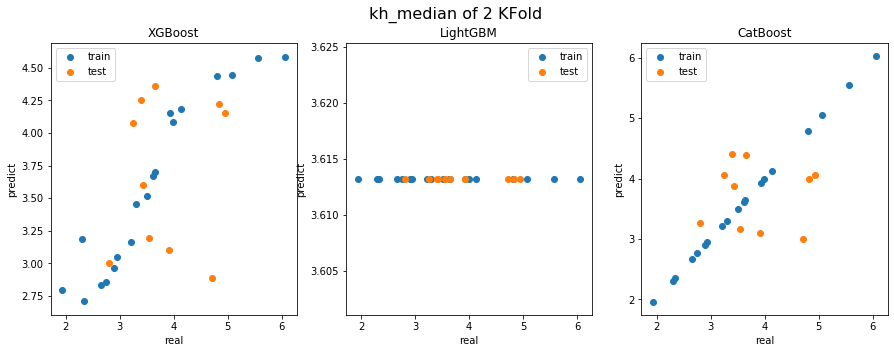


3 of KFold 3
TRAIN: [0, 1, 2, 4, 6, 7, 10, 11, 12, 13, 14, 15, 18, 21, 22, 24, 25, 26, 27, 28]
TEST: [3, 5, 8, 9, 16, 17, 19, 20, 23]

100%|███████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.79s/trial, best loss: 1.110059682649683]

XGB: {'colsample_bytree': 0.4735500269326588, 'gamma': 0.0022762365503869453, 'learning_rate': 0.1018638008259025, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 191, 'reg_alpha': 3.648329791603723, 'reg_lambda': 1.2679473987313172, 'subsample': 0.9041830598867912}
LGBM: {'colsample_bytree': 0.7988946386250986, 'learning_rate': 0.1372984066422658, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 178, 'num_leaves': 78, 'reg_alpha': 1.8476508196365176, 'reg_lambda': 0.6456250268728658, 'subsample': 0.9369201151018923}
CatBoost: {'colsample_bylevel': 0.721809869813359, 'learning_rate': 0.14562423985959488, 'max_depth': 9, 'n_estimators': 54, 'reg_lambda': 4.563068721413606}




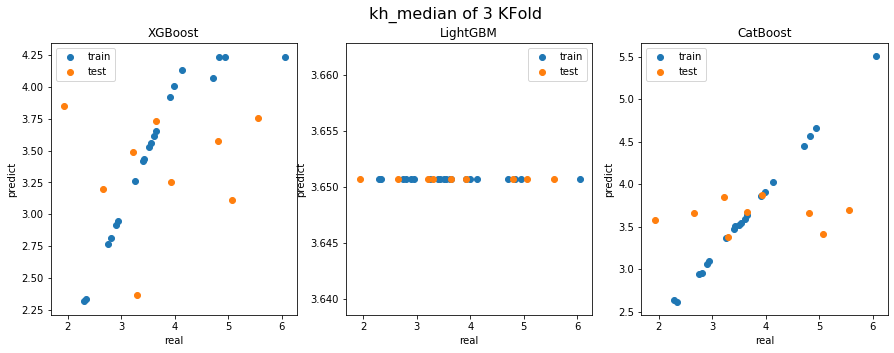

XGBRegressor
R2 TRAIN: [0.715, 0.759, 0.728]
R2 TEST: [0.197, -0.456, -0.254]

LGBMRegressor
R2 TRAIN: [0.0, -0.0, 0.0]
R2 TEST: [-0.121, -0.113, -0.016]

CatBoostRegressor
R2 TRAIN: [0.993, 1.0, 0.948]
R2 TEST: [0.092, -0.613, -0.049]


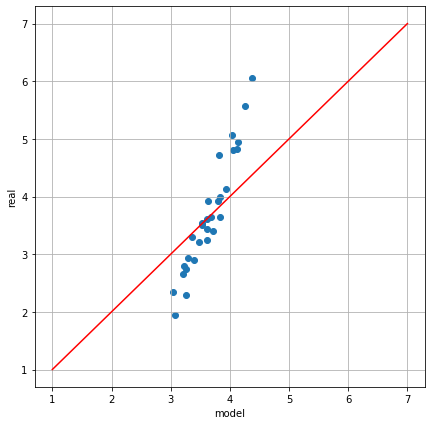

Kprod_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 35, 37, 38, 39, 41, 42, 43, 44, 48, 49, 50, 51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68]
TEST: [1, 3, 6, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 36, 40, 45, 46, 47, 53, 54, 55, 64, 69, 70]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.48s/trial, best loss: 1.1203761556698555]

XGB: {'colsample_bytree': 0.47562063806039145, 'gamma': 0.04358317452893203, 'learning_rate': 0.10858119342892782, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 201, 'reg_alpha': 4.604367567674269, 'reg_lambda': 4.436496290200023, 'subsample': 0.8458849497587954}
LGBM: {'colsample_bytree': 0.5686037346214932, 'learning_rate': 0.19592161385420176, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 221, 'num_leaves': 15, 'reg_alpha': 1.498220991453211, 'reg_lambda': 3.6687371563172566, 'subsample': 0.9399079537179091}
CatBoost: {'colsample_bylevel': 

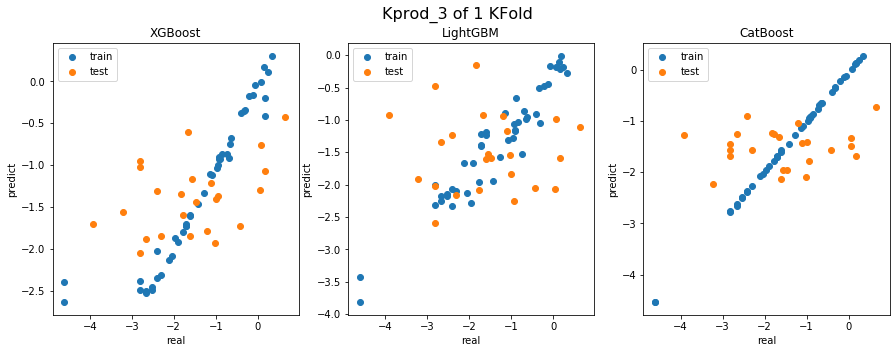


2 of KFold 3
TRAIN: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 36, 38, 40, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 58, 60, 63, 64, 67, 69, 70]
TEST: [0, 2, 17, 20, 21, 22, 26, 28, 31, 35, 37, 39, 41, 42, 43, 50, 52, 57, 59, 61, 62, 65, 66, 68]

100%|████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.41s/trial, best loss: 1.18922570970638]

XGB: {'colsample_bytree': 0.3456077460943295, 'gamma': 0.048942514421700486, 'learning_rate': 0.17837884007648952, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 103, 'reg_alpha': 3.637792558764429, 'reg_lambda': 0.6555875443057285, 'subsample': 0.9575947381838369}
LGBM: {'colsample_bytree': 0.38941674432441387, 'learning_rate': 0.17279863537729612, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 176, 'num_leaves': 56, 'reg_alpha': 1.666943489866619, 'reg_lambda': 2.9239013075993823, 'subsample': 0.8249046577096995}
CatBoost: {'colsample_bylevel': 0.7650

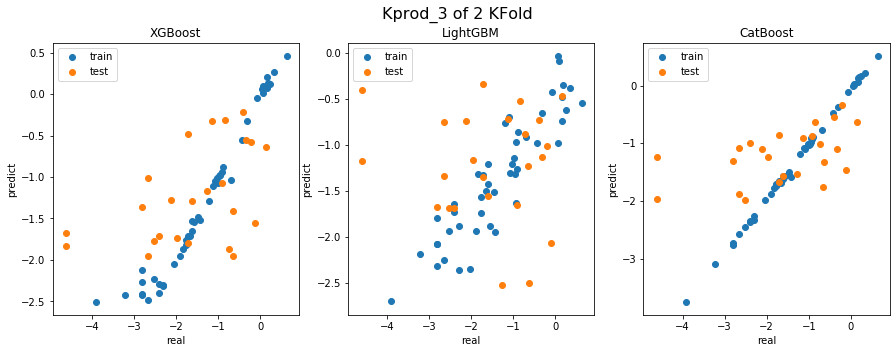


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 50, 52, 53, 54, 55, 57, 59, 61, 62, 64, 65, 66, 68, 69, 70]
TEST: [4, 5, 7, 8, 9, 10, 13, 14, 15, 18, 27, 29, 34, 38, 44, 48, 49, 51, 56, 58, 60, 63, 67]

100%|██████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.63s/trial, best loss: 0.9728260326383312]

XGB: {'colsample_bytree': 0.7553548273013841, 'gamma': 0.01307919299337489, 'learning_rate': 0.05883433130680667, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 233, 'reg_alpha': 1.181876675160848, 'reg_lambda': 3.8207930469721485, 'subsample': 0.828302154404367}
LGBM: {'colsample_bytree': 0.36942231020112964, 'learning_rate': 0.14981548984040793, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 197, 'num_leaves': 91, 'reg_alpha': 1.4350862545828527, 'reg_lambda': 4.106752199364703, 'subsample': 0.8660444896840009}
CatBoost: {'colsample_bylevel': 0.396477

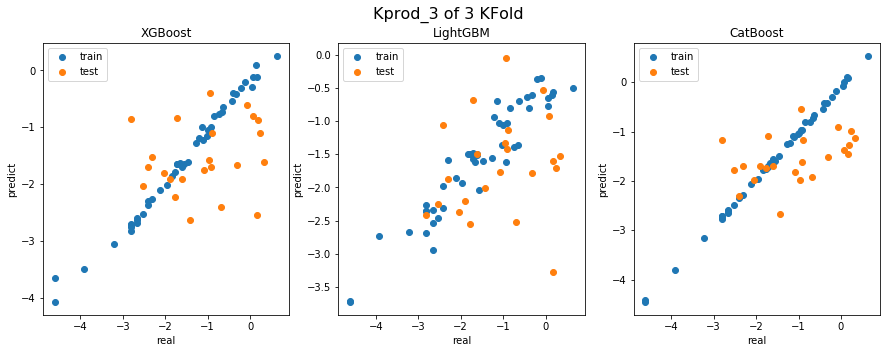

XGBRegressor
R2 TRAIN: [0.841, 0.926, 0.971]
R2 TEST: [0.14, 0.142, -0.381]

LGBMRegressor
R2 TRAIN: [0.863, 0.73, 0.835]
R2 TEST: [-0.296, -0.416, -0.648]

CatBoostRegressor
R2 TRAIN: [0.999, 0.996, 0.997]
R2 TEST: [-0.018, 0.121, -0.038]


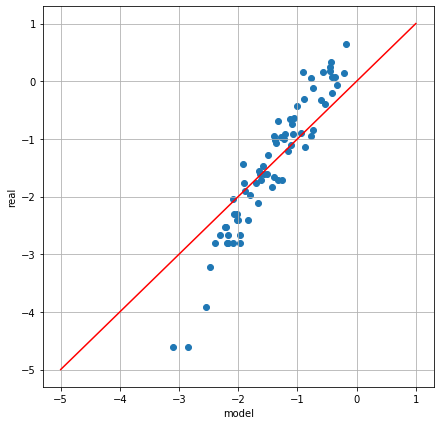

Kprod_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 37, 38, 41, 42, 46, 47, 48, 49, 50, 51, 53, 54, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72]
TEST: [1, 3, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 35, 36, 39, 40, 43, 44, 45, 52, 55, 57, 58, 68, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.54s/trial, best loss: 1.1207242870689658]

XGB: {'colsample_bytree': 0.3629336686516411, 'gamma': 0.0009820150987319754, 'learning_rate': 0.1890168171866381, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 189, 'reg_alpha': 3.012021854483645, 'reg_lambda': 2.5793778958834785, 'subsample': 0.8745770010425089}
LGBM: {'colsample_bytree': 0.3248031679272795, 'learning_rate': 0.1733554662538595, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 218, 'num_leaves': 23, 'reg_alpha': 4.635078985569786, 'reg_lambda': 4.422299178247045, 'subsample': 0.8702593305439149}
CatBoost: {'colsample_byl

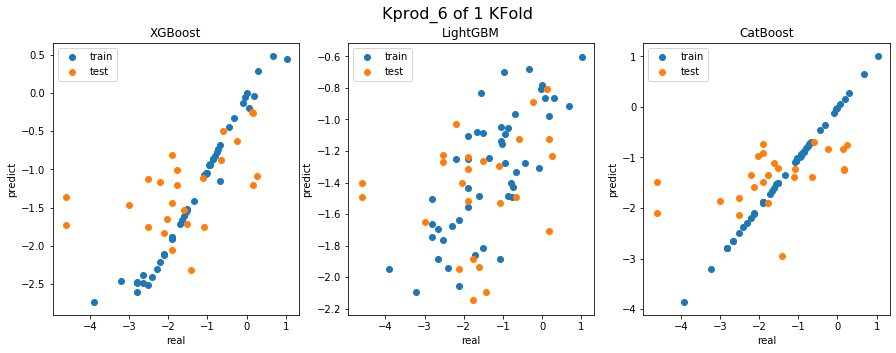


2 of KFold 3
TRAIN: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 51, 52, 55, 57, 58, 60, 61, 63, 67, 68, 69, 71, 72]
TEST: [0, 2, 6, 10, 17, 20, 21, 22, 26, 28, 31, 37, 46, 47, 50, 53, 54, 56, 59, 62, 64, 65, 66, 70]

100%|██████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.38s/trial, best loss: 0.8895793310016739]

XGB: {'colsample_bytree': 0.7303324371662853, 'gamma': 0.020143469340197468, 'learning_rate': 0.17364412008462687, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 215, 'reg_alpha': 4.09496883522311, 'reg_lambda': 3.3214467989850593, 'subsample': 0.9558679698665578}
LGBM: {'colsample_bytree': 0.31610416173571515, 'learning_rate': 0.06692344486186917, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 118, 'num_leaves': 99, 'reg_alpha': 4.3683432526672625, 'reg_lambda': 3.264534612261629, 'subsample': 0.9174588216456951}
CatBoost: {'colsample_bylevel':

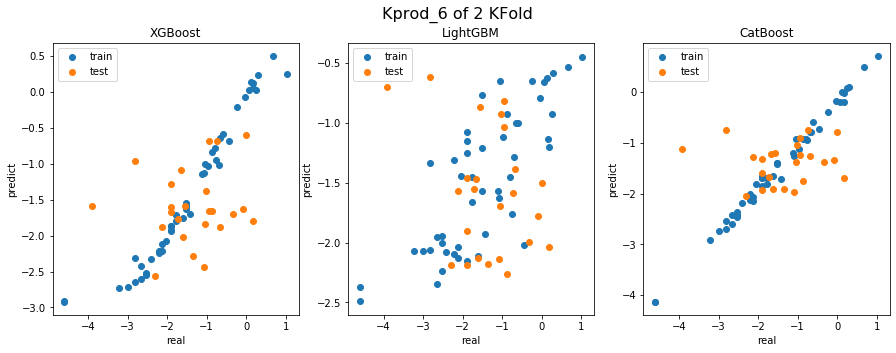


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 62, 64, 65, 66, 68, 70, 71]
TEST: [4, 5, 7, 8, 9, 13, 14, 15, 18, 27, 29, 34, 38, 41, 42, 48, 49, 51, 60, 61, 63, 67, 69, 72]

100%|██████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.70s/trial, best loss: 1.0611608067217237]

XGB: {'colsample_bytree': 0.42662505517901367, 'gamma': 0.019096272634952845, 'learning_rate': 0.06622950696116622, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'reg_alpha': 4.746835476814145, 'reg_lambda': 0.7665626474118492, 'subsample': 0.9763315693834078}
LGBM: {'colsample_bytree': 0.3633809532114741, 'learning_rate': 0.12635936302631434, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 215, 'num_leaves': 87, 'reg_alpha': 3.7388512146870014, 'reg_lambda': 4.356879001566409, 'subsample': 0.9480113876997898}
CatBoost: {'colsample_bylevel'

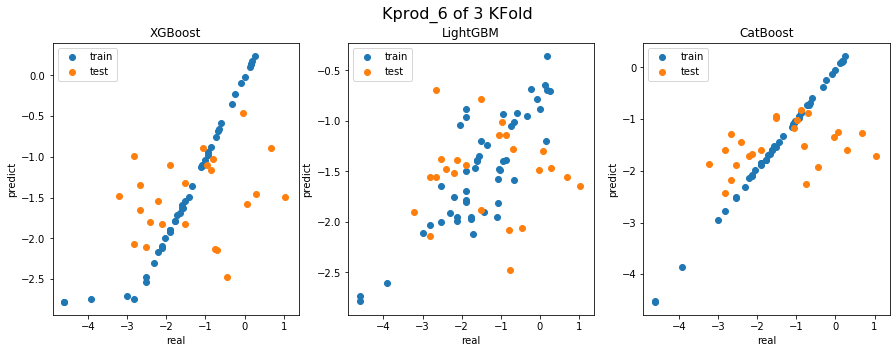

XGBRegressor
R2 TRAIN: [0.943, 0.901, 0.865]
R2 TEST: [0.175, -0.238, -0.018]

LGBMRegressor
R2 TRAIN: [0.421, 0.514, 0.588]
R2 TEST: [0.037, -0.747, -0.171]

CatBoostRegressor
R2 TRAIN: [1.0, 0.974, 0.999]
R2 TEST: [0.186, -0.14, 0.075]


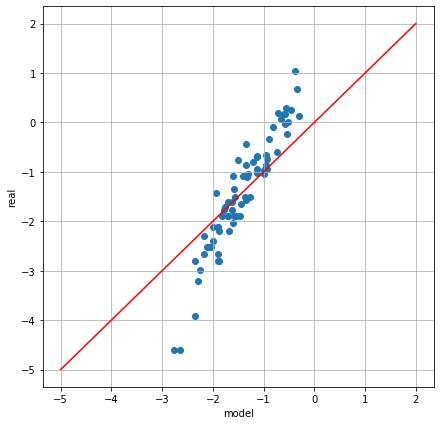

Kprod_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 34, 37, 38, 41, 42, 46, 47, 48, 49, 50, 51, 53, 54, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72]
TEST: [1, 3, 11, 12, 16, 19, 23, 24, 25, 30, 32, 33, 35, 36, 39, 40, 43, 44, 45, 52, 55, 57, 58, 68, 71]

100%|██████████████████████████████████████████████████| 3/3 [00:17<00:00,  5.84s/trial, best loss: 1.0643861009919062]

XGB: {'colsample_bytree': 0.6878674312599427, 'gamma': 0.01397416405313603, 'learning_rate': 0.125102955903599, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 110, 'reg_alpha': 4.913212381111823, 'reg_lambda': 1.3535927751645571, 'subsample': 0.8979791069171397}
LGBM: {'colsample_bytree': 0.6306954105422936, 'learning_rate': 0.16476954738427319, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 211, 'num_leaves': 78, 'reg_alpha': 2.8282468571692125, 'reg_lambda': 1.7792140833662655, 'subsample': 0.8272555075529976}
CatBoost: {'colsample_by

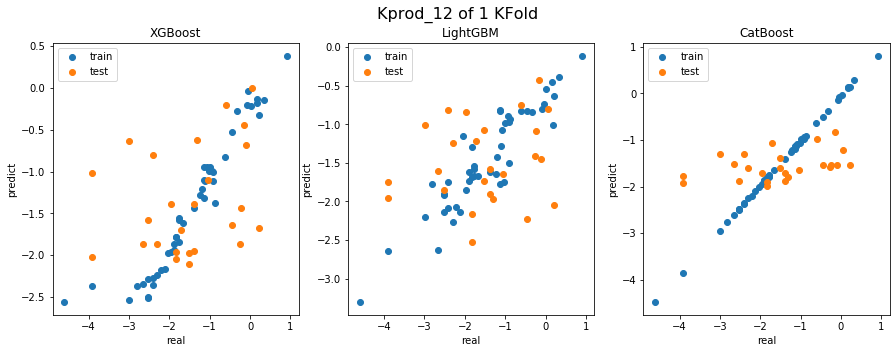


2 of KFold 3
TRAIN: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 23, 24, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 51, 52, 55, 57, 58, 60, 61, 63, 67, 68, 69, 71, 72]
TEST: [0, 2, 6, 10, 17, 20, 21, 22, 26, 28, 31, 37, 46, 47, 50, 53, 54, 56, 59, 62, 64, 65, 66, 70]

100%|████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.09trial/s, best loss: 1.1246559383338097]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|███████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.67s/trial, best loss: 1.084069320811538]

XGB: {'colsample_bytree': 0.48164377930080704, 'gamma': 0.0011489366493874277, 'learning_rate': 0.19417150326299043, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 197, 'reg_alpha': 1.293882644034804

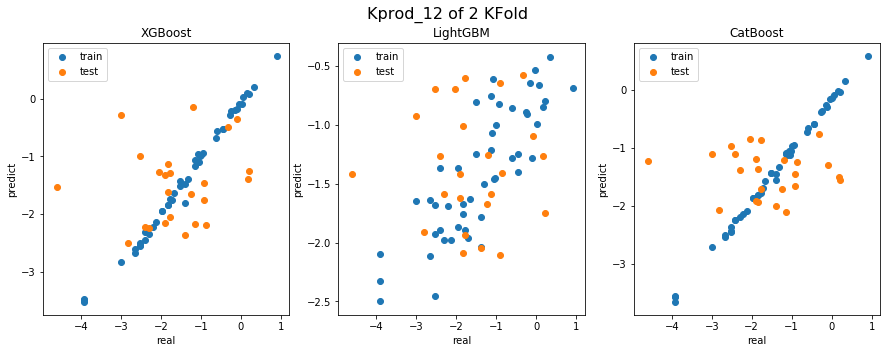


3 of KFold 3
TRAIN: [0, 1, 2, 3, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 62, 64, 65, 66, 68, 70, 71]
TEST: [4, 5, 7, 8, 9, 13, 14, 15, 18, 27, 29, 34, 38, 41, 42, 48, 49, 51, 60, 61, 63, 67, 69, 72]

100%|██████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.34s/trial, best loss: 1.0034054897705247]

XGB: {'colsample_bytree': 0.7135584236143031, 'gamma': 0.03243982812791549, 'learning_rate': 0.16263367795295633, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 131, 'reg_alpha': 1.1491368814677143, 'reg_lambda': 0.5635083474875996, 'subsample': 0.8982852431501577}
LGBM: {'colsample_bytree': 0.32886828467848006, 'learning_rate': 0.17507055055824144, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 245, 'num_leaves': 55, 'reg_alpha': 3.8982604721922707, 'reg_lambda': 0.3571780936803043, 'subsample': 0.8721833326569777}
CatBoost: {'colsample_bylevel

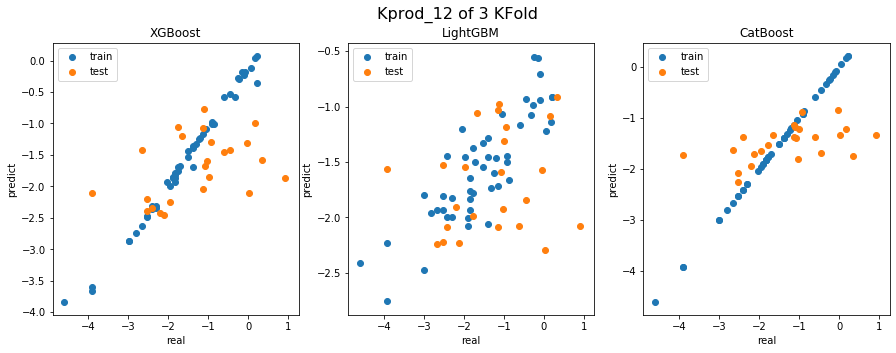

XGBRegressor
R2 TRAIN: [0.849, 0.986, 0.975]
R2 TEST: [-0.017, -0.167, 0.034]

LGBMRegressor
R2 TRAIN: [0.737, 0.562, 0.553]
R2 TEST: [-0.045, -0.253, -0.125]

CatBoostRegressor
R2 TRAIN: [0.998, 0.982, 1.0]
R2 TEST: [0.131, -0.227, 0.183]


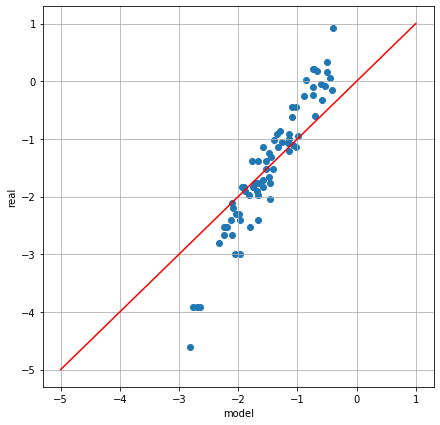

Время выполнения 20 мин


In [59]:
start_time = time.time()
for column in parameters_df_2.columns[1:]:
    calc_cv_pred(column, parameters_df_2, dataframe_3)
print('Время выполнения {} мин'.format(round((time.time() - start_time) / 60)))

qoil_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.89s/trial, best loss: 0.5562052635018313]

XGB: {'colsample_bytree': 0.7354766857657455, 'gamma': 0.007986186769343496, 'learning_rate': 0.10699213369122915, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 217, 'reg_alpha': 4.372510635278749, 'reg_lambda': 1.4697016644731757, 'subsample': 0.8203338714077562}
LGBM: {'colsample_bytree': 0.6501671112191352, 'learning_rate': 0.17719290656791264, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 149, 'num_leaves': 43, 'reg_alpha': 1.424634835772883, 'reg_lambda': 1.5319768238755782, 'subs

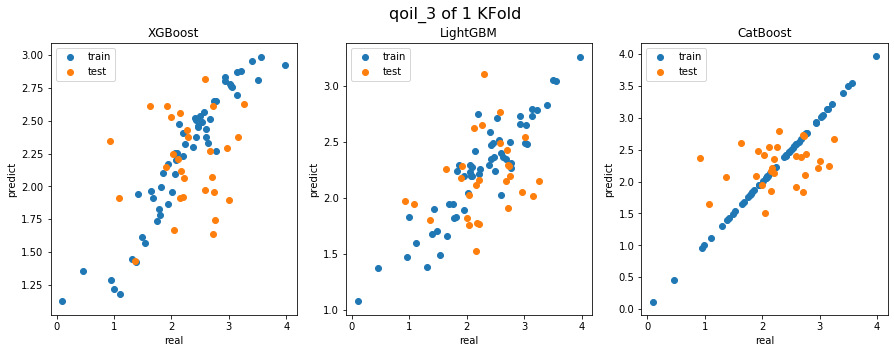


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:34<00:00, 11.35s/trial, best loss: 0.5712455938457897]

XGB: {'colsample_bytree': 0.3945778338014072, 'gamma': 0.03628862447885983, 'learning_rate': 0.1831133386875145, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 152, 'reg_alpha': 4.5531412288149635, 'reg_lambda': 1.962192601684719, 'subsample': 0.8053005041829252}
LGBM: {'colsample_bytree': 0.5505991223662454, 'learning_rate': 0.13765372398803766, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 115, 'num_leaves': 19, 'reg_alpha': 2.3342793587613606, 'reg_lambda': 0.06007549265766132, 'subsample':

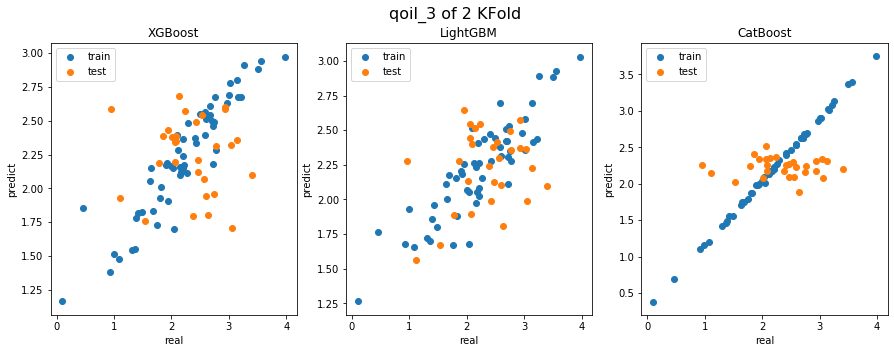


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|██████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.43s/trial, best loss: 0.8692893592163418]

XGB: {'colsample_bytree': 0.35704984364401154, 'gamma': 0.04236123304822161, 'learning_rate': 0.051914833149696686, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 223, 'reg_alpha': 1.493923698620439, 'reg_lambda': 4.429932760655923, 'subsample': 0.8309637127794253}
LGBM: {'colsample_bytree': 0.6064699925260739, 'learning_rate': 0.19773407858158, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 137, 'num_leaves': 27, 'reg_alpha': 1.741325341287936, 'reg_lambda': 4.070881665386349, 'subsample': 0.8

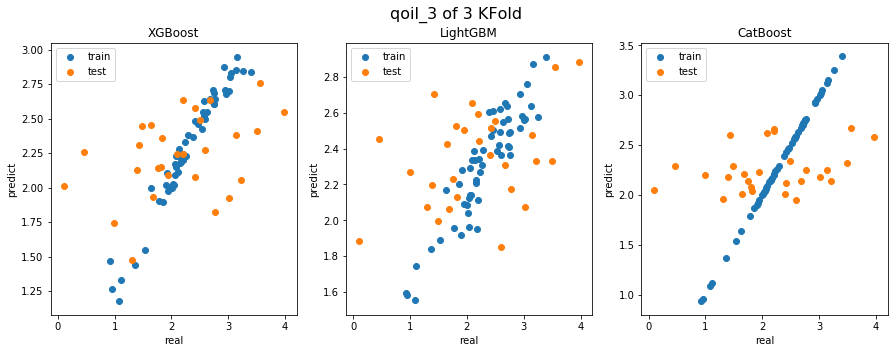

XGBRegressor
R2 TRAIN: [0.813, 0.724, 0.903]
R2 TEST: [-0.266, -0.336, 0.147]

LGBMRegressor
R2 TRAIN: [0.746, 0.608, 0.708]
R2 TEST: [-0.081, -0.02, 0.093]

CatBoostRegressor
R2 TRAIN: [1.0, 0.982, 1.0]
R2 TEST: [-0.021, -0.116, 0.067]


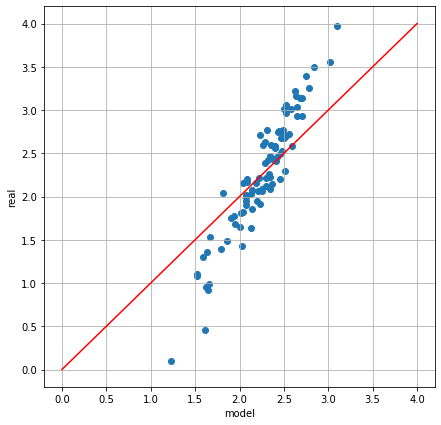

qoil_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.39s/trial, best loss: 0.5459631040637374]

XGB: {'colsample_bytree': 0.5715827615613286, 'gamma': 0.03975507273181015, 'learning_rate': 0.08478007819161731, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 184, 'reg_alpha': 2.813098984498689, 'reg_lambda': 0.4859661980231883, 'subsample': 0.9741990936850482}
LGBM: {'colsample_bytree': 0.31792093104133284, 'learning_rate': 0.19475510127486284, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 177, 'num_leaves': 81, 'reg_alpha': 1.5962557904678971, 'reg_lambda': 3.336566551525066, 'subs

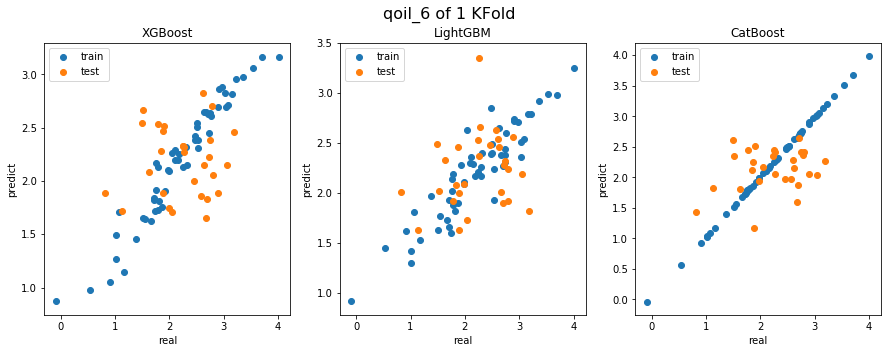


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:21<00:00,  7.04s/trial, best loss: 0.5360075683799199]

XGB: {'colsample_bytree': 0.42843588791538545, 'gamma': 0.013353622442681706, 'learning_rate': 0.07455352282916888, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 163, 'reg_alpha': 1.118136904005104, 'reg_lambda': 4.245784949606812, 'subsample': 0.9511214629934666}
LGBM: {'colsample_bytree': 0.3469799808250271, 'learning_rate': 0.13812758743979742, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 117, 'num_leaves': 40, 'reg_alpha': 2.924074783201384, 'reg_lambda': 1.9444585012907774, 'subsample':

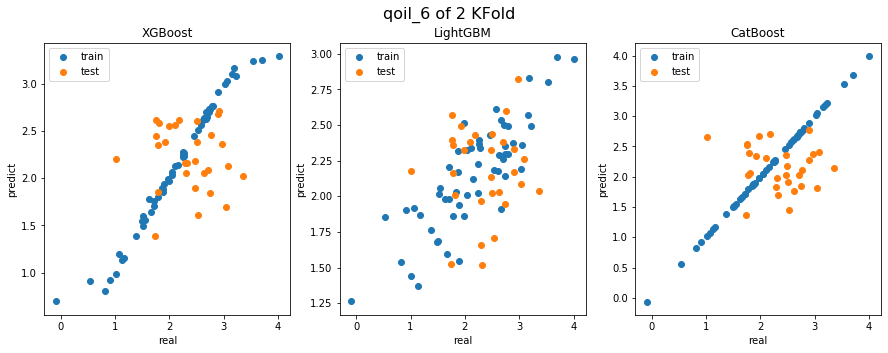


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.74trial/s, best loss: 0.8973082772688771]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:21<00:00,  7.03s/trial, best loss: 0.9661404490455365]

XGB: {'colsample_bytree': 0.5500585005719212, 'gamma': 0.010814856987905125, 'learning_rate': 0.053262510055798636, 'max_depth': 9, 'min_child_weight': 7, 

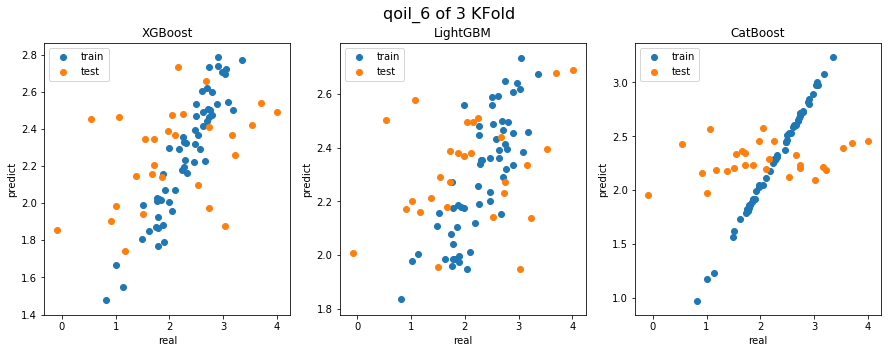

XGBRegressor
R2 TRAIN: [0.873, 0.954, 0.752]
R2 TEST: [-0.252, -0.602, 0.108]

LGBMRegressor
R2 TRAIN: [0.742, 0.571, 0.49]
R2 TEST: [-0.131, -0.412, 0.025]

CatBoostRegressor
R2 TRAIN: [1.0, 1.0, 0.987]
R2 TEST: [-0.085, -0.866, 0.007]


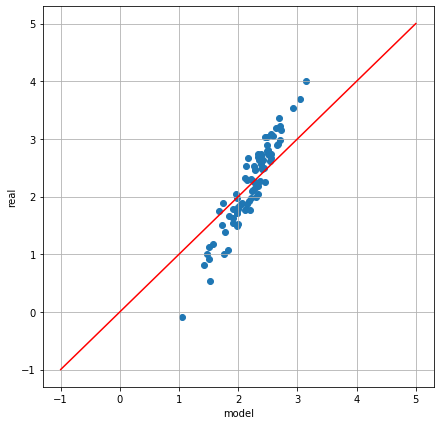

qoil_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.87s/trial, best loss: 0.5947413929770485]

XGB: {'colsample_bytree': 0.4934893661946756, 'gamma': 0.0071952799603919705, 'learning_rate': 0.0794609753176244, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 155, 'reg_alpha': 4.230777540603631, 'reg_lambda': 0.8785364089811759, 'subsample': 0.8789056817890002}
LGBM: {'colsample_bytree': 0.47013284044573844, 'learning_rate': 0.17327083875213903, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 103, 'num_leaves': 75, 'reg_alpha': 1.5458930462893448, 'reg_lambda': 2.8933247985711046, 's

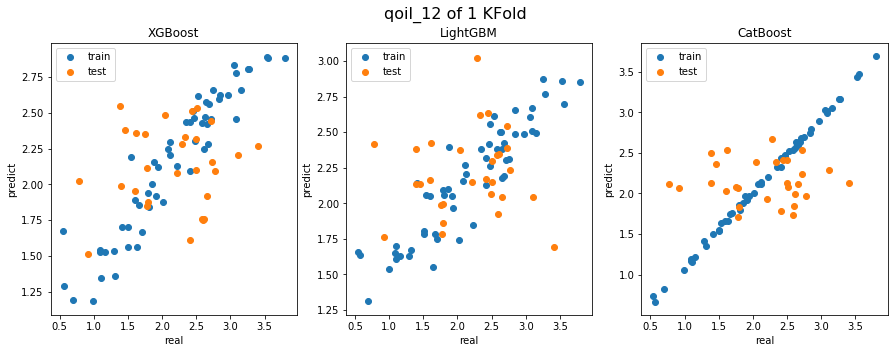


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.48s/trial, best loss: 0.5915611174203921]

XGB: {'colsample_bytree': 0.5226963913192046, 'gamma': 0.03658391472771732, 'learning_rate': 0.17512359586471354, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 228, 'reg_alpha': 3.9553006293023603, 'reg_lambda': 3.8194469155389363, 'subsample': 0.8066277182194221}
LGBM: {'colsample_bytree': 0.3240754542686053, 'learning_rate': 0.17266297505118444, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 124, 'num_leaves': 29, 'reg_alpha': 3.324822314841045, 'reg_lambda': 2.6595181282228166, 'subsample':

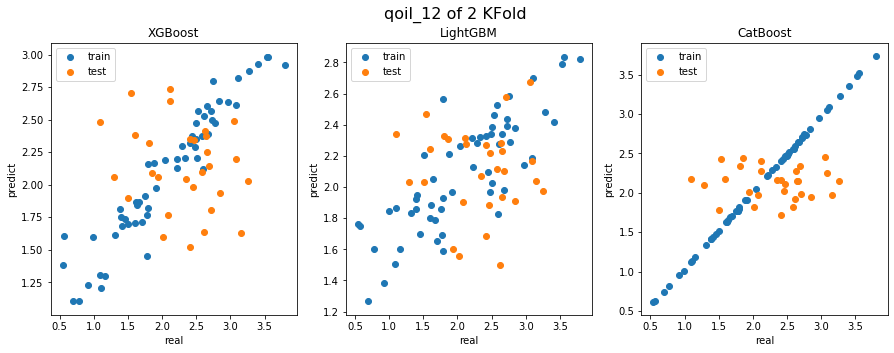


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.17trial/s, best loss: 0.8526266967103934]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.23s/trial, best loss: 0.9336408583671373]

XGB: {'colsample_bytree': 0.47716728454355695, 'gamma': 0.014436305333929606, 'learning_rate': 0.14406464786714168, 'max_depth': 6, 'min_child_weight': 6, 

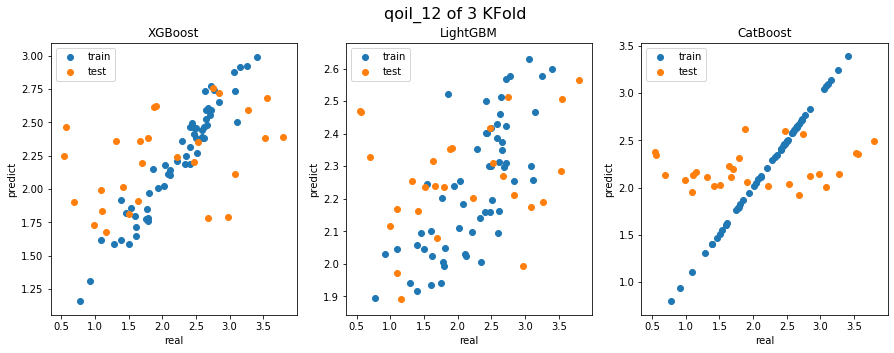

XGBRegressor
R2 TRAIN: [0.786, 0.815, 0.863]
R2 TEST: [-0.101, -0.714, 0.123]

LGBMRegressor
R2 TRAIN: [0.668, 0.545, 0.391]
R2 TEST: [-0.176, -0.438, -0.014]

CatBoostRegressor
R2 TRAIN: [0.992, 0.999, 1.0]
R2 TEST: [-0.182, -0.28, 0.007]


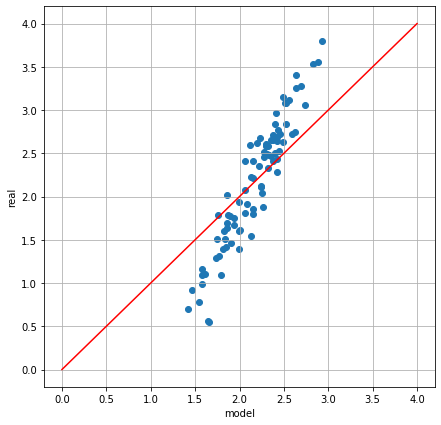

qliq_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.11s/trial, best loss: 0.5270477542031332]

XGB: {'colsample_bytree': 0.3666079608149774, 'gamma': 0.0033010053226713134, 'learning_rate': 0.06482660318247696, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 176, 'reg_alpha': 4.865031291285925, 'reg_lambda': 1.2642760639370638, 'subsample': 0.8594841217851514}
LGBM: {'colsample_bytree': 0.32263281532403754, 'learning_rate': 0.07131588407089123, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 218, 'num_leaves': 96, 'reg_alpha': 3.148830861065647, 'reg_lambda': 1.597485114842202, 'sub

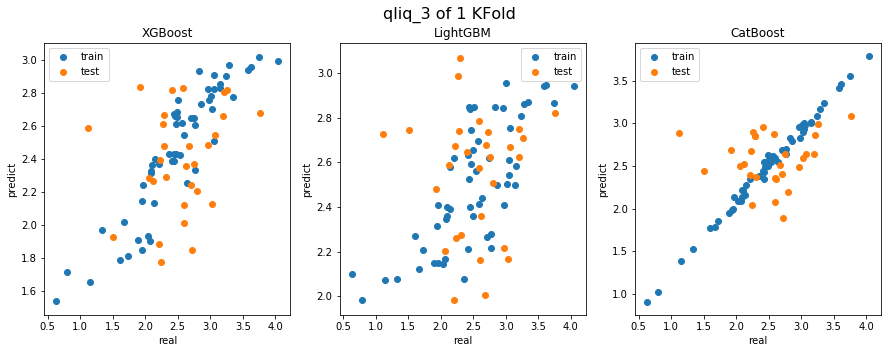


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.64s/trial, best loss: 0.4942857444427823]

XGB: {'colsample_bytree': 0.6925062138429906, 'gamma': 0.012557916144406794, 'learning_rate': 0.06542813132698408, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 176, 'reg_alpha': 1.287392607038603, 'reg_lambda': 0.8073609623568279, 'subsample': 0.8419113709887139}
LGBM: {'colsample_bytree': 0.40052630457333255, 'learning_rate': 0.10433190564742484, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 132, 'num_leaves': 50, 'reg_alpha': 1.6014469638662279, 'reg_lambda': 2.2984393618714405, 'subsample

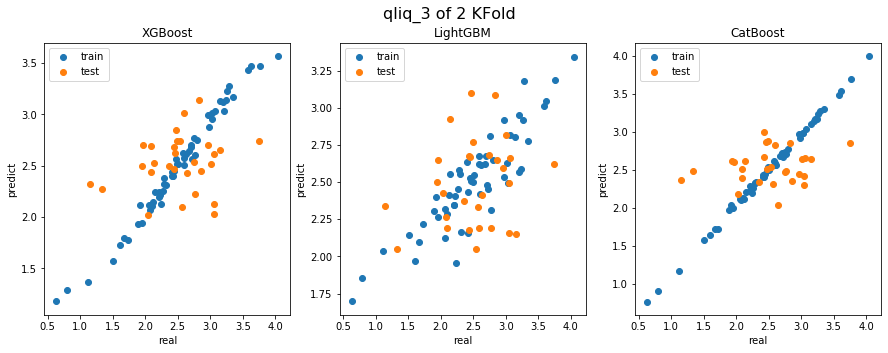


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|███████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.04s/trial, best loss: 0.781007604251503]

XGB: {'colsample_bytree': 0.3503604515934963, 'gamma': 0.018140133537318536, 'learning_rate': 0.06981028389022846, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 160, 'reg_alpha': 2.830823065567543, 'reg_lambda': 0.5412913294518984, 'subsample': 0.8438528894091498}
LGBM: {'colsample_bytree': 0.772896319860823, 'learning_rate': 0.19873026086947876, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 144, 'num_leaves': 20, 'reg_alpha': 1.0181880937266055, 'reg_lambda': 1.1080425000964178, 'subsample':

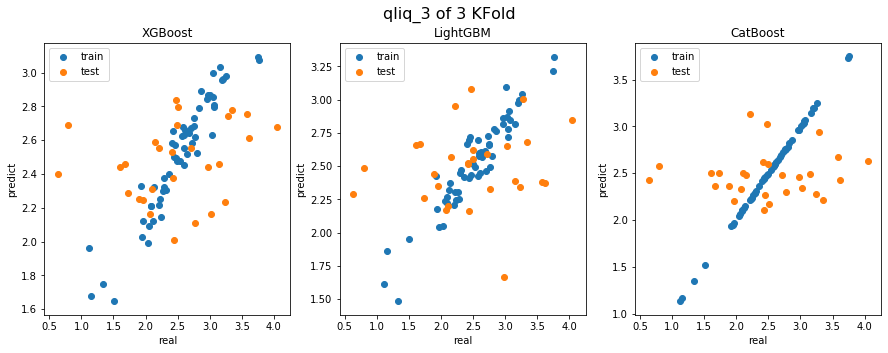

XGBRegressor
R2 TRAIN: [0.711, 0.95, 0.803]
R2 TEST: [-0.147, -0.068, 0.051]

LGBMRegressor
R2 TRAIN: [0.454, 0.631, 0.814]
R2 TEST: [-0.257, -0.067, -0.039]

CatBoostRegressor
R2 TRAIN: [0.968, 0.994, 1.0]
R2 TEST: [-0.185, -0.01, -0.054]


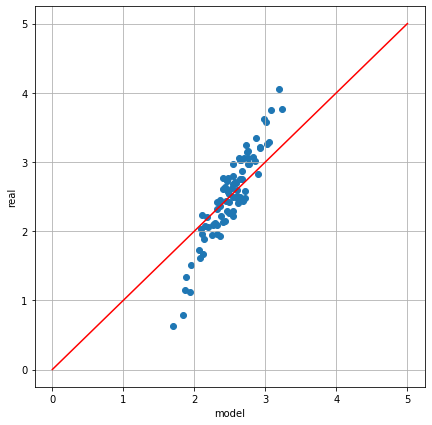

qliq_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|█████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.13s/trial, best loss: 0.48647875782831435]

XGB: {'colsample_bytree': 0.3149538954862459, 'gamma': 0.02210066552142952, 'learning_rate': 0.051006182626658125, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'reg_alpha': 4.844608065287096, 'reg_lambda': 2.944900771359709, 'subsample': 0.8264851558489325}
LGBM: {'colsample_bytree': 0.4430405735709044, 'learning_rate': 0.16921491423675994, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 146, 'num_leaves': 13, 'reg_alpha': 3.640074845787936, 'reg_lambda': 4.95357068430817, 'subsamp

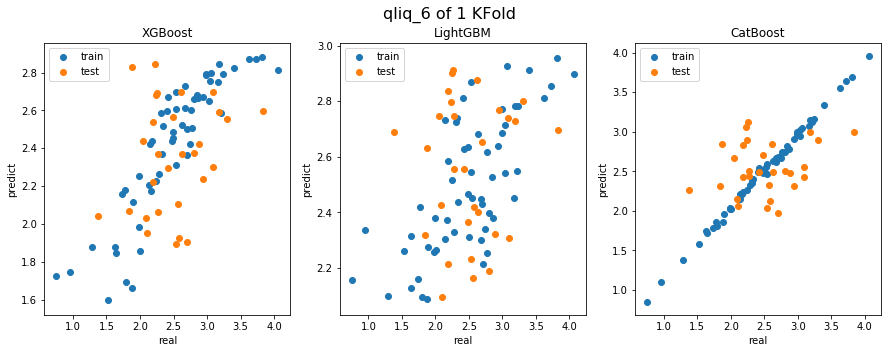


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|█████████████████████████████████████████████████| 3/3 [00:18<00:00,  6.05s/trial, best loss: 0.46707834539222537]

XGB: {'colsample_bytree': 0.41385493464729245, 'gamma': 0.02506450188754717, 'learning_rate': 0.1318980036392789, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 164, 'reg_alpha': 4.129222826374482, 'reg_lambda': 0.019161404806544713, 'subsample': 0.8626214126180489}
LGBM: {'colsample_bytree': 0.5686703367925459, 'learning_rate': 0.1627616356930402, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 146, 'num_leaves': 39, 'reg_alpha': 1.0908856011547656, 'reg_lambda': 3.7237138256564744, 'subsample'

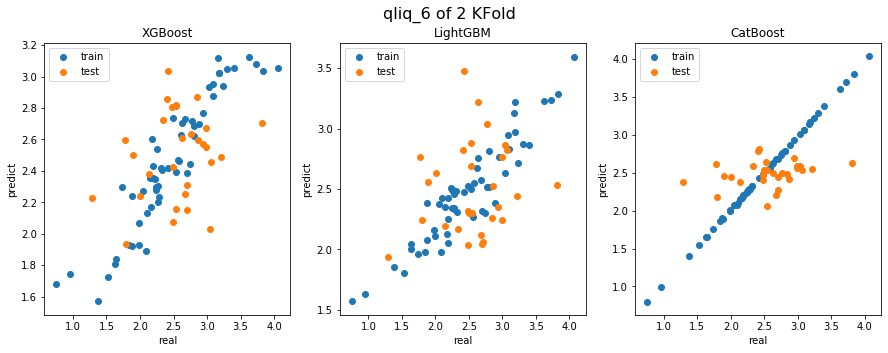


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.62trial/s, best loss: 0.7678623160879545]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.04s/trial, best loss: 0.7741234055841384]

XGB: {'colsample_bytree': 0.5554987111260054, 'gamma': 0.04032446189366896, 'learning_rate': 0.11948251898071577, 'max_depth': 5, 'min_child_weight': 7, 'n

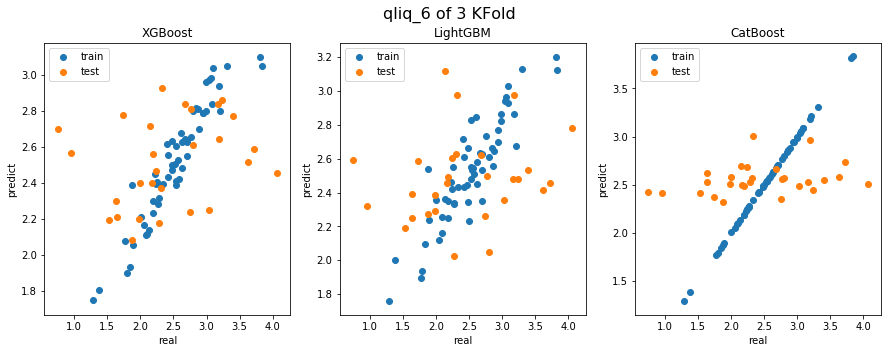

XGBRegressor
R2 TRAIN: [0.647, 0.77, 0.804]
R2 TEST: [-0.164, -0.074, 0.051]

LGBMRegressor
R2 TRAIN: [0.385, 0.776, 0.722]
R2 TEST: [-0.201, -0.333, 0.015]

CatBoostRegressor
R2 TRAIN: [0.991, 0.999, 1.0]
R2 TEST: [-0.142, 0.047, 0.055]


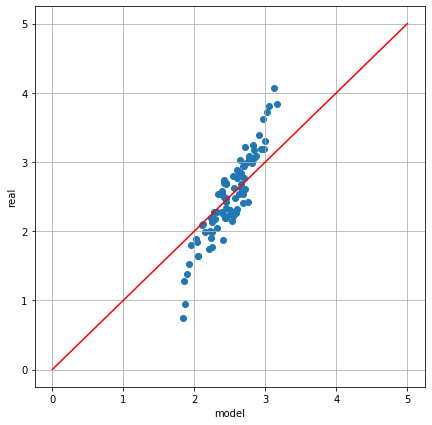

qliq_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.33s/trial, best loss: 0.5308558628347695]

XGB: {'colsample_bytree': 0.7839355237951144, 'gamma': 0.02233073694104895, 'learning_rate': 0.15435667620769278, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 123, 'reg_alpha': 4.154270328265217, 'reg_lambda': 0.14188476467044797, 'subsample': 0.8233475295178738}
LGBM: {'colsample_bytree': 0.5355856615843991, 'learning_rate': 0.10018612230815971, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 180, 'num_leaves': 69, 'reg_alpha': 1.4423111245935063, 'reg_lambda': 3.4350631628692474, 'su

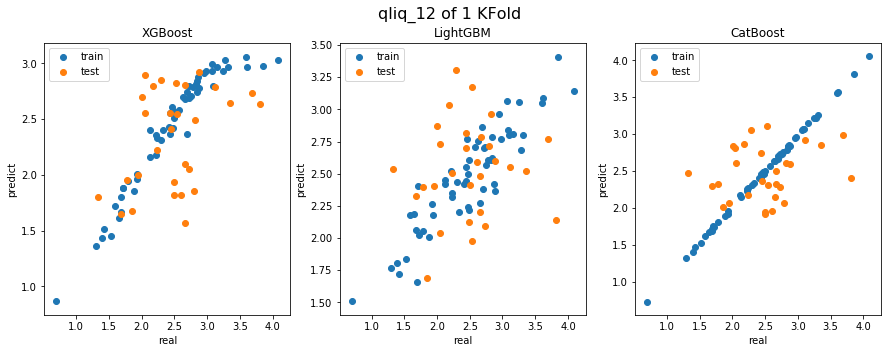


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.25s/trial, best loss: 0.5090773240905508]

XGB: {'colsample_bytree': 0.5973654678072046, 'gamma': 0.047328863787216846, 'learning_rate': 0.12400070390589804, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 164, 'reg_alpha': 4.470242779779035, 'reg_lambda': 2.2163947474291574, 'subsample': 0.9712712179156818}
LGBM: {'colsample_bytree': 0.3094575322411783, 'learning_rate': 0.18528255849067987, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 159, 'num_leaves': 64, 'reg_alpha': 2.562676145322713, 'reg_lambda': 1.4203264416363925, 'subsample':

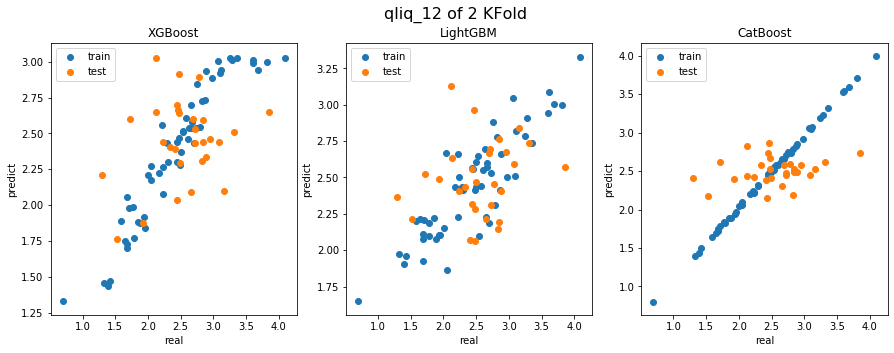


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|██████████████████████████████████████████████████| 3/3 [00:18<00:00,  6.16s/trial, best loss: 0.7902481689751736]

XGB: {'colsample_bytree': 0.33106589017333327, 'gamma': 0.039354492043797366, 'learning_rate': 0.1934176039615466, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 242, 'reg_alpha': 1.7038268825152567, 'reg_lambda': 4.149504998211826, 'subsample': 0.8042933992929118}
LGBM: {'colsample_bytree': 0.699730611970611, 'learning_rate': 0.1508066002075274, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 219, 'num_leaves': 21, 'reg_alpha': 1.6420783536349814, 'reg_lambda': 1.9721323093961785, 'subsample': 

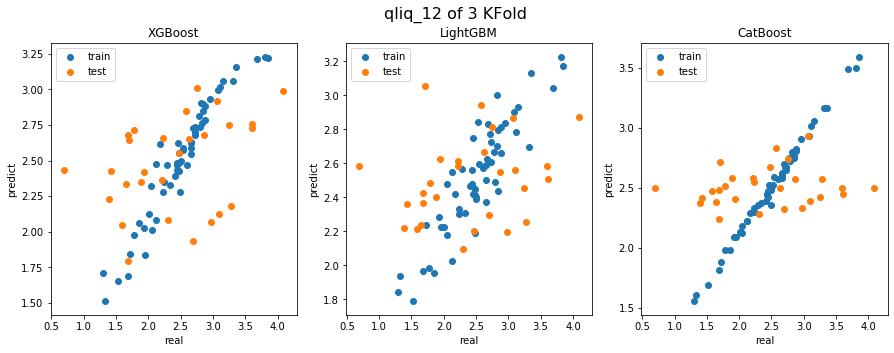

XGBRegressor
R2 TRAIN: [0.863, 0.819, 0.878]
R2 TEST: [-0.105, -0.074, 0.114]

LGBMRegressor
R2 TRAIN: [0.727, 0.639, 0.724]
R2 TEST: [-0.355, -0.078, 0.027]

CatBoostRegressor
R2 TRAIN: [0.998, 0.995, 0.953]
R2 TEST: [-0.151, 0.044, 0.002]


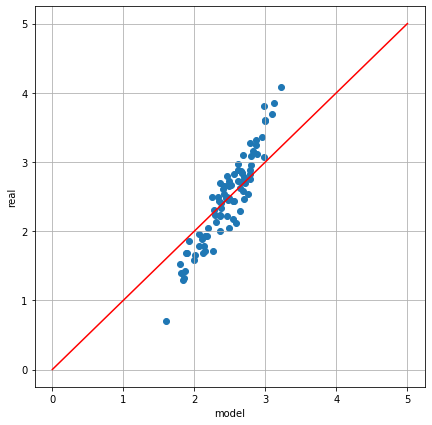

Qoil_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.73s/trial, best loss: 0.6539480772472963]

XGB: {'colsample_bytree': 0.648840787001128, 'gamma': 0.02865892176759248, 'learning_rate': 0.19261510825777212, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 190, 'reg_alpha': 3.4804380872688965, 'reg_lambda': 0.49376536537156346, 'subsample': 0.988870896002739}
LGBM: {'colsample_bytree': 0.4404504226896893, 'learning_rate': 0.1822308933703346, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 186, 'num_leaves': 40, 'reg_alpha': 4.508324839759416, 'reg_lambda': 4.000914459507691, 'subsamp

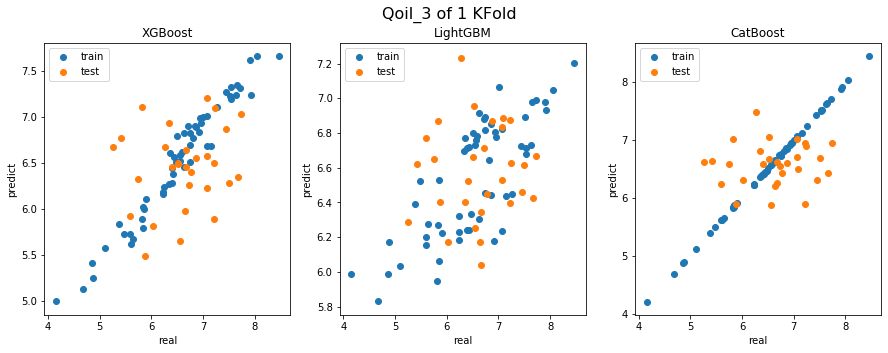


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.93s/trial, best loss: 0.6861141571237093]

XGB: {'colsample_bytree': 0.775590357876377, 'gamma': 0.04780604231581459, 'learning_rate': 0.14544506595390805, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 178, 'reg_alpha': 1.1833710933109827, 'reg_lambda': 4.113777845118984, 'subsample': 0.9195659022512992}
LGBM: {'colsample_bytree': 0.5395269023173828, 'learning_rate': 0.14858100473345348, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 103, 'num_leaves': 98, 'reg_alpha': 2.165550786422592, 'reg_lambda': 4.420426646523801, 'subsample': 0.

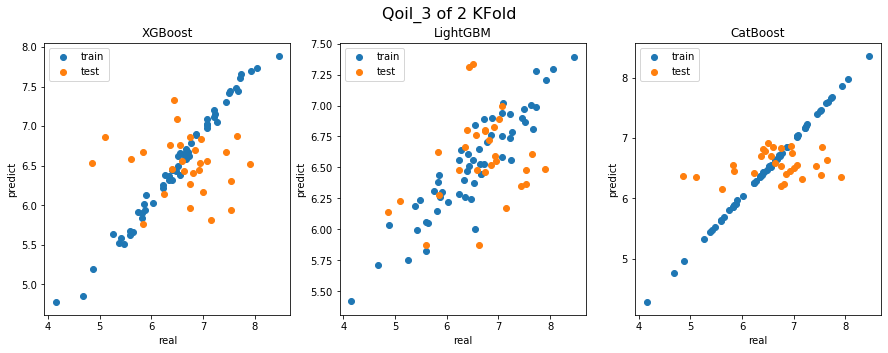


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.23trial/s, best loss: 0.9727729918305592]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  2.00s/trial, best loss: 1.0215306832993378]

XGB: {'colsample_bytree': 0.7794213657361141, 'gamma': 0.019890375530039184, 'learning_rate': 0.19764975968456078, 'max_depth': 7, 'min_child_weight': 3, '

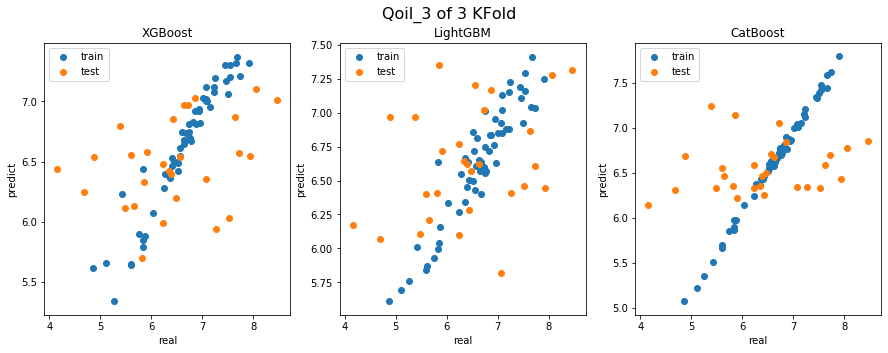

XGBRegressor
R2 TRAIN: [0.893, 0.962, 0.871]
R2 TEST: [-0.252, -0.445, 0.108]

LGBMRegressor
R2 TRAIN: [0.442, 0.647, 0.782]
R2 TEST: [-0.128, -0.028, 0.062]

CatBoostRegressor
R2 TRAIN: [1.0, 0.997, 0.986]
R2 TEST: [-0.242, -0.007, 0.012]


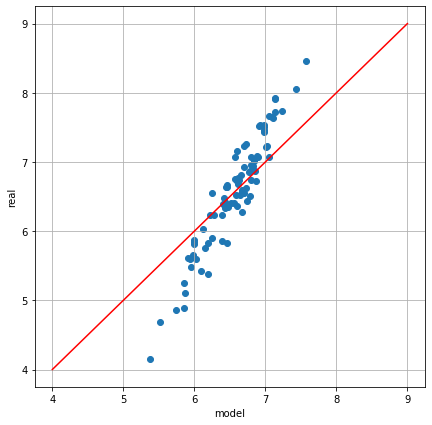

Qoil_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.46s/trial, best loss: 0.6296448333818311]

XGB: {'colsample_bytree': 0.5530950711317485, 'gamma': 0.020318374525783237, 'learning_rate': 0.08797022029093798, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 155, 'reg_alpha': 2.4245674345572255, 'reg_lambda': 1.8026978975104413, 'subsample': 0.8397428528536344}
LGBM: {'colsample_bytree': 0.708803625469392, 'learning_rate': 0.18827850474916497, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 177, 'num_leaves': 30, 'reg_alpha': 3.419368551521183, 'reg_lambda': 2.0473499269055786, 'subs

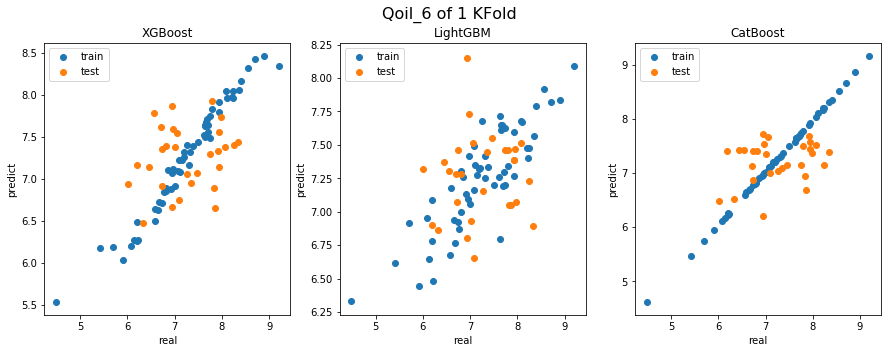


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.72s/trial, best loss: 0.6584266780538645]

XGB: {'colsample_bytree': 0.7103160074412115, 'gamma': 0.03961100539453425, 'learning_rate': 0.09552925186348507, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 183, 'reg_alpha': 3.918778754004105, 'reg_lambda': 3.771934291253949, 'subsample': 0.9787772510092674}
LGBM: {'colsample_bytree': 0.5013238236080292, 'learning_rate': 0.1281687725991221, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 246, 'num_leaves': 77, 'reg_alpha': 1.5540745716261948, 'reg_lambda': 0.1733929709586879, 'subsample': 0

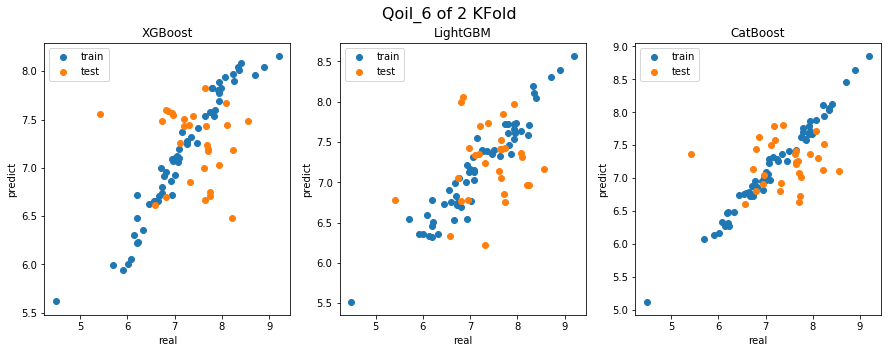


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|███████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.12s/trial, best loss: 1.083959887177149]

XGB: {'colsample_bytree': 0.5678792245007735, 'gamma': 0.022658490150196827, 'learning_rate': 0.14869654341598465, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 216, 'reg_alpha': 2.9353594424349128, 'reg_lambda': 0.6232722359659842, 'subsample': 0.8417745423483456}
LGBM: {'colsample_bytree': 0.4735042734853718, 'learning_rate': 0.1900760995709193, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 114, 'num_leaves': 97, 'reg_alpha': 1.2676793095125838, 'reg_lambda': 1.7933864798130545, 'subsample'

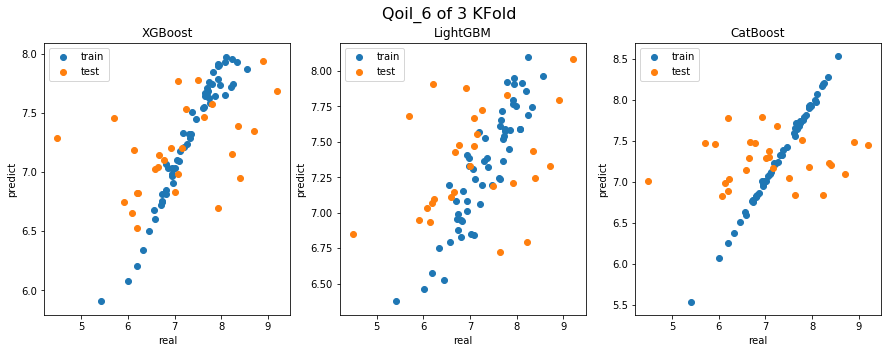

XGBRegressor
R2 TRAIN: [0.914, 0.879, 0.914]
R2 TEST: [-0.094, -0.628, 0.175]

LGBMRegressor
R2 TRAIN: [0.558, 0.844, 0.754]
R2 TEST: [-0.164, -0.376, 0.052]

CatBoostRegressor
R2 TRAIN: [0.998, 0.946, 0.995]
R2 TEST: [-0.024, -0.309, -0.058]


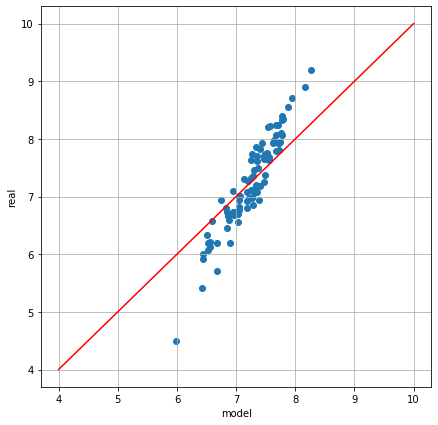

Qoil_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.23trial/s, best loss: 0.6977913668778939]
[LightGBM] [Warning]                                                                                                   
Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves                                       
100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.83s/trial, best loss: 0.6709272241044321]

XGB: {'colsample_bytree': 0.6747809976778354, 'gamma': 0.04424551524020143, 'learning_rate': 0.060520676757387995, 'max_depth': 6, 'min_child_weigh

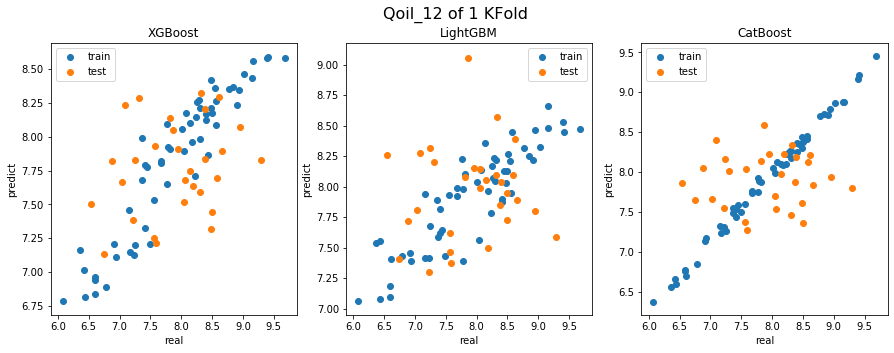


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.87s/trial, best loss: 0.6710412676534291]

XGB: {'colsample_bytree': 0.7511403299524071, 'gamma': 0.026785348020490343, 'learning_rate': 0.14528495580437567, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 116, 'reg_alpha': 4.736234041661703, 'reg_lambda': 0.7252699550307201, 'subsample': 0.8019228158676889}
LGBM: {'colsample_bytree': 0.43057246972232777, 'learning_rate': 0.1659840700065456, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 129, 'num_leaves': 73, 'reg_alpha': 1.7516697534237955, 'reg_lambda': 4.127995891775608, 'subsample':

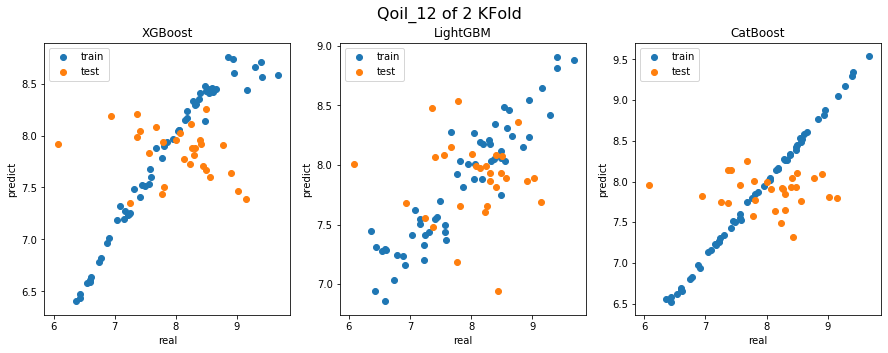


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|██████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.88s/trial, best loss: 1.0032233390378222]

XGB: {'colsample_bytree': 0.7024600820945908, 'gamma': 0.0013922258973240289, 'learning_rate': 0.08855281392123701, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 241, 'reg_alpha': 4.822928912666976, 'reg_lambda': 3.973302025721812, 'subsample': 0.9361847515568222}
LGBM: {'colsample_bytree': 0.3049369165529581, 'learning_rate': 0.15291838782910802, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 221, 'num_leaves': 41, 'reg_alpha': 3.1943571009369456, 'reg_lambda': 3.6144279611809567, 'subsample'

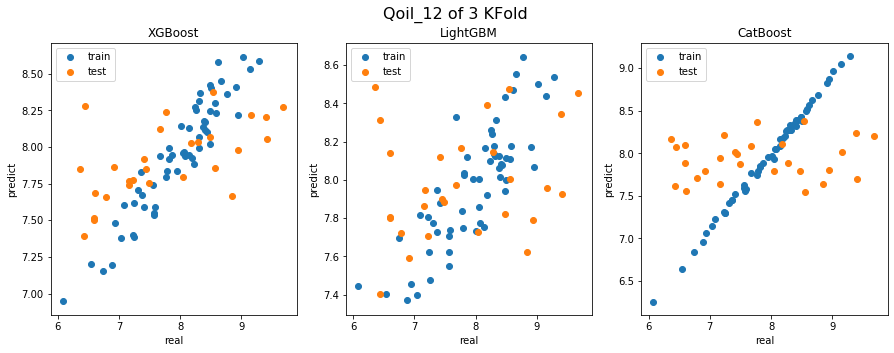

XGBRegressor
R2 TRAIN: [0.771, 0.906, 0.757]
R2 TEST: [-0.045, -0.484, 0.218]

LGBMRegressor
R2 TRAIN: [0.614, 0.744, 0.554]
R2 TEST: [-0.233, -0.37, 0.014]

CatBoostRegressor
R2 TRAIN: [0.973, 0.993, 0.988]
R2 TEST: [-0.207, -0.234, -0.029]


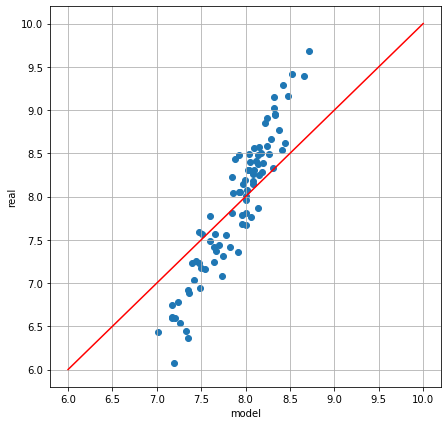

Qliq_3

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.50s/trial, best loss: 0.6489026450774064]

XGB: {'colsample_bytree': 0.3301394187147126, 'gamma': 0.016147560033027832, 'learning_rate': 0.08406672215814615, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 134, 'reg_alpha': 4.958832697027267, 'reg_lambda': 3.6122008659334215, 'subsample': 0.8141329005713416}
LGBM: {'colsample_bytree': 0.315185492906559, 'learning_rate': 0.18322470058178453, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 103, 'num_leaves': 88, 'reg_alpha': 4.068443661393807, 'reg_lambda': 4.690514326320829, 'subsam

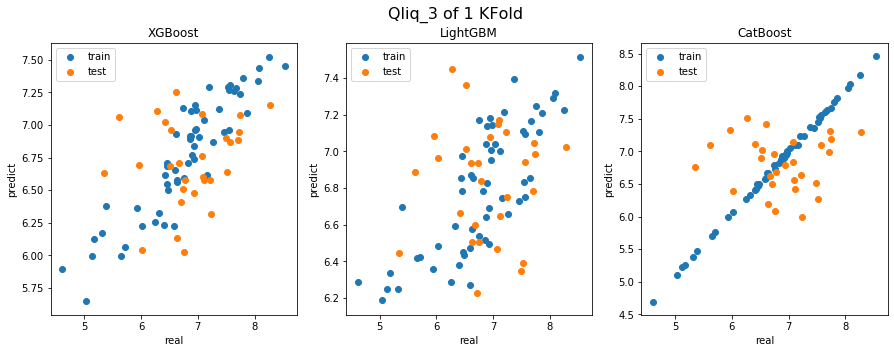


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.45s/trial, best loss: 0.5865723815206559]

XGB: {'colsample_bytree': 0.6515477054704002, 'gamma': 0.039014879463620214, 'learning_rate': 0.1771584775204879, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 204, 'reg_alpha': 1.8165203474576481, 'reg_lambda': 4.426242751548557, 'subsample': 0.8042086475258634}
LGBM: {'colsample_bytree': 0.31754874561236973, 'learning_rate': 0.12740590444757505, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 220, 'num_leaves': 89, 'reg_alpha': 2.7859407490848183, 'reg_lambda': 4.217967334236821, 'subsample':

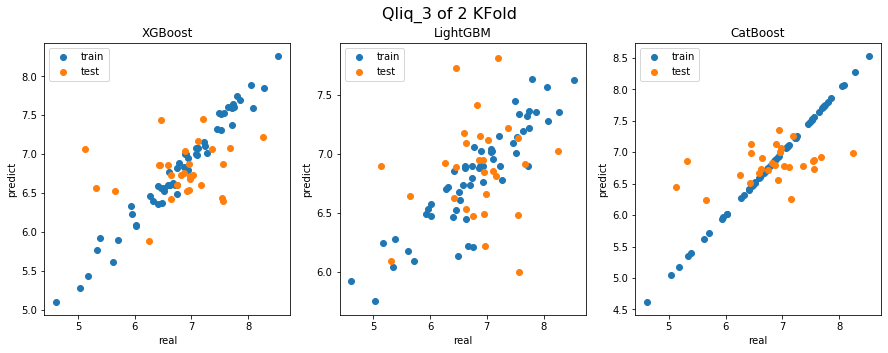


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|██████████████████████████████████████████████████| 3/3 [00:21<00:00,  7.07s/trial, best loss: 0.9706715426342662]

XGB: {'colsample_bytree': 0.7105714040627912, 'gamma': 0.040404607178594176, 'learning_rate': 0.1365465052500341, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 243, 'reg_alpha': 3.095364551334278, 'reg_lambda': 2.2205651943400913, 'subsample': 0.9713346428147427}
LGBM: {'colsample_bytree': 0.35787209598042996, 'learning_rate': 0.14082534977764521, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 249, 'num_leaves': 73, 'reg_alpha': 1.1375645801528131, 'reg_lambda': 1.0779011895711772, 'subsample'

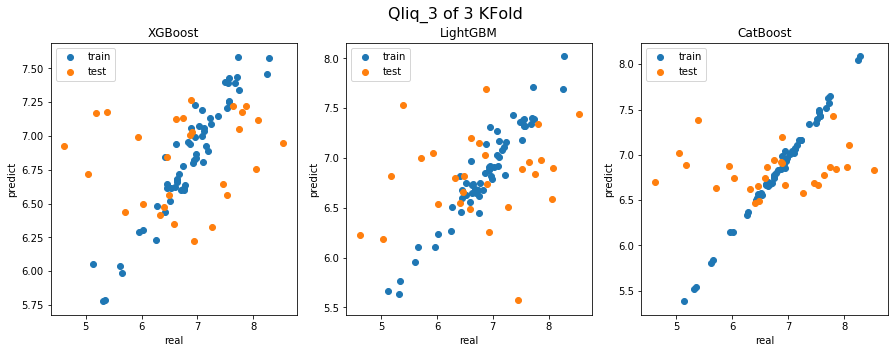

XGBRegressor
R2 TRAIN: [0.697, 0.942, 0.817]
R2 TEST: [-0.097, -0.058, -0.03]

LGBMRegressor
R2 TRAIN: [0.482, 0.669, 0.873]
R2 TEST: [-0.22, -0.23, -0.041]

CatBoostRegressor
R2 TRAIN: [0.997, 1.0, 0.975]
R2 TEST: [-0.401, 0.128, -0.032]


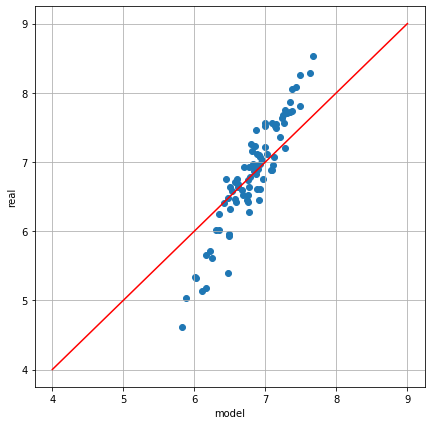

Qliq_6

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.55s/trial, best loss: 0.6085816358613321]

XGB: {'colsample_bytree': 0.6184274896434852, 'gamma': 0.0090452223791828, 'learning_rate': 0.05991887239419208, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 174, 'reg_alpha': 4.0731607707509685, 'reg_lambda': 2.7411754273937996, 'subsample': 0.8808459335118691}
LGBM: {'colsample_bytree': 0.7557055130159381, 'learning_rate': 0.15476776500045542, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 220, 'num_leaves': 94, 'reg_alpha': 2.4212143560370025, 'reg_lambda': 3.4307120206100765, 'subs

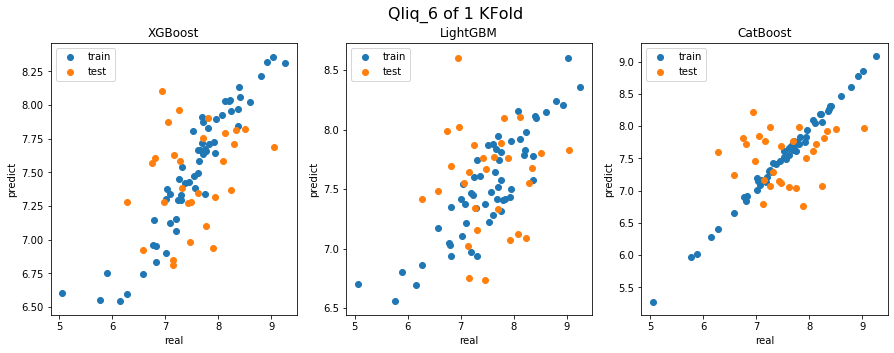


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:35<00:00, 11.69s/trial, best loss: 0.5382618380217773]

XGB: {'colsample_bytree': 0.4595995891358198, 'gamma': 0.03985593866208037, 'learning_rate': 0.08306411161034633, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 177, 'reg_alpha': 3.321661475121176, 'reg_lambda': 2.0876286241525333, 'subsample': 0.817119875822988}
LGBM: {'colsample_bytree': 0.44916056713288294, 'learning_rate': 0.18858550644633026, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 142, 'num_leaves': 44, 'reg_alpha': 2.1501704354206677, 'reg_lambda': 2.5497779293011624, 'subsample':

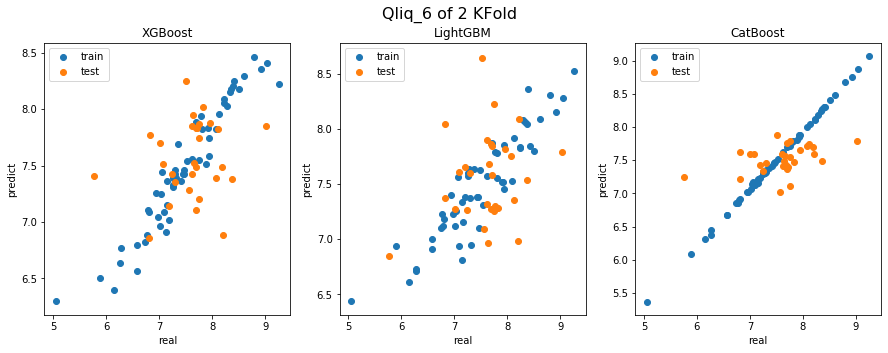


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|██████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.71s/trial, best loss: 0.9484268429867928]

XGB: {'colsample_bytree': 0.34201636492363763, 'gamma': 0.008803135269231505, 'learning_rate': 0.17319362215485523, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 128, 'reg_alpha': 4.3268031573477135, 'reg_lambda': 0.4083301575240428, 'subsample': 0.829404050366936}
LGBM: {'colsample_bytree': 0.4607061329946614, 'learning_rate': 0.16506761810318182, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 157, 'num_leaves': 12, 'reg_alpha': 1.6768170649134162, 'reg_lambda': 4.145833259439687, 'subsample'

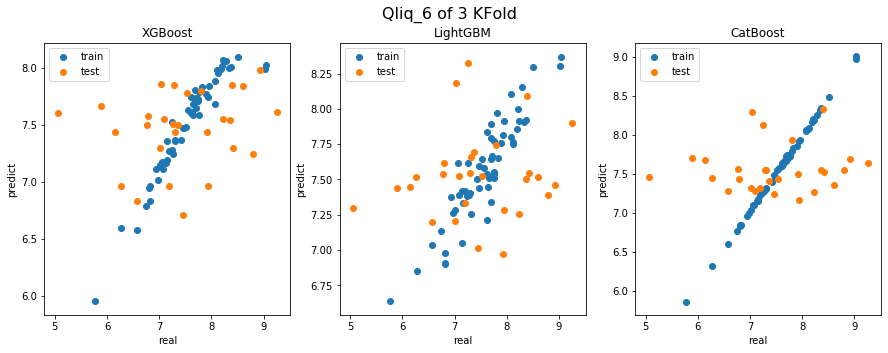

XGBRegressor
R2 TRAIN: [0.768, 0.838, 0.837]
R2 TEST: [-0.042, -0.139, 0.02]

LGBMRegressor
R2 TRAIN: [0.667, 0.713, 0.746]
R2 TEST: [-0.445, -0.168, -0.021]

CatBoostRegressor
R2 TRAIN: [0.984, 0.985, 0.998]
R2 TEST: [-0.236, 0.148, -0.055]


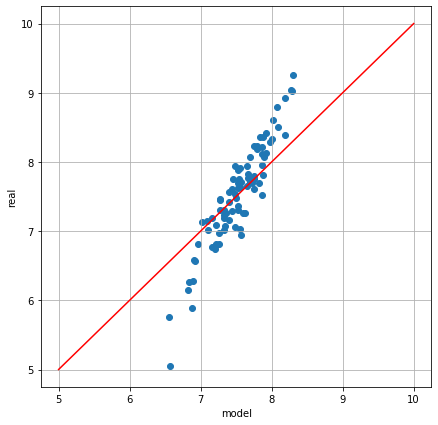

Qliq_12

1 of KFold 3
TRAIN: [0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 31, 37, 38, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 65, 67, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85]
TEST: [1, 3, 6, 12, 16, 19, 23, 24, 29, 30, 32, 33, 34, 35, 36, 39, 44, 45, 47, 57, 62, 64, 66, 68, 69, 70, 75, 79, 80]

100%|██████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.96s/trial, best loss: 0.5934278095882362]

XGB: {'colsample_bytree': 0.5657779338058622, 'gamma': 0.04547532361978735, 'learning_rate': 0.06856097309435319, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 249, 'reg_alpha': 4.877723874203662, 'reg_lambda': 3.642066176467505, 'subsample': 0.8104649001878869}
LGBM: {'colsample_bytree': 0.635528236305144, 'learning_rate': 0.10144853273564067, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 177, 'num_leaves': 90, 'reg_alpha': 1.8612939602296432, 'reg_lambda': 2.295003289186523, 'subsam

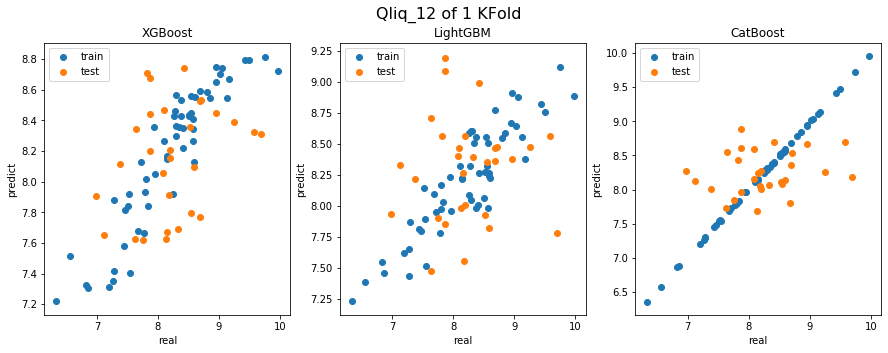


2 of KFold 3
TRAIN: [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 79, 80, 84]
TEST: [0, 4, 10, 11, 17, 20, 21, 22, 25, 28, 31, 37, 38, 40, 43, 46, 50, 52, 54, 55, 58, 72, 73, 76, 78, 81, 82, 83, 85]

100%|██████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.69s/trial, best loss: 0.5783658450562931]

XGB: {'colsample_bytree': 0.6456279331132974, 'gamma': 0.014152615748763593, 'learning_rate': 0.13018343673181534, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 109, 'reg_alpha': 4.636010321655132, 'reg_lambda': 1.3062300925006016, 'subsample': 0.8960857919452913}
LGBM: {'colsample_bytree': 0.3971196613886829, 'learning_rate': 0.1695769448786688, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 149, 'num_leaves': 77, 'reg_alpha': 1.187756815682758, 'reg_lambda': 1.1310902958200404, 'subsample': 

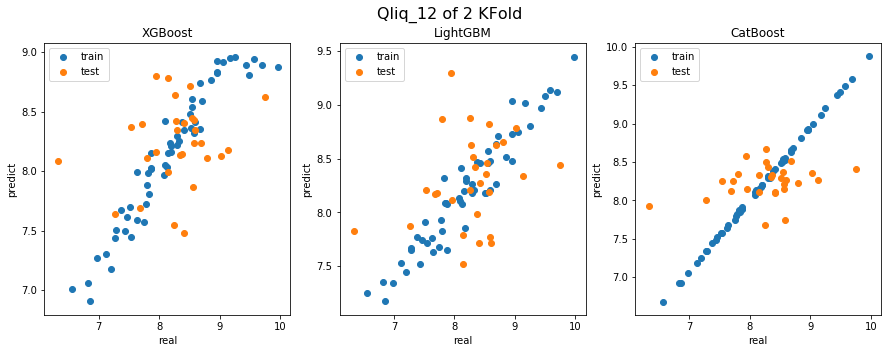


3 of KFold 3
TRAIN: [0, 1, 3, 4, 6, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58, 62, 64, 66, 68, 69, 70, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85]
TEST: [2, 5, 7, 8, 9, 13, 14, 15, 18, 26, 27, 41, 42, 48, 49, 51, 53, 56, 59, 60, 61, 63, 65, 67, 71, 74, 77, 84]

100%|██████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.64s/trial, best loss: 0.8493869246110333]

XGB: {'colsample_bytree': 0.5512205200439787, 'gamma': 0.012032072786512766, 'learning_rate': 0.06818793605076155, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 119, 'reg_alpha': 4.145194118884362, 'reg_lambda': 2.28606531220717, 'subsample': 0.827423496610975}
LGBM: {'colsample_bytree': 0.31818585641752123, 'learning_rate': 0.16797406953431343, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 119, 'num_leaves': 29, 'reg_alpha': 1.6193328970757017, 'reg_lambda': 2.5014309433865494, 'subsample': 

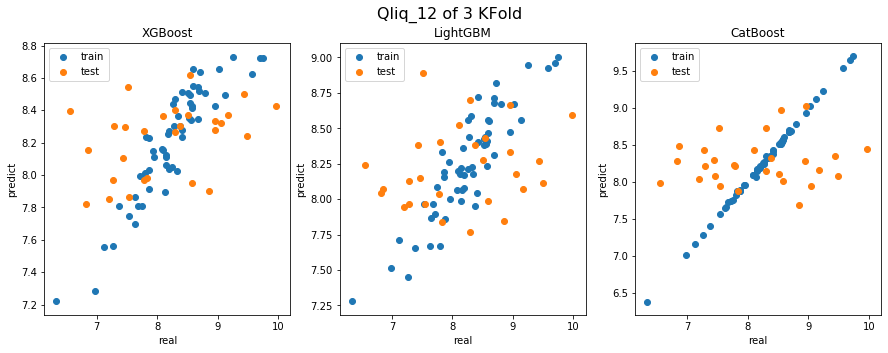

XGBRegressor
R2 TRAIN: [0.738, 0.864, 0.701]
R2 TEST: [0.008, -0.07, 0.122]

LGBMRegressor
R2 TRAIN: [0.693, 0.844, 0.73]
R2 TEST: [-0.382, -0.126, 0.018]

CatBoostRegressor
R2 TRAIN: [1.0, 0.996, 0.998]
R2 TEST: [-0.052, 0.069, -0.089]


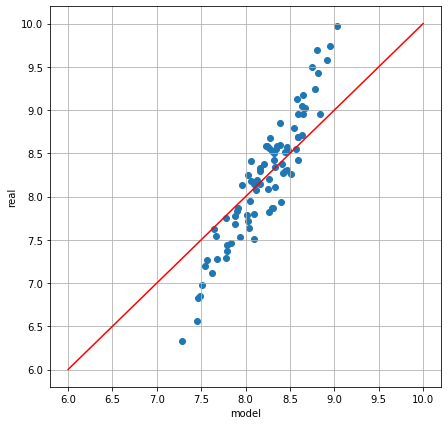

Время выполнения 19 мин


In [60]:
start_time = time.time()
for column in parameters_df.columns[1:]:
    calc_cv_pred(column, parameters_df, dataframe_3)
print('Время выполнения {} мин'.format(round((time.time() - start_time) / 60)))

### 5. Вероятностные карты <a name="step_5"></a>

Теперь приступим к созданию вероятностных карт таргетов. Для этого необходимо для каждой точки сгенерировать n-количество прогнозов. Логика решения следующая:

- обозначим кол-во итераций `random_count`
- для каждой итерации случайным образом обозначим обучающую и тестовую выборки в процентном соотношении 70 к 30
- для выборок подберем гиперпараметры и обучим модели. Для данного модуля оставили только `XGBRegressor`. В дальнейшем можно будет добавить и остальные модели
- предикт для всех точек сохраним в отдельный датафрейм
- для каждой точки найдем процентили выборки от 1 до 99
- построим для каждой процентили карту и сохраним результат

Упакуем все это в функцию `generate_fig`

In [70]:
def generate_fig(param, target_df, param_df, random_count = 100):
    
    x, y = calc_x_y(param, target_df, param_df)
    
    grid_predict = pd.DataFrame()
    
    r_c = 0
    
    while r_c != random_count:
        
        r = random.randint(1, 100000)
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=r)

        obj = HPOpt_1(x_train, x_test, y_train, y_test)

        xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)

        xgb_model = xgb.XGBRegressor(**xgb_opt)
        xgb_model.fit(x_train, y_train);

        grid_pred = xgb_model.predict(grid_x)
        grid_predict[f'{r}'] = grid_pred
        
        r_c += 1
        
    fig, axs = plt.subplots(2, 3, figsize = (14, 6))
    for x1 in range(2):
        for x2 in range(3):
            axs[x1, x2].hist(grid_predict.loc[random.randint(1, len(grid_predict))], bins = 15)
            axs[x1, x2].grid(which ='major');
            
    grid_predict_2 = pd.DataFrame()

    for r in range(1, 100):
        grid_predict_2[f'p_{r}'] = grid_predict.quantile(r/100, axis = 1)
        
    grid_predict_2.insert(0, 'y', grid_df['y'])
    grid_predict_2.insert(0, 'x', grid_df['x'])

    grid_predict_2['x'] = grid_predict_2['x'].round().astype(int)
    grid_predict_2['y'] = grid_predict_2['y'].round().astype(int)
    
    vmax = math.ceil(grid_predict_2[grid_predict_2.columns[2:]].max().max())
    vmin = math.floor(grid_predict_2[grid_predict_2.columns[2:]].min().min())
    
    for column in grid_predict_2.columns[2:]:
        data = grid_predict_2.pivot(index='x', columns='y', values=column)

        fig = plt.figure(figsize = (6, 6))
        sns.heatmap(data, vmin=0, vmax=27, cmap="YlOrBr", xticklabels=False, yticklabels=False)
        plt.title(f'{param} - {column}')
        plt.close()

        fig.savefig(r"fig/{}/{}.jpeg".format(param, column.split('_')[1]))

Реализуем `qoil_3` в качестве примера

100%|████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.35trial/s, best loss: 0.7325787269416593]


100%|████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.62trial/s, best loss: 0.7614003570814278]


100%|████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.68trial/s, best loss: 0.6612885413991257]


NameError: name 'grid_df' is not defined

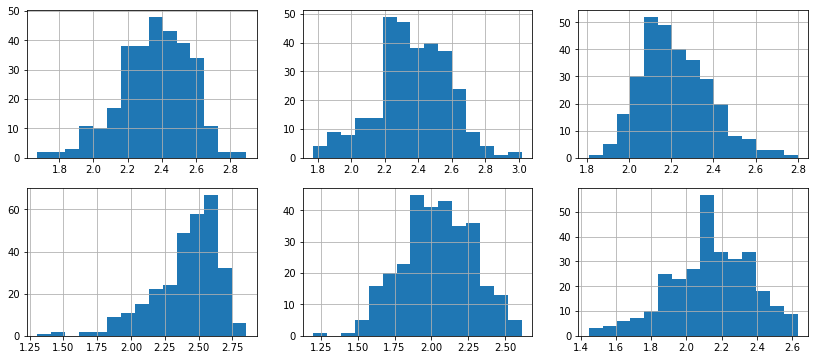

In [75]:
grid_x = scaler.fit_transform(dataframe_3.drop('well', axis = 1))
generate_fig('qoil_3', parameters_df, dataframe_3, random_count = 300)

Замечательно, теперь у нас есть необходимые графики, создадим функцию, которая будет создавать `gif`

In [76]:
def generate_fig(path, fig_format = '.jpeg', duration = 0.2, movie_name = 'movie.gif'):

    image_folder = os.fsencode(path)
    filenames = [os.fsdecode(file) for file in os.listdir(image_folder) if os.fsdecode(file).endswith(fig_format)]
    fl = list(int(x.split('.')[0]) for x in filenames)
    fl.sort()
    filenames2 = list(f'{x}{fig_format}' for x in fl)
    images = list(map(lambda filename: imageio.imread(os.path.join(path, filename)), filenames2))
    imageio.mimsave(os.path.join(path, movie_name), images, duration = duration) 

In [77]:
generate_fig('fig/qoil_3')

#### [В начало](#content) 

### 6. Общий вывод <a name="step_6"></a>

Атрибуты были переданы в формате zmap grid. На первоначальном этапе мы их прочли и объединили в один датафрейм. Пропуски удалили.

По каждому из атрибутов были построены гистограммы распределения и графики `boxplot`. Почти все они имеют нормальное распределение с небольшой правосторонней скошенностью. Длинные хвосты были отфильрованы. По некоторым из атрибутов можно наблюдать отрицательные значения и скачки в районе нуля, бимодальность. Эти особенности на данном этапе никак не обрабатывались

По генерации фичей работа проводилась в несколько этапов:

1. для каждой скважины из всейкарты искались ближайшие три точки. Брались средние значения по этим 3 точкам
2. для каждой скважины вычислялся/фильтровался район дренирования (с радиусом 150 м). Из данного района брались статистические значения атрибутов: среднее значение, медиана, min, max и т.д
3. над 24 основными фичами (12 фичей найденных на первом этапе и медианы со второго этапа) проводились математические вычисления: возводили в квадрат, искали логарифм и т.д
4. 24 основные фичи переумножались между собой по всем уникальным комбинациям


Таргеты расчитывались из двух источников: МЭР и тех. режим. Из первого расчитались:

- `qoil_3 _6 _12` - средний дебит нефти скважины за первые 3, 6 и 12 месяцев
- `qliq_3 _6 _12` - средний дебит жидкости скважины за первые 3, 6 и 12 месяцев
- `Qoil_3 _6 _12` - накопленная добыча нефти за первые 3, 6 и 12 месяцев
- `Qliq_3 _6 _12` - накопленная добыча жидкости за первые 3, 6 и 12 месяцев

Из тех. режима:

- средний `Kh` за 3, 6, 12 месяцев
- средний `Kh` за все время и медиану за все время
- средний `коэф-т продуктивности` за 3, 6, 12 месяцев

В работе используются три модели градиентного бустинга:

- `XGBoost`
- `CatBoost`
- `LightGBM`

Для подбора гиперпараметров использовалась библиотека `hyperopt`, а именно метод байесовской оптимизации TPE. Для реализации подбора необходимо задать диапазон изменений параметров и кол-во итераций оптимизации.

Для кроссвалидационного моделирования использовалась стандартная библиотека sklearn и `KFold`.

Также в рамках работы был реализован модуль с построением вероятностных карт. Для этого проводился многоитерационный расчет, для каждой итерации случайным образом обозначивались обучающая и тестововая выборки в процентном соотношении 70 к 30. Для выборок подбирались гиперпараметры, обучалась модель. Для данного модуля оставили только XGBRegressor. Для каждой точки находились процентили выборки от 1 до 99 и строились карты. Построенные карты объединялись в `gif-файл`

Результат работы:

1. Зная координаты скважины и имея в районе скважины значения атрибутов можно спрогнозировать выбранный таргет. Однако здесь стоит отметить, что выборка по скважинам в целом небольшая, порядка 100 значений и модели получаются переобученные. В случае кросс-валидации значения метрик желают лучшего

2. Построены вероятностные карты таргетов, по которым можно выделить перспективные районы для новых скважин

Также хочется отметить, что многое было не реализовано, в связи с ограниченным кол-ом времени. Ниже чек-лист по пунктам, куда можно развивать задачу.

<div style="border:solid purple 3px; padding: 20px"> <a name="step_chek"></a>
<h2> Чек-лист </h2>

- протестить на втором пуле атрибутов
- предобработка атрибутов. Посмотреть детальнее на выбросы, на характер распределения
- поработать с фичами, добавить/убрать генерацию новых фич
- посмотреть на результаты прогнозирования вообще без генерации новых фич, только на 12 исходных
- при определении таргетов пропали скважины, добавить их
- запустить реализацию с таргетами из РИГИС
- запустить расчет с подбором гиперпараметров с большим числом итераций
- протестить изменение диапазонов гиперпараметров
- возможно стоит добавить еще какие-то модели
- CatBoost долго подбирает гиперпараметры, разобраться почему
- возможно перед обучением/подбором гиперпараметров стоит добавить future selection
- протестить разные варианты нормализации данных
- возможно стоит поменять метрики
- можно протестить другую постановку задачи, например решать задачу классификации
- при построении вероятностных карт протестить другие модели
    
</div>

#### [В начало](#content) 